# import

In [53]:
import statistics
import numpy as np
import pandas as pd
from google.oauth2 import service_account #Control API Keys
from google.cloud import vision
import os, cv2
from collections import Counter
from IPython.display import Image
from shapely.geometry import Polygon
import io
from google.cloud.vision import types
from PIL import Image, ImageDraw, ImageFont
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import sys

In [2]:
#((a,b),(c,d),(e,f),(g,h))
# *************************
#  (a,b)           (c,d)
#   ----------------
#   \              |
#   \              |
#   \              |
#   -----------------
#  (g,h)          (e,f)

In [46]:
imagePath = "/Users/kunal/Documents/VdartResumeProject/VisionAPi/Document_1197_2.jpg"
fontPath = '/Users/kunal/Documents/VdartResumeProject/Font/FreeMonoBold.ttf'

# all the Variables

In [4]:
x = [[((543, 56), (718, 56), (718, 90), (543, 90)), 160.0, 'NISARGA', 'Word'], [((732, 56), (886, 56), (886, 90), (732, 90)), 160.0, 'HASSAN', 'Word'], [((899, 56), (1112, 56), (1112, 90), (899, 90)), 160.0, 'SREEDHAR', 'Word'], [((543, 56), (718, 56), (718, 90), (543, 90)), 113.64, 'NISARGA', 'Capital'], [((732, 56), (886, 56), (886, 90), (732, 90)), 100.0, 'HASSAN', 'Capital'], [((899, 56), (1112, 56), (1112, 90), (899, 90)), 138.31, 'SREEDHAR', 'Capital'], [((543, 56), (718, 56), (718, 90), (543, 90)), 97.02, 'NISARGA', 'SymbolAvg'], [((732, 56), (886, 56), (886, 90), (732, 90)), 105.56, 'HASSAN', 'SymbolAvg'], [((899, 56), (1112, 56), (1112, 90), (899, 90)), 106.25, 'SREEDHAR', 'SymbolAvg'], [((543, 56), (1112, 56), (1112, 90), (543, 90)), 118.9153, 'N/A', 'SymbolAvg'], [((144, 118), (1513, 118), (1513, 151), (144, 151)), 100.0, 'NISARGA HASSAN SREEDHAR ', 'Para'], [((192, 118), (238, 118), (238, 151), (192, 151)), 18.75, 'Jose', 'SymbolAvg'], [((82, 175), (283, 175), (283, 205), (82, 205)), 160.0, 'EDUCATION', 'Word'], [((82, 175), (283, 175), (283, 205), (82, 205)), 115.16, 'EDUCATION', 'Capital'], [((82, 175), (283, 175), (283, 205), (82, 205)), 101.39, 'EDUCATION', 'SymbolAvg'], [((82, 175), (293, 175), (293, 205), (82, 205)), 61.1111, 'N/A', 'SymbolAvg'], [((507, 232), (627, 232), (627, 264), (507, 264)), 45.0, 'Computer', 'Word'], [((1512, 232), (1566, 230), (1567, 258), (1513, 260)), 75.0, '2020', 'SymbolAvg'], [((507, 232), (627, 232), (627, 264), (507, 264)), 18.75, 'Computer', 'SymbolAvg'], [((848, 232), (893, 232), (893, 264), (848, 264)), 18.75, 'Jose', 'SymbolAvg'], [((1451, 234), (1504, 232), (1505, 260), (1452, 262)), 86.67, 'May', 'Word'], [((1451, 234), (1504, 232), (1505, 260), (1452, 262)), 45.83, 'May', 'SymbolAvg'], [((82, 296), (188, 296), (188, 330), (82, 330)), 18.75, 'Bachelor', 'SymbolAvg'], [((1514, 330), (1568, 329), (1568, 356), (1514, 357)), 18.75, '2017', 'SymbolAvg'], [((1450, 331), (1505, 330), (1505, 357), (1450, 358)), 18.75, 'June', 'SymbolAvg'], [((89, 390), (279, 390), (279, 419), (89, 419)), 160.0, 'TECHNICAL', 'Word'], [((292, 390), (410, 390), (410, 419), (292, 419)), 160.0, 'SKILLS', 'Word'], [((89, 390), (279, 390), (279, 419), (89, 419)), 105.23, 'TECHNICAL', 'Capital'], [((292, 390), (410, 390), (410, 419), (292, 419)), 65.36, 'SKILLS', 'Capital'], [((89, 390), (279, 390), (279, 419), (89, 419)), 66.67, 'TECHNICAL', 'SymbolAvg'], [((292, 390), (410, 390), (410, 419), (292, 419)), 72.92, 'SKILLS', 'SymbolAvg'], [((89, 390), (424, 390), (424, 419), (89, 419)), 44.4444, 'N/A', 'SymbolAvg'], [((83, 447), (185, 447), (185, 478), (83, 478)), 51.43, 'Network', 'Word'], [((437, 447), (489, 447), (489, 478), (437, 478)), 53.33, 'DNS', 'Word'], [((506, 447), (578, 447), (578, 478), (506, 478)), 84.0, 'DHCP', 'Word'], [((911, 447), (964, 447), (964, 478), (911, 478)), 74.67, 'UDP', 'Word'], [((1195, 447), (1259, 447), (1259, 478), (1195, 478)), 84.0, 'OSPF', 'Word'], [((1275, 447), (1327, 447), (1327, 478), (1275, 478)), 90.67, 'BGP', 'Word'], [((1343, 447), (1395, 447), (1395, 478), (1343, 478)), 53.33, 'ARP', 'Word'], [((83, 447), (1574, 447), (1574, 606), (83, 606)), 50.0, 'SKILLS : ', 'Para'], [((83, 447), (185, 447), (185, 478), (83, 478)), 16.07, 'Network', 'SymbolAvg'], [((354, 447), (416, 447), (416, 478), (354, 478)), 18.75, 'HTTP', 'SymbolAvg'], [((437, 447), (489, 447), (489, 478), (437, 478)), 12.5, 'DNS', 'SymbolAvg'], [((506, 447), (578, 447), (578, 478), (506, 478)), 32.29, 'DHCP', 'SymbolAvg'], [((594, 447), (677, 447), (677, 478), (594, 478)), 15.0, 'HTTPS', 'SymbolAvg'], [((911, 447), (964, 447), (964, 478), (911, 478)), 27.78, 'UDP', 'SymbolAvg'], [((1113, 447), (1178, 447), (1178, 478), (1113, 478)), 18.75, 'ICMP', 'SymbolAvg'], [((1195, 447), (1259, 447), (1259, 478), (1195, 478)), 20.83, 'OSPF', 'SymbolAvg'], [((1275, 447), (1327, 447), (1327, 478), (1275, 478)), 12.5, 'BGP', 'SymbolAvg'], [((1343, 447), (1395, 447), (1395, 478), (1343, 478)), 12.5, 'ARP', 'SymbolAvg'], [((191, 480), (233, 480), (233, 509), (191, 509)), 53.33, 'IDS', 'Word'], [((191, 480), (233, 480), (233, 509), (191, 509)), 12.5, 'IDS', 'SymbolAvg'], [((570, 480), (644, 480), (644, 509), (570, 509)), 18.75, 'WPA2', 'SymbolAvg'], [((83, 513), (248, 513), (248, 543), (83, 543)), 50.91, 'Programming', 'Word'], [((83, 513), (248, 513), (248, 543), (83, 543)), 26.14, 'Programming', 'SymbolAvg'], [((83, 543), (118, 543), (118, 573), (83, 573)), 160.0, 'OS', 'Word'], [((745, 543), (786, 543), (786, 573), (745, 573)), 53.33, 'IOS', 'Word'], [((83, 543), (118, 543), (118, 573), (83, 573)), 81.25, 'OS', 'SymbolAvg'], [((745, 543), (786, 543), (786, 573), (745, 573)), 12.5, 'IOS', 'SymbolAvg'], [((211, 575), (257, 575), (257, 606), (211, 606)), 106.67, 'IDE', 'Word'], [((575, 575), (627, 575), (627, 606), (575, 606)), 53.33, 'ADS', 'Word'], [((1493, 575), (1574, 575), (1574, 606), (1493, 606)), 44.8, 'PuTTY', 'Word'], [((159, 575), (202, 575), (202, 606), (159, 606)), 27.78, 'and', 'SymbolAvg'], [((211, 575), (257, 575), (257, 606), (211, 606)), 48.61, 'IDE', 'SymbolAvg'], [((575, 575), (627, 575), (627, 606), (575, 606)), 12.5, 'ADS', 'SymbolAvg'], [((1493, 575), (1574, 575), (1574, 606), (1493, 606)), 15.0, 'PuTTY', 'SymbolAvg'], [((87, 636), (353, 636), (353, 669), (87, 669)), 156.31, 'CERTIFICATION', 'Word'], [((87, 636), (353, 636), (353, 669), (87, 669)), 167.65, 'CERTIFICATION', 'Capital'], [((87, 636), (353, 636), (353, 669), (87, 669)), 87.18, 'CERTIFICATION', 'SymbolAvg'], [((87, 636), (369, 636), (369, 669), (87, 669)), 47.4359, 'N/A', 'SymbolAvg'], [((125, 728), (184, 728), (184, 756), (125, 756)), 53.33, 'AWS', 'Word'], [((125, 728), (184, 728), (184, 756), (125, 756)), 27.78, 'AWS', 'SymbolAvg'], [((520, 730), (570, 730), (570, 759), (520, 759)), 53.33, 'CLF', 'Word'], [((520, 730), (570, 730), (570, 759), (520, 759)), 12.5, 'CLF', 'SymbolAvg'], [((82, 785), (298, 785), (298, 814), (82, 814)), 160.0, 'EXPERIENCE', 'Word'], [((82, 785), (298, 785), (298, 814), (82, 814)), 119.63, 'EXPERIENCE', 'Capital'], [((82, 785), (298, 785), (298, 814), (82, 814)), 101.25, 'EXPERIENCE', 'SymbolAvg'], [((82, 785), (307, 785), (307, 814), (82, 814)), 60.0, 'N/A', 'SymbolAvg'], [((194, 845), (253, 845), (253, 877), (194, 877)), 65.0, 'Food', 'Word'], [((194, 845), (253, 845), (253, 877), (194, 877)), 32.29, 'Food', 'SymbolAvg'], [((263, 845), (282, 845), (282, 877), (263, 877)), 75.0, '&', 'SymbolAvg'], [((1321, 845), (1375, 845), (1375, 874), (1321, 874)), 18.75, 'June', 'SymbolAvg'], [((1385, 845), (1438, 845), (1438, 874), (1385, 874)), 56.25, '2019', 'SymbolAvg'], [((1463, 846), (1512, 846), (1512, 875), (1463, 875)), 32.29, 'July', 'SymbolAvg'], [((1521, 846), (1574, 846), (1574, 875), (1521, 875)), 18.75, '2019', 'SymbolAvg'], [((911, 979), (950, 979), (950, 1009), (911, 1009)), 53.33, 'Bin', 'Word'], [((911, 979), (950, 979), (950, 1009), (911, 1009)), 12.5, 'Bin', 'SymbolAvg'], [((81, 1042), (262, 1043), (262, 1074), (81, 1073)), 140.0, 'ACADEMIC', 'Word'], [((81, 1042), (262, 1043), (262, 1074), (81, 1073)), 107.16, 'ACADEMIC', 'Capital'], [((81, 1042), (262, 1043), (262, 1074), (81, 1073)), 79.17, 'ACADEMIC', 'SymbolAvg'], [((81, 1042), (461, 1044), (461, 1075), (81, 1073)), 66.6667, 'N/A', 'SymbolAvg'], [((278, 1043), (450, 1044), (450, 1075), (278, 1074)), 160.0, 'PROJECTS', 'Word'], [((278, 1043), (450, 1044), (450, 1075), (278, 1074)), 101.83, 'PROJECTS', 'Capital'], [((278, 1043), (450, 1044), (450, 1075), (278, 1074)), 97.4, 'PROJECTS', 'SymbolAvg'], [((1391, 1119), (1444, 1119), (1444, 1147), (1391, 1147)), 18.75, '2019', 'SymbolAvg'], [((88, 1120), (457, 1120), (457, 1148), (88, 1148)), 50.0, 'PROJECTS : ', 'Para'], [((300, 1120), (341, 1120), (341, 1148), (300, 1148)), 12.5, 'IoT', 'SymbolAvg'], [((125, 1179), (202, 1179), (202, 1211), (125, 1211)), 12.5, 'Design', 'SymbolAvg'], [((243, 1212), (291, 1212), (291, 1243), (243, 1243)), 53.33, 'Man', 'Word'], [((243, 1212), (291, 1212), (291, 1243), (243, 1243)), 27.78, 'Man', 'SymbolAvg'], [((370, 1212), (448, 1212), (448, 1243), (370, 1243)), 12.5, 'Middle', 'SymbolAvg'], [((201, 1310), (242, 1310), (242, 1337), (201, 1337)), 53.33, 'IoT', 'Word'], [((251, 1310), (323, 1311), (323, 1339), (251, 1338)), 46.0, 'Smart', 'Word'], [((1469, 1310), (1511, 1310), (1511, 1338), (1469, 1338)), 53.33, 'Dec', 'Word'], [((201, 1310), (242, 1310), (242, 1337), (201, 1337)), 12.5, 'IoT', 'SymbolAvg'], [((1469, 1310), (1511, 1310), (1511, 1338), (1469, 1338)), 27.78, 'Dec', 'SymbolAvg'], [((1520, 1310), (1574, 1309), (1574, 1336), (1520, 1337)), 37.5, '2019', 'SymbolAvg'], [((332, 1311), (395, 1312), (395, 1339), (332, 1338)), 62.4, 'Light', 'Word'], [((332, 1311), (395, 1312), (395, 1339), (332, 1338)), 24.17, 'Light', 'SymbolAvg'], [((1390, 1311), (1443, 1310), (1443, 1338), (1390, 1339)), 37.5, '2019', 'SymbolAvg'], [((1334, 1312), (1574, 1309), (1574, 1337), (1334, 1340)), 75.0, ': IoT Smart Light ', 'Para'], [((1520, 1491), (1574, 1490), (1574, 1518), (1520, 1519)), 37.5, '2019', 'SymbolAvg'], [((401, 1492), (435, 1492), (435, 1519), (401, 1519)), 106.0, 'Ad', 'Word'], [((444, 1492), (489, 1492), (489, 1519), (444, 1519)), 53.33, 'Hoc', 'Word'], [((629, 1492), (731, 1492), (731, 1519), (629, 1519)), 150.4, 'WANET', 'Word'], [((1468, 1492), (1511, 1491), (1511, 1519), (1468, 1520)), 53.33, 'Dec', 'Word'], [((629, 1492), (731, 1492), (731, 1519), (629, 1519)), 52.6, 'WANET', 'Capital'], [((82, 1492), (147, 1492), (147, 1519), (82, 1519)), 15.0, 'Voice', 'SymbolAvg'], [((401, 1492), (435, 1492), (435, 1519), (401, 1519)), 45.83, 'Ad', 'SymbolAvg'], [((444, 1492), (489, 1492), (489, 1519), (444, 1519)), 27.78, 'Hoc', 'SymbolAvg'], [((629, 1492), (731, 1492), (731, 1519), (629, 1519)), 47.5, 'WANET', 'SymbolAvg'], [((1468, 1492), (1511, 1491), (1511, 1519), (1468, 1520)), 27.78, 'Dec', 'SymbolAvg'], [((1389, 1493), (1443, 1492), (1443, 1520), (1389, 1521)), 37.5, '2019', 'SymbolAvg'], [((720, 1549), (818, 1549), (818, 1580), (720, 1580)), 58.02, 'WANET', 'Capital'], [((860, 1616), (878, 1616), (878, 1647), (860, 1647)), 112.0, 'X', 'Word'], [((583, 1669), (627, 1669), (627, 1699), (583, 1699)), 53.33, 'Box', 'Word'], [((583, 1669), (627, 1669), (627, 1699), (583, 1699)), 27.78, 'Box', 'SymbolAvg'], [((1321, 1671), (1363, 1671), (1363, 1701), (1321, 1701)), 53.33, 'Jan', 'Word'], [((1321, 1671), (1363, 1671), (1363, 1701), (1321, 1701)), 27.78, 'Jan', 'SymbolAvg'], [((1371, 1671), (1425, 1671), (1425, 1701), (1371, 1701)), 56.25, '2019', 'SymbolAvg'], [((1521, 1671), (1574, 1671), (1574, 1701), (1521, 1701)), 56.25, '2019', 'SymbolAvg'], [((548, 1737), (592, 1737), (592, 1769), (548, 1769)), 53.33, 'Box', 'Word'], [((548, 1737), (592, 1737), (592, 1769), (548, 1769)), 12.5, 'Box', 'SymbolAvg'], [((754, 1772), (806, 1772), (806, 1802), (754, 1802)), 106.67, 'VMs', 'Word'], [((754, 1772), (806, 1772), (806, 1802), (754, 1802)), 45.83, 'VMs', 'SymbolAvg'], [((588, 1805), (640, 1805), (640, 1836), (588, 1836)), 106.67, 'VMs', 'Word'], [((845, 1805), (908, 1805), (908, 1836), (845, 1836)), 44.0, 'PING', 'Word'], [((588, 1805), (640, 1805), (640, 1836), (588, 1836)), 45.83, 'VMs', 'SymbolAvg'], [((336, 1869), (436, 1868), (436, 1898), (336, 1899)), 51.43, 'Network', 'Word'], [((336, 1869), (436, 1868), (436, 1898), (336, 1899)), 16.07, 'Network', 'SymbolAvg'], [((445, 1869), (523, 1869), (523, 1898), (445, 1898)), 12.5, 'Design', 'SymbolAvg'], [((214, 1870), (325, 1869), (325, 1899), (214, 1900)), 65.71, 'Company', 'Word'], [((1470, 1870), (1512, 1869), (1512, 1896), (1470, 1897)), 53.33, 'Dec', 'Word'], [((214, 1870), (325, 1869), (325, 1899), (214, 1900)), 30.36, 'Company', 'SymbolAvg'], [((1470, 1870), (1512, 1869), (1512, 1896), (1470, 1897)), 27.78, 'Dec', 'SymbolAvg'], [((1520, 1870), (1573, 1869), (1573, 1896), (1520, 1897)), 37.5, '2018', 'SymbolAvg'], [((1394, 1871), (1448, 1870), (1448, 1897), (1394, 1898)), 37.5, '2018', 'SymbolAvg'], [((1339, 1872), (1387, 1871), (1387, 1897), (1339, 1898)), 60.67, 'Aug', 'Word'], [((1339, 1872), (1573, 1869), (1573, 1896), (1339, 1899)), 66.667, 'Company Network Design ', 'Para'], [((749, 2003), (812, 2003), (812, 2036), (749, 2036)), 80.0, 'OSPF', 'Word'], [((829, 2003), (881, 2003), (881, 2036), (829, 2036)), 90.67, 'BGP', 'Word'], [((897, 2003), (949, 2003), (949, 2036), (897, 2036)), 53.33, 'DNS', 'Word'], [((967, 2003), (1042, 2003), (1042, 2036), (967, 2036)), 48.0, 'VLAN', 'Word'], [((1158, 2003), (1230, 2003), (1230, 2036), (1158, 2036)), 80.0, 'DHCP', 'Word'], [((1287, 2003), (1354, 2003), (1354, 2036), (1287, 2036)), 80.0, 'HSRP', 'Word'], [((749, 2003), (812, 2003), (812, 2036), (749, 2036)), 20.83, 'OSPF', 'SymbolAvg'], [((829, 2003), (881, 2003), (881, 2036), (829, 2036)), 27.78, 'BGP', 'SymbolAvg'], [((897, 2003), (949, 2003), (949, 2036), (897, 2036)), 12.5, 'DNS', 'SymbolAvg'], [((1158, 2003), (1230, 2003), (1230, 2036), (1158, 2036)), 45.83, 'DHCP', 'SymbolAvg'], [((1287, 2003), (1354, 2003), (1354, 2036), (1287, 2036)), 32.29, 'HSRP', 'SymbolAvg'], [((82, 2103), (161, 2103), (161, 2131), (82, 2131)), 43.33, 'Design', 'Word'], [((200, 2103), (218, 2103), (218, 2131), (200, 2131)), 160.0, 'X', 'Word'], [((229, 2103), (290, 2103), (290, 2131), (229, 2131)), 65.0, 'Band', 'Word'], [((299, 2103), (365, 2103), (365, 2131), (299, 2131)), 95.0, '8PSK', 'Word'], [((579, 2103), (632, 2103), (632, 2131), (579, 2131)), 144.0, 'ADS', 'Word'], [((82, 2103), (161, 2103), (161, 2131), (82, 2131)), 18.75, 'Design', 'SymbolAvg'], [((200, 2103), (218, 2103), (218, 2131), (200, 2131)), 100.0, 'X', 'SymbolAvg'], [((229, 2103), (290, 2103), (290, 2131), (229, 2131)), 45.83, 'Band', 'SymbolAvg'], [((299, 2103), (365, 2103), (365, 2131), (299, 2131)), 64.58, '8PSK', 'SymbolAvg'], [((579, 2103), (632, 2103), (632, 2131), (579, 2131)), 45.83, 'ADS', 'SymbolAvg'], [((82, 2103), (632, 2103), (632, 2131), (82, 2131)), 22.2222, 'N/A', 'SymbolAvg'], [((1322, 2104), (1364, 2104), (1364, 2133), (1322, 2133)), 53.33, 'Jan', 'Word'], [((1322, 2104), (1574, 2104), (1574, 2133), (1322, 2133)), 50.0, 'of X - Band 8PSK Modulator using ADS ', 'Para'], [((1322, 2104), (1364, 2104), (1364, 2133), (1322, 2133)), 27.78, 'Jan', 'SymbolAvg'], [((1372, 2104), (1425, 2104), (1425, 2133), (1372, 2133)), 37.5, '2017', 'SymbolAvg'], [((1520, 2104), (1574, 2104), (1574, 2133), (1520, 2133)), 37.5, '2017', 'SymbolAvg'], [((886, 2159), (951, 2159), (951, 2189), (886, 2189)), 120.0, 'ISRO', 'Word'], [((1056, 2159), (1122, 2159), (1122, 2189), (1056, 2189)), 52.0, 'Space', 'Word'], [((886, 2159), (951, 2159), (951, 2189), (886, 2189)), 63.54, 'ISRO', 'SymbolAvg'], [((970, 2159), (1046, 2159), (1046, 2189), (970, 2189)), 12.5, 'Indian', 'SymbolAvg'], [((1056, 2159), (1122, 2159), (1122, 2189), (1056, 2189)), 15.0, 'Space', 'SymbolAvg'], [((1132, 2159), (1239, 2159), (1239, 2189), (1132, 2189)), 18.75, 'Research', 'SymbolAvg'], [((1175, 2192), (1227, 2192), (1227, 2225), (1175, 2225)), 53.33, 'ADS', 'Word'], [((1175, 2192), (1227, 2192), (1227, 2225), (1175, 2225)), 12.5, 'ADS', 'SymbolAvg']]
ypoints = []
for i in x:
    ypoints.append(i[0][0][1])

In [5]:
test2Double = [[((543, 56), (718, 56), (718, 90), (543, 90)), 130.0, 'NISARGA', 'Word'], [((732, 56), (886, 56), (886, 90), (732, 90)), 130.0, 'HASSAN', 'Word'], [((899, 56), (1112, 56), (1112, 90), (899, 90)), 130.0, 'SREEDHAR', 'Word'], [((543, 56), (718, 56), (718, 90), (543, 90)), 113.64, 'NISARGA', 'Capital'], [((732, 56), (886, 56), (886, 90), (732, 90)), 100.0, 'HASSAN', 'Capital'], [((899, 56), (1112, 56), (1112, 90), (899, 90)), 138.31, 'SREEDHAR', 'Capital'], [((543, 56), (718, 56), (718, 90), (543, 90)), 97.02, 'NISARGA', 'SymbolAvg'], [((732, 56), (886, 56), (886, 90), (732, 90)), 105.56, 'HASSAN', 'SymbolAvg'], [((899, 56), (1112, 56), (1112, 90), (899, 90)), 106.25, 'SREEDHAR', 'SymbolAvg'], [((543, 56), (1112, 56), (1112, 90), (543, 90)), 118.9153, 'N/A', 'SymbolAvg'], [((144, 118), (1513, 118), (1513, 151), (144, 151)), 100.0, 'NISARGA HASSAN SREEDHAR ', 'Para'], [((386, 118), (411, 118), (411, 151), (386, 151)), 37.5, '+1', 'SymbolAvg'], [((432, 118), (470, 118), (470, 151), (432, 151)), 75.0, '925', 'SymbolAvg'], [((493, 118), (599, 118), (599, 151), (493, 151)), 46.88, '789-8911', 'SymbolAvg'], [((935, 118), (944, 118), (944, 151), (935, 151)), 75.0, '|', 'SymbolAvg'], [((82, 175), (283, 175), (283, 205), (82, 205)), 130.0, 'EDUCATION', 'Word'], [((82, 175), (283, 175), (283, 205), (82, 205)), 115.16, 'EDUCATION', 'Capital'], [((82, 175), (283, 175), (283, 205), (82, 205)), 101.39, 'EDUCATION', 'SymbolAvg'], [((82, 175), (293, 175), (293, 205), (82, 205)), 61.1111, 'N/A', 'SymbolAvg'], [((346, 232), (489, 232), (489, 264), (346, 264)), 30.0, 'Engineering', 'Word'], [((507, 232), (627, 232), (627, 264), (507, 264)), 41.25, 'Computer', 'Word'], [((1512, 232), (1566, 230), (1567, 258), (1513, 260)), 75.0, '2020', 'SymbolAvg'], [((498, 232), (505, 232), (505, 264), (498, 264)), 75.0, '(', 'SymbolAvg'], [((1451, 234), (1504, 232), (1505, 260), (1452, 262)), 76.67, 'May', 'Word'], [((1451, 234), (1504, 232), (1505, 260), (1452, 262)), 45.83, 'May', 'SymbolAvg'], [((1244, 265), (1307, 265), (1307, 296), (1244, 296)), 26.0, 'Voice', 'Word'], [((82, 296), (188, 296), (188, 330), (82, 330)), 28.75, 'Bachelor', 'Word'], [((1514, 330), (1568, 329), (1568, 356), (1514, 357)), 75.0, '2017', 'SymbolAvg'], [((1450, 331), (1505, 330), (1505, 357), (1450, 358)), 32.5, 'June', 'Word'], [((89, 390), (279, 390), (279, 419), (89, 419)), 130.0, 'TECHNICAL', 'Word'], [((292, 390), (410, 390), (410, 419), (292, 419)), 130.0, 'SKILLS', 'Word'], [((89, 390), (279, 390), (279, 419), (89, 419)), 105.23, 'TECHNICAL', 'Capital'], [((292, 390), (410, 390), (410, 419), (292, 419)), 65.36, 'SKILLS', 'Capital'], [((89, 390), (279, 390), (279, 419), (89, 419)), 66.67, 'TECHNICAL', 'SymbolAvg'], [((292, 390), (410, 390), (410, 419), (292, 419)), 72.92, 'SKILLS', 'SymbolAvg'], [((89, 390), (424, 390), (424, 419), (89, 419)), 44.4444, 'N/A', 'SymbolAvg'], [((83, 447), (185, 447), (185, 478), (83, 478)), 47.14, 'Network', 'Word'], [((354, 447), (416, 447), (416, 478), (354, 478)), 32.5, 'HTTP', 'Word'], [((437, 447), (489, 447), (489, 478), (437, 478)), 43.33, 'DNS', 'Word'], [((506, 447), (578, 447), (578, 478), (506, 478)), 68.25, 'DHCP', 'Word'], [((594, 447), (677, 447), (677, 478), (594, 478)), 26.0, 'HTTPS', 'Word'], [((911, 447), (964, 447), (964, 478), (911, 478)), 60.67, 'UDP', 'Word'], [((1113, 447), (1178, 447), (1178, 478), (1113, 478)), 32.5, 'ICMP', 'Word'], [((1195, 447), (1259, 447), (1259, 478), (1195, 478)), 68.25, 'OSPF', 'Word'], [((1275, 447), (1327, 447), (1327, 478), (1275, 478)), 73.67, 'BGP', 'Word'], [((1343, 447), (1395, 447), (1395, 478), (1343, 478)), 43.33, 'ARP', 'Word'], [((1411, 447), (1481, 447), (1481, 478), (1411, 478)), 32.5, 'VLAN', 'Word'], [((83, 447), (1574, 447), (1574, 606), (83, 606)), 50.0, 'SKILLS : ', 'Para'], [((506, 447), (578, 447), (578, 478), (506, 478)), 32.29, 'DHCP', 'SymbolAvg'], [((911, 447), (964, 447), (964, 478), (911, 478)), 27.78, 'UDP', 'SymbolAvg'], [((1195, 447), (1259, 447), (1259, 478), (1195, 478)), 20.83, 'OSPF', 'SymbolAvg'], [((191, 480), (233, 480), (233, 509), (191, 509)), 43.33, 'IDS', 'Word'], [((394, 480), (465, 480), (465, 509), (394, 509)), 62.5, '802.11', 'SymbolAvg'], [((570, 480), (644, 480), (644, 509), (570, 509)), 37.5, 'WPA2', 'SymbolAvg'], [((659, 480), (735, 480), (735, 509), (659, 509)), 28.12, 'WPA3', 'SymbolAvg'], [((83, 513), (248, 513), (248, 543), (83, 543)), 48.18, 'Programming', 'Word'], [((83, 513), (248, 513), (248, 543), (83, 543)), 26.14, 'Programming', 'SymbolAvg'], [((428, 543), (513, 543), (513, 573), (428, 573)), 21.67, 'CentOS', 'Word'], [((745, 543), (786, 543), (786, 573), (745, 573)), 43.33, 'IOS', 'Word'], [((83, 543), (118, 543), (118, 573), (83, 573)), 81.25, 'OS', 'SymbolAvg'], [((88, 575), (151, 575), (151, 606), (88, 606)), 26.0, 'Tools', 'Word'], [((211, 575), (257, 575), (257, 606), (211, 606)), 86.67, 'IDE', 'Word'], [((392, 575), (469, 575), (469, 606), (392, 606)), 21.67, 'Design', 'Word'], [((575, 575), (627, 575), (627, 606), (575, 606)), 43.33, 'ADS', 'Word'], [((781, 575), (877, 575), (877, 606), (781, 606)), 21.67, 'VMware', 'Word'], [((1493, 575), (1574, 575), (1574, 606), (1493, 606)), 36.4, 'PuTTY', 'Word'], [((159, 575), (202, 575), (202, 606), (159, 606)), 27.78, 'and', 'SymbolAvg'], [((211, 575), (257, 575), (257, 606), (211, 606)), 48.61, 'IDE', 'SymbolAvg'], [((87, 636), (353, 636), (353, 669), (87, 669)), 127.0, 'CERTIFICATION', 'Word'], [((87, 636), (353, 636), (353, 669), (87, 669)), 167.65, 'CERTIFICATION', 'Capital'], [((87, 636), (353, 636), (353, 669), (87, 669)), 87.18, 'CERTIFICATION', 'SymbolAvg'], [((361, 636), (369, 636), (369, 669), (361, 669)), 75.0, ':', 'SymbolAvg'], [((87, 636), (369, 636), (369, 669), (87, 669)), 47.4359, 'N/A', 'SymbolAvg'], [((624, 697), (711, 697), (711, 724), (624, 724)), 64.29, '200-301', 'SymbolAvg'], [((125, 728), (184, 728), (184, 756), (125, 756)), 43.33, 'AWS', 'Word'], [((125, 728), (184, 728), (184, 756), (125, 756)), 27.78, 'AWS', 'SymbolAvg'], [((520, 730), (570, 730), (570, 759), (520, 759)), 43.33, 'CLF', 'Word'], [((581, 731), (621, 731), (621, 759), (581, 759)), 25.0, 'C01', 'SymbolAvg'], [((75, 737), (84, 737), (84, 750), (75, 750)), 75.0, '.', 'SymbolAvg'], [((82, 785), (298, 785), (298, 814), (82, 814)), 130.0, 'EXPERIENCE', 'Word'], [((82, 785), (298, 785), (298, 814), (82, 814)), 119.63, 'EXPERIENCE', 'Capital'], [((82, 785), (298, 785), (298, 814), (82, 814)), 101.25, 'EXPERIENCE', 'SymbolAvg'], [((82, 785), (307, 785), (307, 814), (82, 814)), 60.0, 'N/A', 'SymbolAvg'], [((82, 845), (186, 845), (186, 877), (82, 877)), 25.0, 'Marmon', 'Word'], [((194, 845), (253, 845), (253, 877), (194, 877)), 57.5, 'Food', 'Word'], [((1321, 845), (1375, 845), (1375, 874), (1321, 874)), 32.5, 'June', 'Word'], [((194, 845), (253, 845), (253, 877), (194, 877)), 32.29, 'Food', 'SymbolAvg'], [((263, 845), (282, 845), (282, 877), (263, 877)), 75.0, '&', 'SymbolAvg'], [((1385, 845), (1438, 845), (1438, 874), (1385, 874)), 75.0, '2019', 'SymbolAvg'], [((1463, 846), (1512, 846), (1512, 875), (1463, 875)), 32.29, 'July', 'SymbolAvg'], [((1521, 846), (1574, 846), (1574, 875), (1521, 875)), 75.0, '2019', 'SymbolAvg'], [((260, 944), (340, 944), (340, 977), (260, 977)), 21.67, 'Dongle', 'Word'], [((749, 979), (805, 979), (805, 1009), (749, 1009)), 22.75, 'Food', 'Word'], [((911, 979), (950, 979), (950, 1009), (911, 1009)), 43.33, 'Bin', 'Word'], [((82, 984), (92, 984), (92, 997), (82, 997)), 75.0, '.', 'SymbolAvg'], [((81, 1042), (262, 1043), (262, 1074), (81, 1073)), 113.75, 'ACADEMIC', 'Word'], [((81, 1042), (262, 1043), (262, 1074), (81, 1073)), 107.16, 'ACADEMIC', 'Capital'], [((81, 1042), (262, 1043), (262, 1074), (81, 1073)), 79.17, 'ACADEMIC', 'SymbolAvg'], [((81, 1042), (461, 1044), (461, 1075), (81, 1073)), 66.6667, 'N/A', 'SymbolAvg'], [((278, 1043), (450, 1044), (450, 1075), (278, 1074)), 130.0, 'PROJECTS', 'Word'], [((278, 1043), (450, 1044), (450, 1075), (278, 1074)), 101.83, 'PROJECTS', 'Capital'], [((278, 1043), (450, 1044), (450, 1075), (278, 1074)), 97.4, 'PROJECTS', 'SymbolAvg'], [((1334, 1119), (1382, 1119), (1382, 1147), (1334, 1147)), 23.33, 'Aug', 'Word'], [((1334, 1119), (1557, 1118), (1557, 1147), (1334, 1148)), 25.0, 'routing in IoT networks ', 'Para'], [((1391, 1119), (1444, 1119), (1444, 1147), (1391, 1147)), 75.0, '2019', 'SymbolAvg'], [((88, 1120), (166, 1120), (166, 1148), (88, 1148)), 21.67, 'Secure', 'Word'], [((351, 1120), (457, 1120), (457, 1148), (351, 1148)), 25.0, 'networks', 'Word'], [((88, 1120), (457, 1120), (457, 1148), (88, 1148)), 50.0, 'PROJECTS : ', 'Para'], [((125, 1179), (202, 1179), (202, 1211), (125, 1211)), 21.67, 'Design', 'Word'], [((243, 1212), (291, 1212), (291, 1243), (243, 1243)), 43.33, 'Man', 'Word'], [((370, 1212), (448, 1212), (448, 1243), (370, 1243)), 21.67, 'Middle', 'Word'], [((243, 1212), (291, 1212), (291, 1243), (243, 1243)), 27.78, 'Man', 'SymbolAvg'], [((201, 1310), (242, 1310), (242, 1337), (201, 1337)), 43.33, 'IoT', 'Word'], [((251, 1310), (323, 1311), (323, 1339), (251, 1338)), 40.0, 'Smart', 'Word'], [((1469, 1310), (1511, 1310), (1511, 1338), (1469, 1338)), 43.33, 'Dec', 'Word'], [((1469, 1310), (1511, 1310), (1511, 1338), (1469, 1338)), 27.78, 'Dec', 'SymbolAvg'], [((1520, 1310), (1574, 1309), (1574, 1336), (1520, 1337)), 75.0, '2019', 'SymbolAvg'], [((332, 1311), (395, 1312), (395, 1339), (332, 1338)), 58.2, 'Light', 'Word'], [((332, 1311), (395, 1312), (395, 1339), (332, 1338)), 24.17, 'Light', 'SymbolAvg'], [((1390, 1311), (1443, 1310), (1443, 1338), (1390, 1339)), 75.0, '2019', 'SymbolAvg'], [((1334, 1312), (1381, 1311), (1381, 1338), (1334, 1339)), 23.33, 'Aug', 'Word'], [((1334, 1312), (1574, 1309), (1574, 1337), (1334, 1340)), 75.0, ': IoT Smart Light ', 'Para'], [((753, 1371), (854, 1371), (854, 1401), (753, 1401)), 42.86, 'ESP8266', 'SymbolAvg'], [((933, 1403), (993, 1403), (993, 1436), (933, 1436)), 25.0, 'mode', 'Word'], [((91, 1410), (100, 1410), (100, 1423), (91, 1423)), 25.0, '2019 - Dec 2019 ', 'Para'], [((91, 1410), (100, 1410), (100, 1423), (91, 1423)), 75.0, '.', 'SymbolAvg'], [((1520, 1491), (1574, 1490), (1574, 1518), (1520, 1519)), 75.0, '2019', 'SymbolAvg'], [((82, 1492), (147, 1492), (147, 1519), (82, 1519)), 26.0, 'Voice', 'Word'], [((444, 1492), (489, 1492), (489, 1519), (444, 1519)), 43.33, 'Hoc', 'Word'], [((629, 1492), (731, 1492), (731, 1519), (629, 1519)), 122.2, 'WANET', 'Word'], [((1468, 1492), (1511, 1491), (1511, 1519), (1468, 1520)), 43.33, 'Dec', 'Word'], [((629, 1492), (731, 1492), (731, 1519), (629, 1519)), 52.6, 'WANET', 'Capital'], [((401, 1492), (435, 1492), (435, 1519), (401, 1519)), 45.83, 'Ad', 'SymbolAvg'], [((444, 1492), (489, 1492), (489, 1519), (444, 1519)), 27.78, 'Hoc', 'SymbolAvg'], [((620, 1492), (626, 1492), (626, 1519), (620, 1519)), 75.0, '(', 'SymbolAvg'], [((629, 1492), (731, 1492), (731, 1519), (629, 1519)), 47.5, 'WANET', 'SymbolAvg'], [((1468, 1492), (1511, 1491), (1511, 1519), (1468, 1520)), 27.78, 'Dec', 'SymbolAvg'], [((1389, 1493), (1443, 1492), (1443, 1520), (1389, 1521)), 75.0, '2019', 'SymbolAvg'], [((1333, 1494), (1380, 1493), (1380, 1521), (1333, 1522)), 23.33, 'Aug', 'Word'], [((1333, 1494), (1574, 1490), (1574, 1518), (1333, 1522)), 30.0, 'over IP for Wireless Ad Hoc Networks ( WANET ) ', 'Para'], [((720, 1549), (818, 1549), (818, 1580), (720, 1580)), 26.0, 'WANET', 'Word'], [((141, 1549), (1320, 1549), (1320, 1647), (141, 1647)), 25.0, '2019 - Dec 2019 ', 'Para'], [((720, 1549), (818, 1549), (818, 1580), (720, 1580)), 58.02, 'WANET', 'Capital'], [((583, 1669), (627, 1669), (627, 1699), (583, 1699)), 43.33, 'Box', 'Word'], [((583, 1669), (627, 1669), (627, 1699), (583, 1699)), 27.78, 'Box', 'SymbolAvg'], [((1321, 1671), (1363, 1671), (1363, 1701), (1321, 1701)), 43.33, 'Jan', 'Word'], [((1321, 1671), (1574, 1671), (1574, 1701), (1321, 1701)), 25.0, 'Virtualization using Virtual Box ', 'Para'], [((1321, 1671), (1363, 1671), (1363, 1701), (1321, 1701)), 27.78, 'Jan', 'SymbolAvg'], [((1371, 1671), (1425, 1671), (1425, 1701), (1371, 1701)), 75.0, '2019', 'SymbolAvg'], [((1521, 1671), (1574, 1671), (1574, 1701), (1521, 1701)), 75.0, '2019', 'SymbolAvg'], [((139, 1737), (226, 1737), (226, 1769), (139, 1769)), 21.67, 'Worked', 'Word'], [((270, 1737), (327, 1737), (327, 1769), (270, 1769)), 32.5, 'Open', 'Word'], [((548, 1737), (592, 1737), (592, 1769), (548, 1769)), 43.33, 'Box', 'Word'], [((138, 1737), (1301, 1737), (1301, 1836), (138, 1836)), 25.0, '2019 - April 2019 ', 'Para'], [((397, 1772), (482, 1772), (482, 1802), (397, 1802)), 26.0, 'VLANs', 'Word'], [((754, 1772), (806, 1772), (806, 1802), (754, 1802)), 86.67, 'VMs', 'Word'], [((754, 1772), (806, 1772), (806, 1802), (754, 1802)), 45.83, 'VMs', 'SymbolAvg'], [((588, 1805), (640, 1805), (640, 1836), (588, 1836)), 86.67, 'VMs', 'Word'], [((845, 1805), (908, 1805), (908, 1836), (845, 1836)), 35.75, 'PING', 'Word'], [((588, 1805), (640, 1805), (640, 1836), (588, 1836)), 45.83, 'VMs', 'SymbolAvg'], [((336, 1869), (436, 1868), (436, 1898), (336, 1899)), 47.14, 'Network', 'Word'], [((445, 1869), (523, 1869), (523, 1898), (445, 1898)), 33.33, 'Design', 'Word'], [((214, 1870), (325, 1869), (325, 1899), (214, 1900)), 61.43, 'Company', 'Word'], [((1470, 1870), (1512, 1869), (1512, 1896), (1470, 1897)), 43.33, 'Dec', 'Word'], [((214, 1870), (325, 1869), (325, 1899), (214, 1900)), 30.36, 'Company', 'SymbolAvg'], [((1470, 1870), (1512, 1869), (1512, 1896), (1470, 1897)), 27.78, 'Dec', 'SymbolAvg'], [((1520, 1870), (1573, 1869), (1573, 1896), (1520, 1897)), 75.0, '2018', 'SymbolAvg'], [((82, 1871), (203, 1870), (203, 1900), (82, 1901)), 25.56, 'Corporate', 'Word'], [((1394, 1871), (1448, 1870), (1448, 1897), (1394, 1898)), 75.0, '2018', 'SymbolAvg'], [((1339, 1872), (1387, 1871), (1387, 1897), (1339, 1898)), 53.67, 'Aug', 'Word'], [((1339, 1872), (1573, 1869), (1573, 1896), (1339, 1899)), 100.0, 'Company Network Design ', 'Para'], [((83, 1935), (1320, 1935), (1320, 1970), (83, 1970)), 25.0, '2018 - Dec 2018 ', 'Para'], [((83, 1935), (93, 1935), (93, 1970), (83, 1970)), 75.0, '•', 'SymbolAvg'], [((749, 2003), (812, 2003), (812, 2036), (749, 2036)), 65.0, 'OSPF', 'Word'], [((829, 2003), (881, 2003), (881, 2036), (829, 2036)), 73.67, 'BGP', 'Word'], [((897, 2003), (949, 2003), (949, 2036), (897, 2036)), 43.33, 'DNS', 'Word'], [((967, 2003), (1042, 2003), (1042, 2036), (967, 2036)), 39.0, 'VLAN', 'Word'], [((1158, 2003), (1230, 2003), (1230, 2036), (1158, 2036)), 65.0, 'DHCP', 'Word'], [((1287, 2003), (1354, 2003), (1354, 2036), (1287, 2036)), 65.0, 'HSRP', 'Word'], [((83, 2003), (92, 2003), (92, 2036), (83, 2036)), 75.0, '•', 'SymbolAvg'], [((749, 2003), (812, 2003), (812, 2036), (749, 2036)), 20.83, 'OSPF', 'SymbolAvg'], [((829, 2003), (881, 2003), (881, 2036), (829, 2036)), 27.78, 'BGP', 'SymbolAvg'], [((1158, 2003), (1230, 2003), (1230, 2036), (1158, 2036)), 45.83, 'DHCP', 'SymbolAvg'], [((1287, 2003), (1354, 2003), (1354, 2036), (1287, 2036)), 32.29, 'HSRP', 'SymbolAvg'], [((82, 2046), (92, 2046), (92, 2057), (82, 2057)), 75.0, '.', 'SymbolAvg'], [((82, 2103), (161, 2103), (161, 2131), (82, 2131)), 38.33, 'Design', 'Word'], [((229, 2103), (290, 2103), (290, 2131), (229, 2131)), 57.5, 'Band', 'Word'], [((299, 2103), (365, 2103), (365, 2131), (299, 2131)), 72.5, '8PSK', 'Word'], [((579, 2103), (632, 2103), (632, 2131), (579, 2131)), 117.0, 'ADS', 'Word'], [((200, 2103), (218, 2103), (218, 2131), (200, 2131)), 100.0, 'X', 'SymbolAvg'], [((229, 2103), (290, 2103), (290, 2131), (229, 2131)), 45.83, 'Band', 'SymbolAvg'], [((299, 2103), (365, 2103), (365, 2131), (299, 2131)), 64.58, '8PSK', 'SymbolAvg'], [((579, 2103), (632, 2103), (632, 2131), (579, 2131)), 45.83, 'ADS', 'SymbolAvg'], [((82, 2103), (632, 2103), (632, 2131), (82, 2131)), 22.2222, 'N/A', 'SymbolAvg'], [((1322, 2104), (1364, 2104), (1364, 2133), (1322, 2133)), 43.33, 'Jan', 'Word'], [((1322, 2104), (1574, 2104), (1574, 2133), (1322, 2133)), 50.0, 'of X - Band 8PSK Modulator using ADS ', 'Para'], [((1322, 2104), (1364, 2104), (1364, 2133), (1322, 2133)), 27.78, 'Jan', 'SymbolAvg'], [((1372, 2104), (1425, 2104), (1425, 2133), (1372, 2133)), 75.0, '2017', 'SymbolAvg'], [((1520, 2104), (1574, 2104), (1574, 2133), (1520, 2133)), 75.0, '2017', 'SymbolAvg'], [((886, 2159), (951, 2159), (951, 2189), (886, 2189)), 97.5, 'ISRO', 'Word'], [((1056, 2159), (1122, 2159), (1122, 2189), (1056, 2189)), 46.0, 'Space', 'Word'], [((1132, 2159), (1239, 2159), (1239, 2189), (1132, 2189)), 28.75, 'Research', 'Word'], [((886, 2159), (951, 2159), (951, 2189), (886, 2189)), 63.54, 'ISRO', 'SymbolAvg'], [((961, 2159), (967, 2159), (967, 2189), (961, 2189)), 75.0, '(', 'SymbolAvg'], [((75, 2166), (84, 2166), (84, 2179), (75, 2179)), 25.0, '2017 - April 2017 ', 'Para'], [((75, 2166), (84, 2166), (84, 2179), (75, 2179)), 75.0, '.', 'SymbolAvg'], [((1175, 2192), (1227, 2192), (1227, 2225), (1175, 2225)), 43.33, 'ADS', 'Word'], [((641, 2192), (738, 2192), (738, 2225), (641, 2225)), 37.5, '8.75GHz', 'SymbolAvg'], [((76, 2200), (85, 2200), (85, 2213), (76, 2213)), 75.0, '.', 'SymbolAvg']]

In [6]:
test3 = [[((543, 56), (718, 56), (718, 90), (543, 90)), 160.0, 'NISARGA', 'Word'], [((732, 56), (886, 56), (886, 90), (732, 90)), 160.0, 'HASSAN', 'Word'], [((899, 56), (1112, 56), (1112, 90), (899, 90)), 160.0, 'SREEDHAR', 'Word'], [((543, 56), (718, 56), (718, 90), (543, 90)), 113.64, 'NISARGA', 'Capital'], [((732, 56), (886, 56), (886, 90), (732, 90)), 100.0, 'HASSAN', 'Capital'], [((899, 56), (1112, 56), (1112, 90), (899, 90)), 138.31, 'SREEDHAR', 'Capital'], [((543, 56), (718, 56), (718, 90), (543, 90)), 97.02, 'NISARGA', 'SymbolAvg'], [((732, 56), (886, 56), (886, 90), (732, 90)), 105.56, 'HASSAN', 'SymbolAvg'], [((899, 56), (1112, 56), (1112, 90), (899, 90)), 106.25, 'SREEDHAR', 'SymbolAvg'], [((543, 56), (1112, 56), (1112, 90), (543, 90)), 118.9153, 'N/A', 'SymbolAvg'], [((144, 118), (1513, 118), (1513, 151), (144, 151)), 100.0, 'HASSAN SREEDHAR ', 'Para'], [((192, 118), (238, 118), (238, 151), (192, 151)), 18.75, 'Jose', 'SymbolAvg'], [((82, 175), (283, 175), (283, 205), (82, 205)), 160.0, 'EDUCATION', 'Word'], [((82, 175), (283, 175), (283, 205), (82, 205)), 115.16, 'EDUCATION', 'Capital'], [((82, 175), (283, 175), (283, 205), (82, 205)), 101.39, 'EDUCATION', 'SymbolAvg'], [((82, 175), (293, 175), (293, 205), (82, 205)), 61.1111, 'N/A', 'SymbolAvg'], [((507, 232), (627, 232), (627, 264), (507, 264)), 45.0, 'Computer', 'Word'], [((1512, 232), (1566, 230), (1567, 258), (1513, 260)), 75.0, '2020', 'SymbolAvg'], [((507, 232), (627, 232), (627, 264), (507, 264)), 18.75, 'Computer', 'SymbolAvg'], [((848, 232), (893, 232), (893, 264), (848, 264)), 18.75, 'Jose', 'SymbolAvg'], [((1451, 234), (1504, 232), (1505, 260), (1452, 262)), 86.67, 'May', 'Word'], [((1451, 234), (1504, 232), (1505, 260), (1452, 262)), 45.83, 'May', 'SymbolAvg'], [((82, 296), (188, 296), (188, 330), (82, 330)), 18.75, 'Bachelor', 'SymbolAvg'], [((1514, 330), (1568, 329), (1568, 356), (1514, 357)), 18.75, '2017', 'SymbolAvg'], [((1450, 331), (1505, 330), (1505, 357), (1450, 358)), 18.75, 'June', 'SymbolAvg'], [((89, 390), (279, 390), (279, 419), (89, 419)), 160.0, 'TECHNICAL', 'Word'], [((292, 390), (410, 390), (410, 419), (292, 419)), 160.0, 'SKILLS', 'Word'], [((89, 390), (279, 390), (279, 419), (89, 419)), 105.23, 'TECHNICAL', 'Capital'], [((292, 390), (410, 390), (410, 419), (292, 419)), 65.36, 'SKILLS', 'Capital'], [((89, 390), (279, 390), (279, 419), (89, 419)), 66.67, 'TECHNICAL', 'SymbolAvg'], [((292, 390), (410, 390), (410, 419), (292, 419)), 72.92, 'SKILLS', 'SymbolAvg'], [((89, 390), (424, 390), (424, 419), (89, 419)), 44.4444, 'N/A', 'SymbolAvg'], [((83, 447), (185, 447), (185, 478), (83, 478)), 51.43, 'Network', 'Word'], [((437, 447), (489, 447), (489, 478), (437, 478)), 53.33, 'DNS', 'Word'], [((506, 447), (578, 447), (578, 478), (506, 478)), 84.0, 'DHCP', 'Word'], [((911, 447), (964, 447), (964, 478), (911, 478)), 74.67, 'UDP', 'Word'], [((1195, 447), (1259, 447), (1259, 478), (1195, 478)), 84.0, 'OSPF', 'Word'], [((1275, 447), (1327, 447), (1327, 478), (1275, 478)), 90.67, 'BGP', 'Word'], [((1343, 447), (1395, 447), (1395, 478), (1343, 478)), 53.33, 'ARP', 'Word'], [((83, 447), (1574, 447), (1574, 606), (83, 606)), 50.0, 'SKILLS : ', 'Para'], [((83, 447), (185, 447), (185, 478), (83, 478)), 16.07, 'Network', 'SymbolAvg'], [((354, 447), (416, 447), (416, 478), (354, 478)), 18.75, 'HTTP', 'SymbolAvg'], [((437, 447), (489, 447), (489, 478), (437, 478)), 12.5, 'DNS', 'SymbolAvg'], [((506, 447), (578, 447), (578, 478), (506, 478)), 32.29, 'DHCP', 'SymbolAvg'], [((594, 447), (677, 447), (677, 478), (594, 478)), 15.0, 'HTTPS', 'SymbolAvg'], [((911, 447), (964, 447), (964, 478), (911, 478)), 27.78, 'UDP', 'SymbolAvg'], [((1113, 447), (1178, 447), (1178, 478), (1113, 478)), 18.75, 'ICMP', 'SymbolAvg'], [((1195, 447), (1259, 447), (1259, 478), (1195, 478)), 20.83, 'OSPF', 'SymbolAvg'], [((1275, 447), (1327, 447), (1327, 478), (1275, 478)), 12.5, 'BGP', 'SymbolAvg'], [((1343, 447), (1395, 447), (1395, 478), (1343, 478)), 12.5, 'ARP', 'SymbolAvg'], [((191, 480), (233, 480), (233, 509), (191, 509)), 53.33, 'IDS', 'Word'], [((191, 480), (233, 480), (233, 509), (191, 509)), 12.5, 'IDS', 'SymbolAvg'], [((570, 480), (644, 480), (644, 509), (570, 509)), 18.75, 'WPA2', 'SymbolAvg'], [((83, 513), (248, 513), (248, 543), (83, 543)), 50.91, 'Programming', 'Word'], [((83, 513), (248, 513), (248, 543), (83, 543)), 26.14, 'Programming', 'SymbolAvg'], [((83, 543), (118, 543), (118, 573), (83, 573)), 160.0, 'OS', 'Word'], [((745, 543), (786, 543), (786, 573), (745, 573)), 53.33, 'IOS', 'Word'], [((83, 543), (118, 543), (118, 573), (83, 573)), 81.25, 'OS', 'SymbolAvg'], [((745, 543), (786, 543), (786, 573), (745, 573)), 12.5, 'IOS', 'SymbolAvg'], [((211, 575), (257, 575), (257, 606), (211, 606)), 106.67, 'IDE', 'Word'], [((575, 575), (627, 575), (627, 606), (575, 606)), 53.33, 'ADS', 'Word'], [((1493, 575), (1574, 575), (1574, 606), (1493, 606)), 44.8, 'PuTTY', 'Word'], [((159, 575), (202, 575), (202, 606), (159, 606)), 27.78, 'and', 'SymbolAvg'], [((211, 575), (257, 575), (257, 606), (211, 606)), 48.61, 'IDE', 'SymbolAvg'], [((575, 575), (627, 575), (627, 606), (575, 606)), 12.5, 'ADS', 'SymbolAvg'], [((1493, 575), (1574, 575), (1574, 606), (1493, 606)), 15.0, 'PuTTY', 'SymbolAvg'], [((87, 636), (353, 636), (353, 669), (87, 669)), 156.31, 'CERTIFICATION', 'Word'], [((87, 636), (353, 636), (353, 669), (87, 669)), 167.65, 'CERTIFICATION', 'Capital'], [((87, 636), (353, 636), (353, 669), (87, 669)), 87.18, 'CERTIFICATION', 'SymbolAvg'], [((87, 636), (369, 636), (369, 669), (87, 669)), 47.4359, 'N/A', 'SymbolAvg'], [((125, 728), (184, 728), (184, 756), (125, 756)), 53.33, 'AWS', 'Word'], [((125, 728), (184, 728), (184, 756), (125, 756)), 27.78, 'AWS', 'SymbolAvg'], [((520, 730), (570, 730), (570, 759), (520, 759)), 53.33, 'CLF', 'Word'], [((520, 730), (570, 730), (570, 759), (520, 759)), 12.5, 'CLF', 'SymbolAvg'], [((82, 785), (298, 785), (298, 814), (82, 814)), 160.0, 'EXPERIENCE', 'Word'], [((82, 785), (298, 785), (298, 814), (82, 814)), 119.63, 'EXPERIENCE', 'Capital'], [((82, 785), (298, 785), (298, 814), (82, 814)), 101.25, 'EXPERIENCE', 'SymbolAvg'], [((82, 785), (307, 785), (307, 814), (82, 814)), 60.0, 'N/A', 'SymbolAvg'], [((194, 845), (253, 845), (253, 877), (194, 877)), 65.0, 'Food', 'Word'], [((194, 845), (253, 845), (253, 877), (194, 877)), 32.29, 'Food', 'SymbolAvg'], [((263, 845), (282, 845), (282, 877), (263, 877)), 75.0, '&', 'SymbolAvg'], [((1321, 845), (1375, 845), (1375, 874), (1321, 874)), 18.75, 'June', 'SymbolAvg'], [((1385, 845), (1438, 845), (1438, 874), (1385, 874)), 56.25, '2019', 'SymbolAvg'], [((1463, 846), (1512, 846), (1512, 875), (1463, 875)), 32.29, 'July', 'SymbolAvg'], [((1521, 846), (1574, 846), (1574, 875), (1521, 875)), 18.75, '2019', 'SymbolAvg'], [((911, 979), (950, 979), (950, 1009), (911, 1009)), 53.33, 'Bin', 'Word'], [((911, 979), (950, 979), (950, 1009), (911, 1009)), 12.5, 'Bin', 'SymbolAvg'], [((81, 1042), (262, 1043), (262, 1074), (81, 1073)), 140.0, 'ACADEMIC', 'Word'], [((81, 1042), (262, 1043), (262, 1074), (81, 1073)), 107.16, 'ACADEMIC', 'Capital'], [((81, 1042), (262, 1043), (262, 1074), (81, 1073)), 79.17, 'ACADEMIC', 'SymbolAvg'], [((81, 1042), (461, 1044), (461, 1075), (81, 1073)), 66.6667, 'N/A', 'SymbolAvg'], [((278, 1043), (450, 1044), (450, 1075), (278, 1074)), 160.0, 'PROJECTS', 'Word'], [((278, 1043), (450, 1044), (450, 1075), (278, 1074)), 101.83, 'PROJECTS', 'Capital'], [((278, 1043), (450, 1044), (450, 1075), (278, 1074)), 97.4, 'PROJECTS', 'SymbolAvg'], [((1391, 1119), (1444, 1119), (1444, 1147), (1391, 1147)), 18.75, '2019', 'SymbolAvg'], [((88, 1120), (457, 1120), (457, 1148), (88, 1148)), 50.0, 'PROJECTS : ', 'Para'], [((300, 1120), (341, 1120), (341, 1148), (300, 1148)), 12.5, 'IoT', 'SymbolAvg'], [((125, 1179), (202, 1179), (202, 1211), (125, 1211)), 12.5, 'Design', 'SymbolAvg'], [((243, 1212), (291, 1212), (291, 1243), (243, 1243)), 53.33, 'Man', 'Word'], [((243, 1212), (291, 1212), (291, 1243), (243, 1243)), 27.78, 'Man', 'SymbolAvg'], [((370, 1212), (448, 1212), (448, 1243), (370, 1243)), 12.5, 'Middle', 'SymbolAvg'], [((201, 1310), (242, 1310), (242, 1337), (201, 1337)), 53.33, 'IoT', 'Word'], [((251, 1310), (323, 1311), (323, 1339), (251, 1338)), 46.0, 'Smart', 'Word'], [((1469, 1310), (1511, 1310), (1511, 1338), (1469, 1338)), 53.33, 'Dec', 'Word'], [((201, 1310), (242, 1310), (242, 1337), (201, 1337)), 12.5, 'IoT', 'SymbolAvg'], [((1469, 1310), (1511, 1310), (1511, 1338), (1469, 1338)), 27.78, 'Dec', 'SymbolAvg'], [((1520, 1310), (1574, 1309), (1574, 1336), (1520, 1337)), 37.5, '2019', 'SymbolAvg'], [((332, 1311), (395, 1312), (395, 1339), (332, 1338)), 62.4, 'Light', 'Word'], [((332, 1311), (395, 1312), (395, 1339), (332, 1338)), 24.17, 'Light', 'SymbolAvg'], [((1390, 1311), (1443, 1310), (1443, 1338), (1390, 1339)), 37.5, '2019', 'SymbolAvg'], [((1334, 1312), (1574, 1309), (1574, 1337), (1334, 1340)), 75.0, ': IoT Smart Light ', 'Para'], [((1520, 1491), (1574, 1490), (1574, 1518), (1520, 1519)), 37.5, '2019', 'SymbolAvg'], [((401, 1492), (435, 1492), (435, 1519), (401, 1519)), 106.0, 'Ad', 'Word'], [((444, 1492), (489, 1492), (489, 1519), (444, 1519)), 53.33, 'Hoc', 'Word'], [((629, 1492), (731, 1492), (731, 1519), (629, 1519)), 150.4, 'WANET', 'Word'], [((1468, 1492), (1511, 1491), (1511, 1519), (1468, 1520)), 53.33, 'Dec', 'Word'], [((629, 1492), (731, 1492), (731, 1519), (629, 1519)), 52.6, 'WANET', 'Capital'], [((82, 1492), (147, 1492), (147, 1519), (82, 1519)), 15.0, 'Voice', 'SymbolAvg'], [((401, 1492), (435, 1492), (435, 1519), (401, 1519)), 45.83, 'Ad', 'SymbolAvg'], [((444, 1492), (489, 1492), (489, 1519), (444, 1519)), 27.78, 'Hoc', 'SymbolAvg'], [((629, 1492), (731, 1492), (731, 1519), (629, 1519)), 47.5, 'WANET', 'SymbolAvg'], [((1468, 1492), (1511, 1491), (1511, 1519), (1468, 1520)), 27.78, 'Dec', 'SymbolAvg'], [((1389, 1493), (1443, 1492), (1443, 1520), (1389, 1521)), 37.5, '2019', 'SymbolAvg'], [((720, 1549), (818, 1549), (818, 1580), (720, 1580)), 58.02, 'WANET', 'Capital'], [((860, 1616), (878, 1616), (878, 1647), (860, 1647)), 112.0, 'X', 'Word'], [((583, 1669), (627, 1669), (627, 1699), (583, 1699)), 53.33, 'Box', 'Word'], [((583, 1669), (627, 1669), (627, 1699), (583, 1699)), 27.78, 'Box', 'SymbolAvg'], [((1321, 1671), (1363, 1671), (1363, 1701), (1321, 1701)), 53.33, 'Jan', 'Word'], [((1321, 1671), (1363, 1671), (1363, 1701), (1321, 1701)), 27.78, 'Jan', 'SymbolAvg'], [((1371, 1671), (1425, 1671), (1425, 1701), (1371, 1701)), 56.25, '2019', 'SymbolAvg'], [((1521, 1671), (1574, 1671), (1574, 1701), (1521, 1701)), 56.25, '2019', 'SymbolAvg'], [((548, 1737), (592, 1737), (592, 1769), (548, 1769)), 53.33, 'Box', 'Word'], [((548, 1737), (592, 1737), (592, 1769), (548, 1769)), 12.5, 'Box', 'SymbolAvg'], [((754, 1772), (806, 1772), (806, 1802), (754, 1802)), 106.67, 'VMs', 'Word'], [((754, 1772), (806, 1772), (806, 1802), (754, 1802)), 45.83, 'VMs', 'SymbolAvg'], [((588, 1805), (640, 1805), (640, 1836), (588, 1836)), 106.67, 'VMs', 'Word'], [((845, 1805), (908, 1805), (908, 1836), (845, 1836)), 44.0, 'PING', 'Word'], [((588, 1805), (640, 1805), (640, 1836), (588, 1836)), 45.83, 'VMs', 'SymbolAvg'], [((336, 1869), (436, 1868), (436, 1898), (336, 1899)), 51.43, 'Network', 'Word'], [((336, 1869), (436, 1868), (436, 1898), (336, 1899)), 16.07, 'Network', 'SymbolAvg'], [((445, 1869), (523, 1869), (523, 1898), (445, 1898)), 12.5, 'Design', 'SymbolAvg'], [((214, 1870), (325, 1869), (325, 1899), (214, 1900)), 65.71, 'Company', 'Word'], [((1470, 1870), (1512, 1869), (1512, 1896), (1470, 1897)), 53.33, 'Dec', 'Word'], [((214, 1870), (325, 1869), (325, 1899), (214, 1900)), 30.36, 'Company', 'SymbolAvg'], [((1470, 1870), (1512, 1869), (1512, 1896), (1470, 1897)), 27.78, 'Dec', 'SymbolAvg'], [((1520, 1870), (1573, 1869), (1573, 1896), (1520, 1897)), 37.5, '2018', 'SymbolAvg'], [((1394, 1871), (1448, 1870), (1448, 1897), (1394, 1898)), 37.5, '2018', 'SymbolAvg'], [((1339, 1872), (1387, 1871), (1387, 1897), (1339, 1898)), 60.67, 'Aug', 'Word'], [((1339, 1872), (1573, 1869), (1573, 1896), (1339, 1899)), 66.667, 'Company Network Design ', 'Para'], [((749, 2003), (812, 2003), (812, 2036), (749, 2036)), 80.0, 'OSPF', 'Word'], [((829, 2003), (881, 2003), (881, 2036), (829, 2036)), 90.67, 'BGP', 'Word'], [((897, 2003), (949, 2003), (949, 2036), (897, 2036)), 53.33, 'DNS', 'Word'], [((967, 2003), (1042, 2003), (1042, 2036), (967, 2036)), 48.0, 'VLAN', 'Word'], [((1158, 2003), (1230, 2003), (1230, 2036), (1158, 2036)), 80.0, 'DHCP', 'Word'], [((1287, 2003), (1354, 2003), (1354, 2036), (1287, 2036)), 80.0, 'HSRP', 'Word'], [((749, 2003), (812, 2003), (812, 2036), (749, 2036)), 20.83, 'OSPF', 'SymbolAvg'], [((829, 2003), (881, 2003), (881, 2036), (829, 2036)), 27.78, 'BGP', 'SymbolAvg'], [((897, 2003), (949, 2003), (949, 2036), (897, 2036)), 12.5, 'DNS', 'SymbolAvg'], [((1158, 2003), (1230, 2003), (1230, 2036), (1158, 2036)), 45.83, 'DHCP', 'SymbolAvg'], [((1287, 2003), (1354, 2003), (1354, 2036), (1287, 2036)), 32.29, 'HSRP', 'SymbolAvg'], [((82, 2103), (161, 2103), (161, 2131), (82, 2131)), 43.33, 'Design', 'Word'], [((200, 2103), (218, 2103), (218, 2131), (200, 2131)), 160.0, 'X', 'Word'], [((229, 2103), (290, 2103), (290, 2131), (229, 2131)), 65.0, 'Band', 'Word'], [((299, 2103), (365, 2103), (365, 2131), (299, 2131)), 95.0, '8PSK', 'Word'], [((579, 2103), (632, 2103), (632, 2131), (579, 2131)), 144.0, 'ADS', 'Word'], [((82, 2103), (161, 2103), (161, 2131), (82, 2131)), 18.75, 'Design', 'SymbolAvg'], [((200, 2103), (218, 2103), (218, 2131), (200, 2131)), 100.0, 'X', 'SymbolAvg'], [((229, 2103), (290, 2103), (290, 2131), (229, 2131)), 45.83, 'Band', 'SymbolAvg'], [((299, 2103), (365, 2103), (365, 2131), (299, 2131)), 64.58, '8PSK', 'SymbolAvg'], [((579, 2103), (632, 2103), (632, 2131), (579, 2131)), 45.83, 'ADS', 'SymbolAvg'], [((82, 2103), (632, 2103), (632, 2131), (82, 2131)), 22.2222, 'N/A', 'SymbolAvg'], [((1322, 2104), (1364, 2104), (1364, 2133), (1322, 2133)), 53.33, 'Jan', 'Word'], [((1322, 2104), (1574, 2104), (1574, 2133), (1322, 2133)), 50.0, 'of X - Band 8PSK Modulator using ADS ', 'Para'], [((1322, 2104), (1364, 2104), (1364, 2133), (1322, 2133)), 27.78, 'Jan', 'SymbolAvg'], [((1372, 2104), (1425, 2104), (1425, 2133), (1372, 2133)), 37.5, '2017', 'SymbolAvg'], [((1520, 2104), (1574, 2104), (1574, 2133), (1520, 2133)), 37.5, '2017', 'SymbolAvg'], [((886, 2159), (951, 2159), (951, 2189), (886, 2189)), 120.0, 'ISRO', 'Word'], [((1056, 2159), (1122, 2159), (1122, 2189), (1056, 2189)), 52.0, 'Space', 'Word'], [((886, 2159), (951, 2159), (951, 2189), (886, 2189)), 63.54, 'ISRO', 'SymbolAvg'], [((970, 2159), (1046, 2159), (1046, 2189), (970, 2189)), 12.5, 'Indian', 'SymbolAvg'], [((1056, 2159), (1122, 2159), (1122, 2189), (1056, 2189)), 15.0, 'Space', 'SymbolAvg'], [((1132, 2159), (1239, 2159), (1239, 2189), (1132, 2189)), 18.75, 'Research', 'SymbolAvg'], [((1175, 2192), (1227, 2192), (1227, 2225), (1175, 2225)), 53.33, 'ADS', 'Word'], [((1175, 2192), (1227, 2192), (1227, 2225), (1175, 2225)), 12.5, 'ADS', 'SymbolAvg']]

In [7]:
test4 = [[((543, 56), (718, 56), (718, 90), (543, 90)), 160.0, 'NISARGA', 'Word'], [((732, 56), (886, 56), (886, 90), (732, 90)), 160.0, 'HASSAN', 'Word'], [((899, 56), (1112, 56), (1112, 90), (899, 90)), 160.0, 'SREEDHAR', 'Word'], [((543, 56), (1112, 56), (1112, 90), (543, 90)), 100.0, 'NISARGA HASSAN ', 'Para'], [((543, 56), (718, 56), (718, 90), (543, 90)), 113.64, 'NISARGA', 'Capital'], [((732, 56), (886, 56), (886, 90), (732, 90)), 100.0, 'HASSAN', 'Capital'], [((899, 56), (1112, 56), (1112, 90), (899, 90)), 138.31, 'SREEDHAR', 'Capital'], [((543, 56), (718, 56), (718, 90), (543, 90)), 97.02, 'NISARGA', 'SymbolAvg'], [((732, 56), (886, 56), (886, 90), (732, 90)), 105.56, 'HASSAN', 'SymbolAvg'], [((899, 56), (1112, 56), (1112, 90), (899, 90)), 106.25, 'SREEDHAR', 'SymbolAvg'], [((543, 56), (1112, 56), (1112, 90), (543, 90)), 118.9153, 'N/A', 'SymbolAvg'], [((192, 118), (238, 118), (238, 151), (192, 151)), 18.75, 'Jose', 'SymbolAvg'], [((82, 175), (283, 175), (283, 205), (82, 205)), 160.0, 'EDUCATION', 'Word'], [((82, 175), (283, 175), (283, 205), (82, 205)), 115.16, 'EDUCATION', 'Capital'], [((82, 175), (283, 175), (283, 205), (82, 205)), 101.39, 'EDUCATION', 'SymbolAvg'], [((82, 175), (293, 175), (293, 205), (82, 205)), 61.1111, 'N/A', 'SymbolAvg'], [((507, 232), (627, 232), (627, 264), (507, 264)), 45.0, 'Computer', 'Word'], [((1512, 232), (1566, 230), (1567, 258), (1513, 260)), 75.0, '2020', 'SymbolAvg'], [((507, 232), (627, 232), (627, 264), (507, 264)), 18.75, 'Computer', 'SymbolAvg'], [((848, 232), (893, 232), (893, 264), (848, 264)), 18.75, 'Jose', 'SymbolAvg'], [((1451, 234), (1504, 232), (1505, 260), (1452, 262)), 86.67, 'May', 'Word'], [((1451, 234), (1504, 232), (1505, 260), (1452, 262)), 45.83, 'May', 'SymbolAvg'], [((82, 296), (188, 296), (188, 330), (82, 330)), 18.75, 'Bachelor', 'SymbolAvg'], [((1514, 330), (1568, 329), (1568, 356), (1514, 357)), 18.75, '2017', 'SymbolAvg'], [((1450, 331), (1505, 330), (1505, 357), (1450, 358)), 18.75, 'June', 'SymbolAvg'], [((89, 390), (279, 390), (279, 419), (89, 419)), 160.0, 'TECHNICAL', 'Word'], [((292, 390), (410, 390), (410, 419), (292, 419)), 160.0, 'SKILLS', 'Word'], [((89, 390), (279, 390), (279, 419), (89, 419)), 105.23, 'TECHNICAL', 'Capital'], [((292, 390), (410, 390), (410, 419), (292, 419)), 65.36, 'SKILLS', 'Capital'], [((89, 390), (279, 390), (279, 419), (89, 419)), 66.67, 'TECHNICAL', 'SymbolAvg'], [((292, 390), (410, 390), (410, 419), (292, 419)), 72.92, 'SKILLS', 'SymbolAvg'], [((89, 390), (424, 390), (424, 419), (89, 419)), 44.4444, 'N/A', 'SymbolAvg'], [((83, 447), (185, 447), (185, 478), (83, 478)), 51.43, 'Network', 'Word'], [((437, 447), (489, 447), (489, 478), (437, 478)), 53.33, 'DNS', 'Word'], [((506, 447), (578, 447), (578, 478), (506, 478)), 84.0, 'DHCP', 'Word'], [((911, 447), (964, 447), (964, 478), (911, 478)), 74.67, 'UDP', 'Word'], [((1195, 447), (1259, 447), (1259, 478), (1195, 478)), 84.0, 'OSPF', 'Word'], [((1275, 447), (1327, 447), (1327, 478), (1275, 478)), 90.67, 'BGP', 'Word'], [((1343, 447), (1395, 447), (1395, 478), (1343, 478)), 53.33, 'ARP', 'Word'], [((83, 447), (185, 447), (185, 478), (83, 478)), 16.07, 'Network', 'SymbolAvg'], [((354, 447), (416, 447), (416, 478), (354, 478)), 18.75, 'HTTP', 'SymbolAvg'], [((437, 447), (489, 447), (489, 478), (437, 478)), 12.5, 'DNS', 'SymbolAvg'], [((506, 447), (578, 447), (578, 478), (506, 478)), 32.29, 'DHCP', 'SymbolAvg'], [((594, 447), (677, 447), (677, 478), (594, 478)), 15.0, 'HTTPS', 'SymbolAvg'], [((911, 447), (964, 447), (964, 478), (911, 478)), 27.78, 'UDP', 'SymbolAvg'], [((1113, 447), (1178, 447), (1178, 478), (1113, 478)), 18.75, 'ICMP', 'SymbolAvg'], [((1195, 447), (1259, 447), (1259, 478), (1195, 478)), 20.83, 'OSPF', 'SymbolAvg'], [((1275, 447), (1327, 447), (1327, 478), (1275, 478)), 12.5, 'BGP', 'SymbolAvg'], [((1343, 447), (1395, 447), (1395, 478), (1343, 478)), 12.5, 'ARP', 'SymbolAvg'], [((191, 480), (233, 480), (233, 509), (191, 509)), 53.33, 'IDS', 'Word'], [((191, 480), (233, 480), (233, 509), (191, 509)), 12.5, 'IDS', 'SymbolAvg'], [((570, 480), (644, 480), (644, 509), (570, 509)), 18.75, 'WPA2', 'SymbolAvg'], [((83, 513), (248, 513), (248, 543), (83, 543)), 50.91, 'Programming', 'Word'], [((83, 513), (248, 513), (248, 543), (83, 543)), 26.14, 'Programming', 'SymbolAvg'], [((83, 543), (118, 543), (118, 573), (83, 573)), 160.0, 'OS', 'Word'], [((745, 543), (786, 543), (786, 573), (745, 573)), 53.33, 'IOS', 'Word'], [((83, 543), (118, 543), (118, 573), (83, 573)), 81.25, 'OS', 'SymbolAvg'], [((745, 543), (786, 543), (786, 573), (745, 573)), 12.5, 'IOS', 'SymbolAvg'], [((211, 575), (257, 575), (257, 606), (211, 606)), 106.67, 'IDE', 'Word'], [((575, 575), (627, 575), (627, 606), (575, 606)), 53.33, 'ADS', 'Word'], [((1493, 575), (1574, 575), (1574, 606), (1493, 606)), 44.8, 'PuTTY', 'Word'], [((159, 575), (202, 575), (202, 606), (159, 606)), 27.78, 'and', 'SymbolAvg'], [((211, 575), (257, 575), (257, 606), (211, 606)), 48.61, 'IDE', 'SymbolAvg'], [((575, 575), (627, 575), (627, 606), (575, 606)), 12.5, 'ADS', 'SymbolAvg'], [((1493, 575), (1574, 575), (1574, 606), (1493, 606)), 15.0, 'PuTTY', 'SymbolAvg'], [((87, 636), (353, 636), (353, 669), (87, 669)), 156.31, 'CERTIFICATION', 'Word'], [((87, 636), (353, 636), (353, 669), (87, 669)), 167.65, 'CERTIFICATION', 'Capital'], [((87, 636), (353, 636), (353, 669), (87, 669)), 87.18, 'CERTIFICATION', 'SymbolAvg'], [((87, 636), (369, 636), (369, 669), (87, 669)), 47.4359, 'N/A', 'SymbolAvg'], [((125, 728), (184, 728), (184, 756), (125, 756)), 53.33, 'AWS', 'Word'], [((125, 728), (184, 728), (184, 756), (125, 756)), 27.78, 'AWS', 'SymbolAvg'], [((520, 730), (570, 730), (570, 759), (520, 759)), 53.33, 'CLF', 'Word'], [((520, 730), (570, 730), (570, 759), (520, 759)), 12.5, 'CLF', 'SymbolAvg'], [((82, 785), (298, 785), (298, 814), (82, 814)), 160.0, 'EXPERIENCE', 'Word'], [((82, 785), (298, 785), (298, 814), (82, 814)), 119.63, 'EXPERIENCE', 'Capital'], [((82, 785), (298, 785), (298, 814), (82, 814)), 101.25, 'EXPERIENCE', 'SymbolAvg'], [((82, 785), (307, 785), (307, 814), (82, 814)), 60.0, 'N/A', 'SymbolAvg'], [((194, 845), (253, 845), (253, 877), (194, 877)), 65.0, 'Food', 'Word'], [((194, 845), (253, 845), (253, 877), (194, 877)), 32.29, 'Food', 'SymbolAvg'], [((263, 845), (282, 845), (282, 877), (263, 877)), 75.0, '&', 'SymbolAvg'], [((1321, 845), (1375, 845), (1375, 874), (1321, 874)), 18.75, 'June', 'SymbolAvg'], [((1385, 845), (1438, 845), (1438, 874), (1385, 874)), 56.25, '2019', 'SymbolAvg'], [((1463, 846), (1512, 846), (1512, 875), (1463, 875)), 32.29, 'July', 'SymbolAvg'], [((1521, 846), (1574, 846), (1574, 875), (1521, 875)), 18.75, '2019', 'SymbolAvg'], [((911, 979), (950, 979), (950, 1009), (911, 1009)), 53.33, 'Bin', 'Word'], [((911, 979), (950, 979), (950, 1009), (911, 1009)), 12.5, 'Bin', 'SymbolAvg'], [((81, 1042), (262, 1043), (262, 1074), (81, 1073)), 140.0, 'ACADEMIC', 'Word'], [((81, 1042), (262, 1043), (262, 1074), (81, 1073)), 107.16, 'ACADEMIC', 'Capital'], [((81, 1042), (262, 1043), (262, 1074), (81, 1073)), 79.17, 'ACADEMIC', 'SymbolAvg'], [((81, 1042), (461, 1044), (461, 1075), (81, 1073)), 66.6667, 'N/A', 'SymbolAvg'], [((278, 1043), (450, 1044), (450, 1075), (278, 1074)), 160.0, 'PROJECTS', 'Word'], [((278, 1043), (450, 1044), (450, 1075), (278, 1074)), 101.83, 'PROJECTS', 'Capital'], [((278, 1043), (450, 1044), (450, 1075), (278, 1074)), 97.4, 'PROJECTS', 'SymbolAvg'], [((1391, 1119), (1444, 1119), (1444, 1147), (1391, 1147)), 18.75, '2019', 'SymbolAvg'], [((300, 1120), (341, 1120), (341, 1148), (300, 1148)), 12.5, 'IoT', 'SymbolAvg'], [((125, 1179), (202, 1179), (202, 1211), (125, 1211)), 12.5, 'Design', 'SymbolAvg'], [((243, 1212), (291, 1212), (291, 1243), (243, 1243)), 53.33, 'Man', 'Word'], [((243, 1212), (291, 1212), (291, 1243), (243, 1243)), 27.78, 'Man', 'SymbolAvg'], [((370, 1212), (448, 1212), (448, 1243), (370, 1243)), 12.5, 'Middle', 'SymbolAvg'], [((201, 1310), (242, 1310), (242, 1337), (201, 1337)), 53.33, 'IoT', 'Word'], [((251, 1310), (323, 1311), (323, 1339), (251, 1338)), 46.0, 'Smart', 'Word'], [((1469, 1310), (1511, 1310), (1511, 1338), (1469, 1338)), 53.33, 'Dec', 'Word'], [((201, 1310), (242, 1310), (242, 1337), (201, 1337)), 12.5, 'IoT', 'SymbolAvg'], [((1469, 1310), (1511, 1310), (1511, 1338), (1469, 1338)), 27.78, 'Dec', 'SymbolAvg'], [((1520, 1310), (1574, 1309), (1574, 1336), (1520, 1337)), 37.5, '2019', 'SymbolAvg'], [((332, 1311), (395, 1312), (395, 1339), (332, 1338)), 62.4, 'Light', 'Word'], [((332, 1311), (395, 1312), (395, 1339), (332, 1338)), 24.17, 'Light', 'SymbolAvg'], [((1390, 1311), (1443, 1310), (1443, 1338), (1390, 1339)), 37.5, '2019', 'SymbolAvg'], [((1520, 1491), (1574, 1490), (1574, 1518), (1520, 1519)), 37.5, '2019', 'SymbolAvg'], [((401, 1492), (435, 1492), (435, 1519), (401, 1519)), 106.0, 'Ad', 'Word'], [((444, 1492), (489, 1492), (489, 1519), (444, 1519)), 53.33, 'Hoc', 'Word'], [((629, 1492), (731, 1492), (731, 1519), (629, 1519)), 150.4, 'WANET', 'Word'], [((1468, 1492), (1511, 1491), (1511, 1519), (1468, 1520)), 53.33, 'Dec', 'Word'], [((629, 1492), (731, 1492), (731, 1519), (629, 1519)), 52.6, 'WANET', 'Capital'], [((82, 1492), (147, 1492), (147, 1519), (82, 1519)), 15.0, 'Voice', 'SymbolAvg'], [((401, 1492), (435, 1492), (435, 1519), (401, 1519)), 45.83, 'Ad', 'SymbolAvg'], [((444, 1492), (489, 1492), (489, 1519), (444, 1519)), 27.78, 'Hoc', 'SymbolAvg'], [((629, 1492), (731, 1492), (731, 1519), (629, 1519)), 47.5, 'WANET', 'SymbolAvg'], [((1468, 1492), (1511, 1491), (1511, 1519), (1468, 1520)), 27.78, 'Dec', 'SymbolAvg'], [((1389, 1493), (1443, 1492), (1443, 1520), (1389, 1521)), 37.5, '2019', 'SymbolAvg'], [((720, 1549), (818, 1549), (818, 1580), (720, 1580)), 58.02, 'WANET', 'Capital'], [((860, 1616), (878, 1616), (878, 1647), (860, 1647)), 112.0, 'X', 'Word'], [((583, 1669), (627, 1669), (627, 1699), (583, 1699)), 53.33, 'Box', 'Word'], [((583, 1669), (627, 1669), (627, 1699), (583, 1699)), 27.78, 'Box', 'SymbolAvg'], [((1321, 1671), (1363, 1671), (1363, 1701), (1321, 1701)), 53.33, 'Jan', 'Word'], [((1321, 1671), (1363, 1671), (1363, 1701), (1321, 1701)), 27.78, 'Jan', 'SymbolAvg'], [((1371, 1671), (1425, 1671), (1425, 1701), (1371, 1701)), 56.25, '2019', 'SymbolAvg'], [((1521, 1671), (1574, 1671), (1574, 1701), (1521, 1701)), 56.25, '2019', 'SymbolAvg'], [((548, 1737), (592, 1737), (592, 1769), (548, 1769)), 53.33, 'Box', 'Word'], [((548, 1737), (592, 1737), (592, 1769), (548, 1769)), 12.5, 'Box', 'SymbolAvg'], [((754, 1772), (806, 1772), (806, 1802), (754, 1802)), 106.67, 'VMs', 'Word'], [((754, 1772), (806, 1772), (806, 1802), (754, 1802)), 45.83, 'VMs', 'SymbolAvg'], [((588, 1805), (640, 1805), (640, 1836), (588, 1836)), 106.67, 'VMs', 'Word'], [((845, 1805), (908, 1805), (908, 1836), (845, 1836)), 44.0, 'PING', 'Word'], [((588, 1805), (640, 1805), (640, 1836), (588, 1836)), 45.83, 'VMs', 'SymbolAvg'], [((336, 1869), (436, 1868), (436, 1898), (336, 1899)), 51.43, 'Network', 'Word'], [((336, 1869), (436, 1868), (436, 1898), (336, 1899)), 16.07, 'Network', 'SymbolAvg'], [((445, 1869), (523, 1869), (523, 1898), (445, 1898)), 12.5, 'Design', 'SymbolAvg'], [((214, 1870), (325, 1869), (325, 1899), (214, 1900)), 65.71, 'Company', 'Word'], [((1470, 1870), (1512, 1869), (1512, 1896), (1470, 1897)), 53.33, 'Dec', 'Word'], [((214, 1870), (325, 1869), (325, 1899), (214, 1900)), 30.36, 'Company', 'SymbolAvg'], [((1470, 1870), (1512, 1869), (1512, 1896), (1470, 1897)), 27.78, 'Dec', 'SymbolAvg'], [((1520, 1870), (1573, 1869), (1573, 1896), (1520, 1897)), 37.5, '2018', 'SymbolAvg'], [((1394, 1871), (1448, 1870), (1448, 1897), (1394, 1898)), 37.5, '2018', 'SymbolAvg'], [((1339, 1872), (1387, 1871), (1387, 1897), (1339, 1898)), 60.67, 'Aug', 'Word'], [((749, 2003), (812, 2003), (812, 2036), (749, 2036)), 80.0, 'OSPF', 'Word'], [((829, 2003), (881, 2003), (881, 2036), (829, 2036)), 90.67, 'BGP', 'Word'], [((897, 2003), (949, 2003), (949, 2036), (897, 2036)), 53.33, 'DNS', 'Word'], [((967, 2003), (1042, 2003), (1042, 2036), (967, 2036)), 48.0, 'VLAN', 'Word'], [((1158, 2003), (1230, 2003), (1230, 2036), (1158, 2036)), 80.0, 'DHCP', 'Word'], [((1287, 2003), (1354, 2003), (1354, 2036), (1287, 2036)), 80.0, 'HSRP', 'Word'], [((749, 2003), (812, 2003), (812, 2036), (749, 2036)), 20.83, 'OSPF', 'SymbolAvg'], [((829, 2003), (881, 2003), (881, 2036), (829, 2036)), 27.78, 'BGP', 'SymbolAvg'], [((897, 2003), (949, 2003), (949, 2036), (897, 2036)), 12.5, 'DNS', 'SymbolAvg'], [((1158, 2003), (1230, 2003), (1230, 2036), (1158, 2036)), 45.83, 'DHCP', 'SymbolAvg'], [((1287, 2003), (1354, 2003), (1354, 2036), (1287, 2036)), 32.29, 'HSRP', 'SymbolAvg'], [((82, 2103), (161, 2103), (161, 2131), (82, 2131)), 43.33, 'Design', 'Word'], [((200, 2103), (218, 2103), (218, 2131), (200, 2131)), 160.0, 'X', 'Word'], [((229, 2103), (290, 2103), (290, 2131), (229, 2131)), 65.0, 'Band', 'Word'], [((299, 2103), (365, 2103), (365, 2131), (299, 2131)), 95.0, '8PSK', 'Word'], [((579, 2103), (632, 2103), (632, 2131), (579, 2131)), 144.0, 'ADS', 'Word'], [((82, 2103), (161, 2103), (161, 2131), (82, 2131)), 18.75, 'Design', 'SymbolAvg'], [((200, 2103), (218, 2103), (218, 2131), (200, 2131)), 100.0, 'X', 'SymbolAvg'], [((229, 2103), (290, 2103), (290, 2131), (229, 2131)), 45.83, 'Band', 'SymbolAvg'], [((299, 2103), (365, 2103), (365, 2131), (299, 2131)), 64.58, '8PSK', 'SymbolAvg'], [((579, 2103), (632, 2103), (632, 2131), (579, 2131)), 45.83, 'ADS', 'SymbolAvg'], [((82, 2103), (632, 2103), (632, 2131), (82, 2131)), 22.2222, 'N/A', 'SymbolAvg'], [((1322, 2104), (1364, 2104), (1364, 2133), (1322, 2133)), 53.33, 'Jan', 'Word'], [((1322, 2104), (1364, 2104), (1364, 2133), (1322, 2133)), 27.78, 'Jan', 'SymbolAvg'], [((1372, 2104), (1425, 2104), (1425, 2133), (1372, 2133)), 37.5, '2017', 'SymbolAvg'], [((1520, 2104), (1574, 2104), (1574, 2133), (1520, 2133)), 37.5, '2017', 'SymbolAvg'], [((886, 2159), (951, 2159), (951, 2189), (886, 2189)), 120.0, 'ISRO', 'Word'], [((1056, 2159), (1122, 2159), (1122, 2189), (1056, 2189)), 52.0, 'Space', 'Word'], [((886, 2159), (951, 2159), (951, 2189), (886, 2189)), 63.54, 'ISRO', 'SymbolAvg'], [((970, 2159), (1046, 2159), (1046, 2189), (970, 2189)), 12.5, 'Indian', 'SymbolAvg'], [((1056, 2159), (1122, 2159), (1122, 2189), (1056, 2189)), 15.0, 'Space', 'SymbolAvg'], [((1132, 2159), (1239, 2159), (1239, 2189), (1132, 2189)), 18.75, 'Research', 'SymbolAvg'], [((1175, 2192), (1227, 2192), (1227, 2225), (1175, 2225)), 53.33, 'ADS', 'Word'], [((1175, 2192), (1227, 2192), (1227, 2225), (1175, 2225)), 12.5, 'ADS', 'SymbolAvg']]

In [8]:
test4 = [[((543, 56), (718, 56), (718, 90), (543, 90)), 130.0, 'NISARGA', 'Word'], [((732, 56), (886, 56), (886, 90), (732, 90)), 130.0, 'HASSAN', 'Word'], [((899, 56), (1112, 56), (1112, 90), (899, 90)), 130.0, 'SREEDHAR', 'Word'], [((543, 56), (1112, 56), (1112, 90), (543, 90)), 100.0, 'NISARGA HASSAN ', 'Para'], [((543, 56), (718, 56), (718, 90), (543, 90)), 113.64, 'NISARGA', 'Capital'], [((732, 56), (886, 56), (886, 90), (732, 90)), 100.0, 'HASSAN', 'Capital'], [((899, 56), (1112, 56), (1112, 90), (899, 90)), 138.31, 'SREEDHAR', 'Capital'], [((543, 56), (718, 56), (718, 90), (543, 90)), 97.02, 'NISARGA', 'SymbolAvg'], [((732, 56), (886, 56), (886, 90), (732, 90)), 105.56, 'HASSAN', 'SymbolAvg'], [((899, 56), (1112, 56), (1112, 90), (899, 90)), 106.25, 'SREEDHAR', 'SymbolAvg'], [((543, 56), (1112, 56), (1112, 90), (543, 90)), 118.9153, 'N/A', 'SymbolAvg'], [((192, 118), (238, 118), (238, 151), (192, 151)), 18.75, 'Jose', 'SymbolAvg'], [((82, 175), (283, 175), (283, 205), (82, 205)), 130.0, 'EDUCATION', 'Word'], [((82, 175), (283, 175), (283, 205), (82, 205)), 115.16, 'EDUCATION', 'Capital'], [((82, 175), (283, 175), (283, 205), (82, 205)), 101.39, 'EDUCATION', 'SymbolAvg'], [((82, 175), (293, 175), (293, 205), (82, 205)), 61.1111, 'N/A', 'SymbolAvg'], [((346, 232), (489, 232), (489, 264), (346, 264)), 30.0, 'Engineering', 'Word'], [((507, 232), (627, 232), (627, 264), (507, 264)), 41.25, 'Computer', 'Word'], [((1512, 232), (1566, 230), (1567, 258), (1513, 260)), 75.0, '2020', 'SymbolAvg'], [((507, 232), (627, 232), (627, 264), (507, 264)), 18.75, 'Computer', 'SymbolAvg'], [((848, 232), (893, 232), (893, 264), (848, 264)), 18.75, 'Jose', 'SymbolAvg'], [((1451, 234), (1504, 232), (1505, 260), (1452, 262)), 76.67, 'May', 'Word'], [((1451, 234), (1504, 232), (1505, 260), (1452, 262)), 45.83, 'May', 'SymbolAvg'], [((1451, 234), (1566, 230), (1567, 258), (1452, 262)), 16.6667, 'N/A', 'SymbolAvg'], [((1244, 265), (1307, 265), (1307, 296), (1244, 296)), 26.0, 'Voice', 'Word'], [((82, 296), (188, 296), (188, 330), (82, 330)), 28.75, 'Bachelor', 'Word'], [((82, 296), (188, 296), (188, 330), (82, 330)), 18.75, 'Bachelor', 'SymbolAvg'], [((1514, 330), (1568, 329), (1568, 356), (1514, 357)), 18.75, '2017', 'SymbolAvg'], [((1450, 331), (1505, 330), (1505, 357), (1450, 358)), 32.5, 'June', 'Word'], [((1450, 331), (1505, 330), (1505, 357), (1450, 358)), 18.75, 'June', 'SymbolAvg'], [((89, 390), (279, 390), (279, 419), (89, 419)), 130.0, 'TECHNICAL', 'Word'], [((292, 390), (410, 390), (410, 419), (292, 419)), 130.0, 'SKILLS', 'Word'], [((89, 390), (279, 390), (279, 419), (89, 419)), 105.23, 'TECHNICAL', 'Capital'], [((292, 390), (410, 390), (410, 419), (292, 419)), 65.36, 'SKILLS', 'Capital'], [((89, 390), (279, 390), (279, 419), (89, 419)), 66.67, 'TECHNICAL', 'SymbolAvg'], [((292, 390), (410, 390), (410, 419), (292, 419)), 72.92, 'SKILLS', 'SymbolAvg'], [((89, 390), (424, 390), (424, 419), (89, 419)), 44.4444, 'N/A', 'SymbolAvg'], [((83, 447), (185, 447), (185, 478), (83, 478)), 47.14, 'Network', 'Word'], [((354, 447), (416, 447), (416, 478), (354, 478)), 32.5, 'HTTP', 'Word'], [((437, 447), (489, 447), (489, 478), (437, 478)), 43.33, 'DNS', 'Word'], [((506, 447), (578, 447), (578, 478), (506, 478)), 68.25, 'DHCP', 'Word'], [((594, 447), (677, 447), (677, 478), (594, 478)), 26.0, 'HTTPS', 'Word'], [((911, 447), (964, 447), (964, 478), (911, 478)), 60.67, 'UDP', 'Word'], [((1113, 447), (1178, 447), (1178, 478), (1113, 478)), 32.5, 'ICMP', 'Word'], [((1195, 447), (1259, 447), (1259, 478), (1195, 478)), 68.25, 'OSPF', 'Word'], [((1275, 447), (1327, 447), (1327, 478), (1275, 478)), 73.67, 'BGP', 'Word'], [((1343, 447), (1395, 447), (1395, 478), (1343, 478)), 43.33, 'ARP', 'Word'], [((1411, 447), (1481, 447), (1481, 478), (1411, 478)), 32.5, 'VLAN', 'Word'], [((83, 447), (185, 447), (185, 478), (83, 478)), 16.07, 'Network', 'SymbolAvg'], [((354, 447), (416, 447), (416, 478), (354, 478)), 18.75, 'HTTP', 'SymbolAvg'], [((437, 447), (489, 447), (489, 478), (437, 478)), 12.5, 'DNS', 'SymbolAvg'], [((506, 447), (578, 447), (578, 478), (506, 478)), 32.29, 'DHCP', 'SymbolAvg'], [((594, 447), (677, 447), (677, 478), (594, 478)), 15.0, 'HTTPS', 'SymbolAvg'], [((911, 447), (964, 447), (964, 478), (911, 478)), 27.78, 'UDP', 'SymbolAvg'], [((1113, 447), (1178, 447), (1178, 478), (1113, 478)), 18.75, 'ICMP', 'SymbolAvg'], [((1195, 447), (1259, 447), (1259, 478), (1195, 478)), 20.83, 'OSPF', 'SymbolAvg'], [((1275, 447), (1327, 447), (1327, 478), (1275, 478)), 12.5, 'BGP', 'SymbolAvg'], [((1343, 447), (1395, 447), (1395, 478), (1343, 478)), 12.5, 'ARP', 'SymbolAvg'], [((191, 480), (233, 480), (233, 509), (191, 509)), 43.33, 'IDS', 'Word'], [((191, 480), (233, 480), (233, 509), (191, 509)), 12.5, 'IDS', 'SymbolAvg'], [((570, 480), (644, 480), (644, 509), (570, 509)), 18.75, 'WPA2', 'SymbolAvg'], [((83, 513), (248, 513), (248, 543), (83, 543)), 48.18, 'Programming', 'Word'], [((83, 513), (248, 513), (248, 543), (83, 543)), 26.14, 'Programming', 'SymbolAvg'], [((745, 543), (786, 543), (786, 573), (745, 573)), 43.33, 'IOS', 'Word'], [((83, 543), (118, 543), (118, 573), (83, 573)), 81.25, 'OS', 'SymbolAvg'], [((745, 543), (786, 543), (786, 573), (745, 573)), 12.5, 'IOS', 'SymbolAvg'], [((88, 575), (151, 575), (151, 606), (88, 606)), 26.0, 'Tools', 'Word'], [((211, 575), (257, 575), (257, 606), (211, 606)), 86.67, 'IDE', 'Word'], [((575, 575), (627, 575), (627, 606), (575, 606)), 43.33, 'ADS', 'Word'], [((1493, 575), (1574, 575), (1574, 606), (1493, 606)), 36.4, 'PuTTY', 'Word'], [((159, 575), (202, 575), (202, 606), (159, 606)), 27.78, 'and', 'SymbolAvg'], [((211, 575), (257, 575), (257, 606), (211, 606)), 48.61, 'IDE', 'SymbolAvg'], [((575, 575), (627, 575), (627, 606), (575, 606)), 12.5, 'ADS', 'SymbolAvg'], [((1493, 575), (1574, 575), (1574, 606), (1493, 606)), 15.0, 'PuTTY', 'SymbolAvg'], [((87, 636), (353, 636), (353, 669), (87, 669)), 127.0, 'CERTIFICATION', 'Word'], [((87, 636), (353, 636), (353, 669), (87, 669)), 167.65, 'CERTIFICATION', 'Capital'], [((87, 636), (353, 636), (353, 669), (87, 669)), 87.18, 'CERTIFICATION', 'SymbolAvg'], [((87, 636), (369, 636), (369, 669), (87, 669)), 47.4359, 'N/A', 'SymbolAvg'], [((125, 728), (184, 728), (184, 756), (125, 756)), 43.33, 'AWS', 'Word'], [((125, 728), (184, 728), (184, 756), (125, 756)), 27.78, 'AWS', 'SymbolAvg'], [((520, 730), (570, 730), (570, 759), (520, 759)), 43.33, 'CLF', 'Word'], [((520, 730), (570, 730), (570, 759), (520, 759)), 12.5, 'CLF', 'SymbolAvg'], [((82, 785), (298, 785), (298, 814), (82, 814)), 130.0, 'EXPERIENCE', 'Word'], [((82, 785), (298, 785), (298, 814), (82, 814)), 119.63, 'EXPERIENCE', 'Capital'], [((82, 785), (298, 785), (298, 814), (82, 814)), 101.25, 'EXPERIENCE', 'SymbolAvg'], [((82, 785), (307, 785), (307, 814), (82, 814)), 60.0, 'N/A', 'SymbolAvg'], [((82, 845), (186, 845), (186, 877), (82, 877)), 25.0, 'Marmon', 'Word'], [((194, 845), (253, 845), (253, 877), (194, 877)), 57.5, 'Food', 'Word'], [((1321, 845), (1375, 845), (1375, 874), (1321, 874)), 32.5, 'June', 'Word'], [((194, 845), (253, 845), (253, 877), (194, 877)), 32.29, 'Food', 'SymbolAvg'], [((263, 845), (282, 845), (282, 877), (263, 877)), 75.0, '&', 'SymbolAvg'], [((1321, 845), (1375, 845), (1375, 874), (1321, 874)), 18.75, 'June', 'SymbolAvg'], [((1385, 845), (1438, 845), (1438, 874), (1385, 874)), 56.25, '2019', 'SymbolAvg'], [((1463, 846), (1512, 846), (1512, 875), (1463, 875)), 32.29, 'July', 'SymbolAvg'], [((1521, 846), (1574, 846), (1574, 875), (1521, 875)), 18.75, '2019', 'SymbolAvg'], [((911, 979), (950, 979), (950, 1009), (911, 1009)), 43.33, 'Bin', 'Word'], [((911, 979), (950, 979), (950, 1009), (911, 1009)), 12.5, 'Bin', 'SymbolAvg'], [((81, 1042), (262, 1043), (262, 1074), (81, 1073)), 113.75, 'ACADEMIC', 'Word'], [((81, 1042), (262, 1043), (262, 1074), (81, 1073)), 107.16, 'ACADEMIC', 'Capital'], [((81, 1042), (262, 1043), (262, 1074), (81, 1073)), 79.17, 'ACADEMIC', 'SymbolAvg'], [((81, 1042), (461, 1044), (461, 1075), (81, 1073)), 66.6667, 'N/A', 'SymbolAvg'], [((278, 1043), (450, 1044), (450, 1075), (278, 1074)), 130.0, 'PROJECTS', 'Word'], [((278, 1043), (450, 1044), (450, 1075), (278, 1074)), 101.83, 'PROJECTS', 'Capital'], [((278, 1043), (450, 1044), (450, 1075), (278, 1074)), 97.4, 'PROJECTS', 'SymbolAvg'], [((1334, 1119), (1382, 1119), (1382, 1147), (1334, 1147)), 23.33, 'Aug', 'Word'], [((1391, 1119), (1444, 1119), (1444, 1147), (1391, 1147)), 18.75, '2019', 'SymbolAvg'], [((351, 1120), (457, 1120), (457, 1148), (351, 1148)), 25.0, 'networks', 'Word'], [((300, 1120), (341, 1120), (341, 1148), (300, 1148)), 12.5, 'IoT', 'SymbolAvg'], [((125, 1179), (202, 1179), (202, 1211), (125, 1211)), 12.5, 'Design', 'SymbolAvg'], [((243, 1212), (291, 1212), (291, 1243), (243, 1243)), 43.33, 'Man', 'Word'], [((243, 1212), (291, 1212), (291, 1243), (243, 1243)), 27.78, 'Man', 'SymbolAvg'], [((370, 1212), (448, 1212), (448, 1243), (370, 1243)), 12.5, 'Middle', 'SymbolAvg'], [((201, 1310), (242, 1310), (242, 1337), (201, 1337)), 43.33, 'IoT', 'Word'], [((251, 1310), (323, 1311), (323, 1339), (251, 1338)), 40.0, 'Smart', 'Word'], [((1469, 1310), (1511, 1310), (1511, 1338), (1469, 1338)), 43.33, 'Dec', 'Word'], [((201, 1310), (242, 1310), (242, 1337), (201, 1337)), 12.5, 'IoT', 'SymbolAvg'], [((1469, 1310), (1511, 1310), (1511, 1338), (1469, 1338)), 27.78, 'Dec', 'SymbolAvg'], [((1520, 1310), (1574, 1309), (1574, 1336), (1520, 1337)), 37.5, '2019', 'SymbolAvg'], [((332, 1311), (395, 1312), (395, 1339), (332, 1338)), 58.2, 'Light', 'Word'], [((332, 1311), (395, 1312), (395, 1339), (332, 1338)), 24.17, 'Light', 'SymbolAvg'], [((1390, 1311), (1443, 1310), (1443, 1338), (1390, 1339)), 37.5, '2019', 'SymbolAvg'], [((1334, 1312), (1381, 1311), (1381, 1338), (1334, 1339)), 23.33, 'Aug', 'Word'], [((933, 1403), (993, 1403), (993, 1436), (933, 1436)), 25.0, 'mode', 'Word'], [((1520, 1491), (1574, 1490), (1574, 1518), (1520, 1519)), 37.5, '2019', 'SymbolAvg'], [((82, 1492), (147, 1492), (147, 1519), (82, 1519)), 26.0, 'Voice', 'Word'], [((444, 1492), (489, 1492), (489, 1519), (444, 1519)), 43.33, 'Hoc', 'Word'], [((629, 1492), (731, 1492), (731, 1519), (629, 1519)), 122.2, 'WANET', 'Word'], [((1468, 1492), (1511, 1491), (1511, 1519), (1468, 1520)), 43.33, 'Dec', 'Word'], [((629, 1492), (731, 1492), (731, 1519), (629, 1519)), 52.6, 'WANET', 'Capital'], [((82, 1492), (147, 1492), (147, 1519), (82, 1519)), 15.0, 'Voice', 'SymbolAvg'], [((401, 1492), (435, 1492), (435, 1519), (401, 1519)), 45.83, 'Ad', 'SymbolAvg'], [((444, 1492), (489, 1492), (489, 1519), (444, 1519)), 27.78, 'Hoc', 'SymbolAvg'], [((629, 1492), (731, 1492), (731, 1519), (629, 1519)), 47.5, 'WANET', 'SymbolAvg'], [((82, 1492), (740, 1492), (740, 1519), (82, 1519)), 7.6768, 'N/A', 'SymbolAvg'], [((1468, 1492), (1511, 1491), (1511, 1519), (1468, 1520)), 27.78, 'Dec', 'SymbolAvg'], [((1389, 1493), (1443, 1492), (1443, 1520), (1389, 1521)), 37.5, '2019', 'SymbolAvg'], [((1333, 1494), (1380, 1493), (1380, 1521), (1333, 1522)), 23.33, 'Aug', 'Word'], [((720, 1549), (818, 1549), (818, 1580), (720, 1580)), 26.0, 'WANET', 'Word'], [((720, 1549), (818, 1549), (818, 1580), (720, 1580)), 58.02, 'WANET', 'Capital'], [((583, 1669), (627, 1669), (627, 1699), (583, 1699)), 43.33, 'Box', 'Word'], [((583, 1669), (627, 1669), (627, 1699), (583, 1699)), 27.78, 'Box', 'SymbolAvg'], [((1321, 1671), (1363, 1671), (1363, 1701), (1321, 1701)), 43.33, 'Jan', 'Word'], [((1321, 1671), (1363, 1671), (1363, 1701), (1321, 1701)), 27.78, 'Jan', 'SymbolAvg'], [((1371, 1671), (1425, 1671), (1425, 1701), (1371, 1701)), 56.25, '2019', 'SymbolAvg'], [((1521, 1671), (1574, 1671), (1574, 1701), (1521, 1701)), 56.25, '2019', 'SymbolAvg'], [((270, 1737), (327, 1737), (327, 1769), (270, 1769)), 32.5, 'Open', 'Word'], [((548, 1737), (592, 1737), (592, 1769), (548, 1769)), 43.33, 'Box', 'Word'], [((548, 1737), (592, 1737), (592, 1769), (548, 1769)), 12.5, 'Box', 'SymbolAvg'], [((397, 1772), (482, 1772), (482, 1802), (397, 1802)), 26.0, 'VLANs', 'Word'], [((754, 1772), (806, 1772), (806, 1802), (754, 1802)), 86.67, 'VMs', 'Word'], [((754, 1772), (806, 1772), (806, 1802), (754, 1802)), 45.83, 'VMs', 'SymbolAvg'], [((588, 1805), (640, 1805), (640, 1836), (588, 1836)), 86.67, 'VMs', 'Word'], [((845, 1805), (908, 1805), (908, 1836), (845, 1836)), 35.75, 'PING', 'Word'], [((588, 1805), (640, 1805), (640, 1836), (588, 1836)), 45.83, 'VMs', 'SymbolAvg'], [((336, 1869), (436, 1868), (436, 1898), (336, 1899)), 47.14, 'Network', 'Word'], [((445, 1869), (523, 1869), (523, 1898), (445, 1898)), 33.33, 'Design', 'Word'], [((336, 1869), (436, 1868), (436, 1898), (336, 1899)), 16.07, 'Network', 'SymbolAvg'], [((445, 1869), (523, 1869), (523, 1898), (445, 1898)), 12.5, 'Design', 'SymbolAvg'], [((214, 1870), (325, 1869), (325, 1899), (214, 1900)), 61.43, 'Company', 'Word'], [((1470, 1870), (1512, 1869), (1512, 1896), (1470, 1897)), 43.33, 'Dec', 'Word'], [((214, 1870), (325, 1869), (325, 1899), (214, 1900)), 30.36, 'Company', 'SymbolAvg'], [((1470, 1870), (1512, 1869), (1512, 1896), (1470, 1897)), 27.78, 'Dec', 'SymbolAvg'], [((1520, 1870), (1573, 1869), (1573, 1896), (1520, 1897)), 37.5, '2018', 'SymbolAvg'], [((82, 1871), (203, 1870), (203, 1900), (82, 1901)), 25.56, 'Corporate', 'Word'], [((82, 1871), (523, 1868), (523, 1898), (82, 1901)), 3.5714, 'N/A', 'SymbolAvg'], [((1394, 1871), (1448, 1870), (1448, 1897), (1394, 1898)), 37.5, '2018', 'SymbolAvg'], [((1339, 1872), (1387, 1871), (1387, 1897), (1339, 1898)), 53.67, 'Aug', 'Word'], [((749, 2003), (812, 2003), (812, 2036), (749, 2036)), 65.0, 'OSPF', 'Word'], [((829, 2003), (881, 2003), (881, 2036), (829, 2036)), 73.67, 'BGP', 'Word'], [((897, 2003), (949, 2003), (949, 2036), (897, 2036)), 43.33, 'DNS', 'Word'], [((967, 2003), (1042, 2003), (1042, 2036), (967, 2036)), 39.0, 'VLAN', 'Word'], [((1158, 2003), (1230, 2003), (1230, 2036), (1158, 2036)), 65.0, 'DHCP', 'Word'], [((1287, 2003), (1354, 2003), (1354, 2036), (1287, 2036)), 65.0, 'HSRP', 'Word'], [((749, 2003), (812, 2003), (812, 2036), (749, 2036)), 20.83, 'OSPF', 'SymbolAvg'], [((829, 2003), (881, 2003), (881, 2036), (829, 2036)), 27.78, 'BGP', 'SymbolAvg'], [((897, 2003), (949, 2003), (949, 2036), (897, 2036)), 12.5, 'DNS', 'SymbolAvg'], [((1158, 2003), (1230, 2003), (1230, 2036), (1158, 2036)), 45.83, 'DHCP', 'SymbolAvg'], [((1287, 2003), (1354, 2003), (1354, 2036), (1287, 2036)), 32.29, 'HSRP', 'SymbolAvg'], [((82, 2103), (161, 2103), (161, 2131), (82, 2131)), 38.33, 'Design', 'Word'], [((229, 2103), (290, 2103), (290, 2131), (229, 2131)), 57.5, 'Band', 'Word'], [((299, 2103), (365, 2103), (365, 2131), (299, 2131)), 72.5, '8PSK', 'Word'], [((579, 2103), (632, 2103), (632, 2131), (579, 2131)), 117.0, 'ADS', 'Word'], [((82, 2103), (161, 2103), (161, 2131), (82, 2131)), 18.75, 'Design', 'SymbolAvg'], [((200, 2103), (218, 2103), (218, 2131), (200, 2131)), 100.0, 'X', 'SymbolAvg'], [((229, 2103), (290, 2103), (290, 2131), (229, 2131)), 45.83, 'Band', 'SymbolAvg'], [((299, 2103), (365, 2103), (365, 2131), (299, 2131)), 64.58, '8PSK', 'SymbolAvg'], [((579, 2103), (632, 2103), (632, 2131), (579, 2131)), 45.83, 'ADS', 'SymbolAvg'], [((82, 2103), (632, 2103), (632, 2131), (82, 2131)), 22.2222, 'N/A', 'SymbolAvg'], [((1322, 2104), (1364, 2104), (1364, 2133), (1322, 2133)), 43.33, 'Jan', 'Word'], [((1322, 2104), (1364, 2104), (1364, 2133), (1322, 2133)), 27.78, 'Jan', 'SymbolAvg'], [((1372, 2104), (1425, 2104), (1425, 2133), (1372, 2133)), 37.5, '2017', 'SymbolAvg'], [((1520, 2104), (1574, 2104), (1574, 2133), (1520, 2133)), 37.5, '2017', 'SymbolAvg'], [((886, 2159), (951, 2159), (951, 2189), (886, 2189)), 97.5, 'ISRO', 'Word'], [((1056, 2159), (1122, 2159), (1122, 2189), (1056, 2189)), 46.0, 'Space', 'Word'], [((1132, 2159), (1239, 2159), (1239, 2189), (1132, 2189)), 28.75, 'Research', 'Word'], [((886, 2159), (951, 2159), (951, 2189), (886, 2189)), 63.54, 'ISRO', 'SymbolAvg'], [((970, 2159), (1046, 2159), (1046, 2189), (970, 2189)), 12.5, 'Indian', 'SymbolAvg'], [((1056, 2159), (1122, 2159), (1122, 2189), (1056, 2189)), 15.0, 'Space', 'SymbolAvg'], [((1132, 2159), (1239, 2159), (1239, 2189), (1132, 2189)), 18.75, 'Research', 'SymbolAvg'], [((1175, 2192), (1227, 2192), (1227, 2225), (1175, 2225)), 43.33, 'ADS', 'Word'], [((1175, 2192), (1227, 2192), (1227, 2225), (1175, 2225)), 12.5, 'ADS', 'SymbolAvg']]

In [9]:
test4 = [[((518, 54), (707, 54), (707, 94), (518, 94)), 91.43, 'TIMOTHY', 'Word'], [((719, 54), (958, 54), (958, 94), (719, 94)), 32.0, 'PIVOVARNIK', 'Word'], [((1093, 54), (1181, 54), (1181, 94), (1093, 94)), 106.67, 'MBA', 'Word'], [((518, 54), (707, 54), (707, 94), (518, 94)), 277.94, 'TIMOTHY', 'Capital'], [((719, 54), (958, 54), (958, 94), (719, 94)), 351.47, 'PIVOVARNIK', 'Capital'], [((995, 54), (1063, 54), (1063, 94), (995, 94)), 100.0, 'CPA', 'Capital'], [((1093, 54), (1181, 54), (1181, 94), (1093, 94)), 129.41, 'MBA', 'Capital'], [((518, 54), (707, 54), (707, 94), (518, 94)), 55.95, 'TIMOTHY', 'SymbolAvg'], [((1093, 54), (1181, 54), (1181, 94), (1093, 94)), 63.89, 'MBA', 'SymbolAvg'], [((518, 54), (1399, 54), (1399, 147), (518, 147)), 8.9947, 'N/A', 'SymbolAvg'], [((627, 268), (863, 268), (863, 296), (627, 296)), 242.94, 'PROFESSIONAL', 'Capital'], [((873, 268), (1071, 268), (1071, 296), (873, 296)), 203.82, 'EXPERIENCE', 'Capital'], [((1239, 353), (1297, 353), (1297, 387), (1239, 387)), 72.5, 'RGP', 'Capital'], [((953, 1326), (1008, 1326), (1008, 1362), (953, 1362)), 72.79, 'SQL', 'Capital']]

In [10]:
test4 = [[((102, 76), (353, 76), (353, 106), (102, 106)), 76.92, 'PROFESSIONAL', 'Word'], [((370, 76), (585, 76), (585, 106), (370, 106)), 122.2, 'EXPERIENCE', 'Word'], [((100, 76), (585, 76), (585, 150), (100, 150)), 100.0, 'PROFESSIONAL EXPERIENCE Dominion ', 'Para'], [((102, 76), (353, 76), (353, 106), (102, 106)), 116.74, 'PROFESSIONAL', 'Capital'], [((370, 76), (585, 76), (585, 106), (370, 106)), 100.0, 'EXPERIENCE', 'Capital'], [((102, 76), (353, 76), (353, 106), (102, 106)), 44.79, 'PROFESSIONAL', 'SymbolAvg'], [((370, 76), (585, 76), (585, 106), (370, 106)), 78.75, 'EXPERIENCE', 'SymbolAvg'], [((100, 76), (585, 76), (585, 150), (100, 150)), 35.6944, 'N/A', 'SymbolAvg'], [((101, 109), (240, 112), (239, 147), (100, 144)), 46.25, 'Dominion', 'Word'], [((101, 109), (240, 112), (239, 147), (100, 144)), 18.75, 'Dominion', 'SymbolAvg'], [((250, 113), (344, 115), (343, 150), (249, 148)), 38.33, 'Voting', 'Word'], [((250, 113), (344, 115), (343, 150), (249, 148)), 27.78, 'Voting', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 32.86, 'Present', 'Word'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 28.75, 'Contract', 'Word'], [((201, 115), (1227, 115), (1227, 191), (201, 191)), 44.444, 'Voting January 2020 - Present ( Contract ) County ', 'Para'], [((865, 115), (928, 115), (928, 150), (865, 150)), 37.5, '2020', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 16.07, 'Present', 'SymbolAvg'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 14.06, 'Contract', 'SymbolAvg'], [((201, 157), (303, 155), (303, 189), (202, 191)), 45.0, 'County', 'Word'], [((201, 157), (303, 155), (303, 189), (202, 191)), 18.75, 'County', 'SymbolAvg'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 33.33, 'jam', 'Word'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 12.5, 'jam', 'SymbolAvg'], [((420, 476), (538, 476), (538, 514), (420, 514)), 24.29, 'damaged', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.0, 'RICOH', 'Word'], [((773, 685), (867, 685), (867, 717), (773, 717)), 46.0, 'March', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.87, 'RICOH', 'Capital'], [((101, 685), (211, 685), (211, 716), (101, 716)), 35.0, 'RICOH', 'SymbolAvg'], [((222, 685), (378, 685), (378, 716), (222, 716)), 10.23, 'Electronics', 'SymbolAvg'], [((101, 685), (378, 685), (378, 716), (101, 716)), 10.0, 'N/A', 'SymbolAvg'], [((773, 685), (867, 685), (867, 717), (773, 717)), 35.0, 'March', 'SymbolAvg'], [((878, 685), (942, 685), (942, 717), (878, 717)), 37.5, '2019', 'SymbolAvg'], [((978, 685), (1126, 685), (1126, 717), (978, 717)), 22.5, '02/11/2020', 'SymbolAvg'], [((200, 685), (1126, 685), (1126, 756), (200, 756)), 3.3333, 'N/A', 'SymbolAvg'], [((369, 725), (439, 725), (439, 754), (369, 754)), 47.75, 'Lead', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 25.56, 'Warehouse', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 16.67, 'Warehouse', 'SymbolAvg'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 35.56, 'Education', 'Word'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 12.5, 'Education', 'SymbolAvg'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 46.0, 'Board', 'Word'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 24.17, 'Board', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 76.67, 'Jan', 'Word'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 46.0, 'March', 'Word'], [((220, 1048), (322, 1047), (322, 1084), (220, 1085)), 12.5, 'County', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 27.78, 'Jan', 'SymbolAvg'], [((1066, 1048), (1129, 1048), (1129, 1079), (1066, 1079)), 37.5, '2019', 'SymbolAvg'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 35.0, 'March', 'SymbolAvg'], [((1271, 1048), (1334, 1048), (1334, 1079), (1271, 1079)), 37.5, '2019', 'SymbolAvg'], [((200, 1048), (1334, 1048), (1334, 1129), (200, 1129)), 5.2778, 'N/A', 'SymbolAvg'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 47.14, 'Forsyth', 'Word'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 16.07, 'Forsyth', 'SymbolAvg'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 43.0, 'Technician', 'Word'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 18.75, 'Technician', 'SymbolAvg'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 38.33, 'Repair', 'Word'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 27.78, 'Repair', 'SymbolAvg'], [((200, 1089), (362, 1087), (363, 1127), (201, 1129)), 37.0, 'Technology', 'Word'], [((301, 1170), (341, 1170), (341, 1199), (301, 1199)), 18.75, 'HP', 'SymbolAvg'], [((301, 1208), (374, 1209), (373, 1242), (300, 1241)), 26.0, 'Break', 'Word'], [((101, 1252), (675, 1252), (675, 1322), (101, 1322)), 6.6667, 'N/A', 'SymbolAvg'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 78.0, 'RICOH', 'Word'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 51.16, 'RICOH', 'Capital'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 47.5, 'RICOH', 'SymbolAvg'], [((1002, 1293), (1067, 1293), (1067, 1326), (1002, 1326)), 30.0, 'June', 'Word'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 28.75, 'November', 'Word'], [((1078, 1293), (1142, 1293), (1142, 1326), (1078, 1326)), 18.75, '2017', 'SymbolAvg'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 14.06, 'November', 'SymbolAvg'], [((1335, 1293), (1398, 1293), (1398, 1326), (1335, 1326)), 37.5, '2018', 'SymbolAvg'], [((151, 1293), (1398, 1293), (1398, 1370), (151, 1370)), 3.8095, 'N/A', 'SymbolAvg'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 57.5, 'Help', 'Word'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 32.5, 'Desk', 'Word'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 45.83, 'Help', 'SymbolAvg'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 18.75, 'Desk', 'SymbolAvg'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 32.86, 'Desktop', 'Word'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 16.07, 'Desktop', 'SymbolAvg'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 44.43, 'Support', 'Word'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 22.62, 'Support', 'SymbolAvg'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 73.67, 'VPN', 'Word'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 12.5, 'VPN', 'SymbolAvg'], [((201, 1696), (263, 1696), (263, 1734), (201, 1734)), 32.5, 'Help', 'Word'], [((274, 1696), (341, 1696), (341, 1734), (274, 1734)), 32.5, 'Desk', 'Word'], [((1091, 1737), (1200, 1737), (1200, 1775), (1091, 1775)), 24.29, 'problem', 'Word'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 43.33, 'Run', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 32.5, 'SCCM', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 50.48, 'SCCM', 'Capital'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 12.5, 'Run', 'SymbolAvg'], [((1280, 1899), (1336, 1899), (1336, 1940), (1280, 1940)), 25.0, 'time', 'Word'], [((1492, 1980), (1538, 1980), (1538, 2020), (1492, 2020)), 23.33, 'end', 'Word']]

# Calculate the Entire Polygon is inside the polygon

In [11]:
def polytotalInsideBigOne(BigPoly, smalPoly):
    small = smalPoly
    big = BigPoly
    polygon = Polygon([(big[0][0]-1, big[0][1]-1), (big[1][0]+1, big[1][1]-1), 
                       (big[2][0]+1, big[2][1]+1), (big[3][0]-1, big[3][1]+1)])
    topLeft = True if polygon.contains(Point(small[0])) else False
    topRight = True if polygon.contains(Point(small[1])) else False
    bottomRight = True if polygon.contains(Point(small[2])) else False
    bottomLeft = True if polygon.contains(Point(small[3])) else False
    if topLeft and topRight and bottomRight and bottomLeft:
        return True
    else:
        return False

In [12]:
a = ((543, 56), (1112, 56), (1112, 90), (543, 90))
b = ((543, 56), (718, 56), (718, 90), (543, 90))

In [13]:
polytotalInsideBigOne(a,b)

True

# Percentage 1 polygon contains another

In [14]:
def polygonContainsOtherPoly(bigPoly, smallPoly, draw):
    #print(bigPoly)
    #print(smallPoly)
    p1=Polygon([smallPoly[0], smallPoly[1], smallPoly[2], smallPoly[3]])
    p2=Polygon([bigPoly[0], bigPoly[1], bigPoly[2], bigPoly[3]])
    p3=p2.intersection(p1)
    if draw:
        image = Image.new("RGB", (bigPoly[2][0]+50, bigPoly[2][1]+50))
        draw = ImageDraw.Draw(image)
        points = bigPoly
        draw.polygon((points), fill=100)
        points2 = smallPoly
        draw.polygon((points2), fill=200)
        fig, ax = plt.subplots()
        ax.imshow(image)
        ax.set_xlabel("X - " + str(bigPoly[2][0]+50))
        ax.set_ylabel("Y - " + str(bigPoly[2][1]+50))  
        plt.show()
    return (p3.area/p1.area)*100
    #middlePt = (int((smallPoly[1][0]-smallPoly[0][0])/2)+smallPoly[0][0], 
                #int((smallPoly[2][1]-smallPoly[0][1])/2)+smallPoly[0][1])
    #point = Point(middlePt)
    #polygon = Polygon([bigPoly])
    #return (polygon.contains(point))

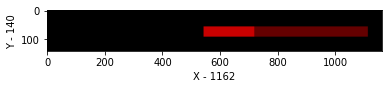

Percent -- 100.0


In [15]:
a = ((543, 56), (1112, 56), (1112, 90), (543, 90)) 
b = ((543, 56), (718, 56), (718, 90), (543, 90))
output = polygonContainsOtherPoly(a,b,True)
print("Percent -- " + str(output))

# Detect if the middle point is inside the other poly

In [16]:
def PolygonContainsOtherPoly(bigPoly, smallPoly):
    middlePt = (int((smallPoly[1][0]-smallPoly[0][0])/2)+smallPoly[0][0], 
                int((smallPoly[2][1]-smallPoly[0][1])/2)+smallPoly[0][1])
    big = bigPoly
    polygon = Polygon([(big[0][0]-1, big[0][1]-1), (big[1][0]+1, big[1][1]-1), 
                       (big[2][0]+1, big[2][1]+1), (big[3][0]-1, big[3][1]+1)])
    point = Point(middlePt)
    return (polygon.contains(point))

In [17]:
a = ((543, 56), (1112, 56), (1112, 90), (543, 90)) 
b = ((543, 56), (718, 56), (718, 90), (543, 90))
output = PolygonContainsOtherPoly(a,b)
print(output)

True


# More testsa

In [ ]:
def findBigGroups():
    

In [85]:
for i in test4:
    if " " in i[2].strip():
        print(i[2])
        print(i[2].split())

PROFESSIONAL EXPERIENCE Dominion 
['PROFESSIONAL', 'EXPERIENCE', 'Dominion']
Voting January 2020 - Present ( Contract ) County 
['Voting', 'January', '2020', '-', 'Present', '(', 'Contract', ')', 'County']


In [ ]:
def checkifMorethan1wordinLst(dataset):
    lstofNumsforRangesofWords = []
    for num in range(len(dataset)):
        if " " in dataset[num][2].strip() or dataset[num][2] == "N/A":
            lstofNumsforRangesofWords.append(num)
            print(str(num), end="\t") 
            print(dataset[num])

In [ ]:
def groupAllBoldWordsWithMajorGroup(dataset, distanceBefore, scoreThres):
    finalGroupContains = []
    for i in lstofNumsforRangesofWords:
        start = i-distanceBefore if i >= distanceBefore else 0
        totalBigWord = dataset[i][0]
        print(totalBigWord)
        tempGroupMaybeContain = []
        for word in dataset[start:i]:
            if polygonContainsOtherPoly(totalBigWord, word[0], False) == scoreThres:
                tempGroupMaybeContain.append(word)
        tempGroupMaybeContain.append(dataset[i])
        #print(len(tempGroupMaybeContain))
        if len(tempGroupMaybeContain) != 1:
            finalGroupContains.append(tempGroupMaybeContain)
    return finalGroupContains

In [100]:
finalGroupContains = []
for i in lstofNumsforRangesofWords:
    start = i-20 if i >= 20 else 0
    totalBigWord = test4[i][0]
    print(totalBigWord)
    tempGroupMaybeContain = []
    for word in test4[start:i]:
        if polygonContainsOtherPoly(totalBigWord, word[0], False) == 100:
            tempGroupMaybeContain.append(word)
    tempGroupMaybeContain.append(test4[i])
    #print(len(tempGroupMaybeContain))
    if len(tempGroupMaybeContain) != 1:
        finalGroupContains.append(tempGroupMaybeContain)

((100, 76), (585, 76), (585, 150), (100, 150))
((100, 76), (585, 76), (585, 150), (100, 150))
((201, 115), (1227, 115), (1227, 191), (201, 191))
((101, 685), (378, 685), (378, 716), (101, 716))
((200, 685), (1126, 685), (1126, 756), (200, 756))
((200, 1048), (1334, 1048), (1334, 1129), (200, 1129))
((101, 1252), (675, 1252), (675, 1322), (101, 1322))
((151, 1293), (1398, 1293), (1398, 1370), (151, 1370))


In [101]:
for i in finalGroupContains:
    for j in i:
        print(j)
    print("-")

[((102, 76), (353, 76), (353, 106), (102, 106)), 76.92, 'PROFESSIONAL', 'Word']
[((370, 76), (585, 76), (585, 106), (370, 106)), 122.2, 'EXPERIENCE', 'Word']
[((100, 76), (585, 76), (585, 150), (100, 150)), 100.0, 'PROFESSIONAL EXPERIENCE Dominion ', 'Para']
-
[((102, 76), (353, 76), (353, 106), (102, 106)), 76.92, 'PROFESSIONAL', 'Word']
[((370, 76), (585, 76), (585, 106), (370, 106)), 122.2, 'EXPERIENCE', 'Word']
[((100, 76), (585, 76), (585, 150), (100, 150)), 100.0, 'PROFESSIONAL EXPERIENCE Dominion ', 'Para']
[((102, 76), (353, 76), (353, 106), (102, 106)), 116.74, 'PROFESSIONAL', 'Capital']
[((370, 76), (585, 76), (585, 106), (370, 106)), 100.0, 'EXPERIENCE', 'Capital']
[((102, 76), (353, 76), (353, 106), (102, 106)), 44.79, 'PROFESSIONAL', 'SymbolAvg']
[((370, 76), (585, 76), (585, 106), (370, 106)), 78.75, 'EXPERIENCE', 'SymbolAvg']
[((100, 76), (585, 76), (585, 150), (100, 150)), 35.6944, 'N/A', 'SymbolAvg']
-
[((965, 115), (1070, 115), (1070, 150), (965, 150)), 32.86, 'Presen

In [113]:
TINT_COLOR = (0,255,0) 
TRANSPARENCY = 0.25
OPACITY = int(255 * TRANSPARENCY)
img = Image.open(imagePath)
img = img.convert("RGBA")
overlay = Image.new('RGBA', img.size, TINT_COLOR+(0,))
draw = ImageDraw.Draw(overlay)  # Create a context for drawing things on it.
font = ImageFont.truetype(fontPath, size=20)
count = 1
for i in finalGroupContains:
    draw.polygon(i[-1][0], fill=TINT_COLOR+(OPACITY,))
    color = 'rgb(0, 0, 0)' # black color
    draw.text((i[-1][0][0][0], i[-1][0][0][1]-20), str(count), fill=color, font=font)
    count+=1

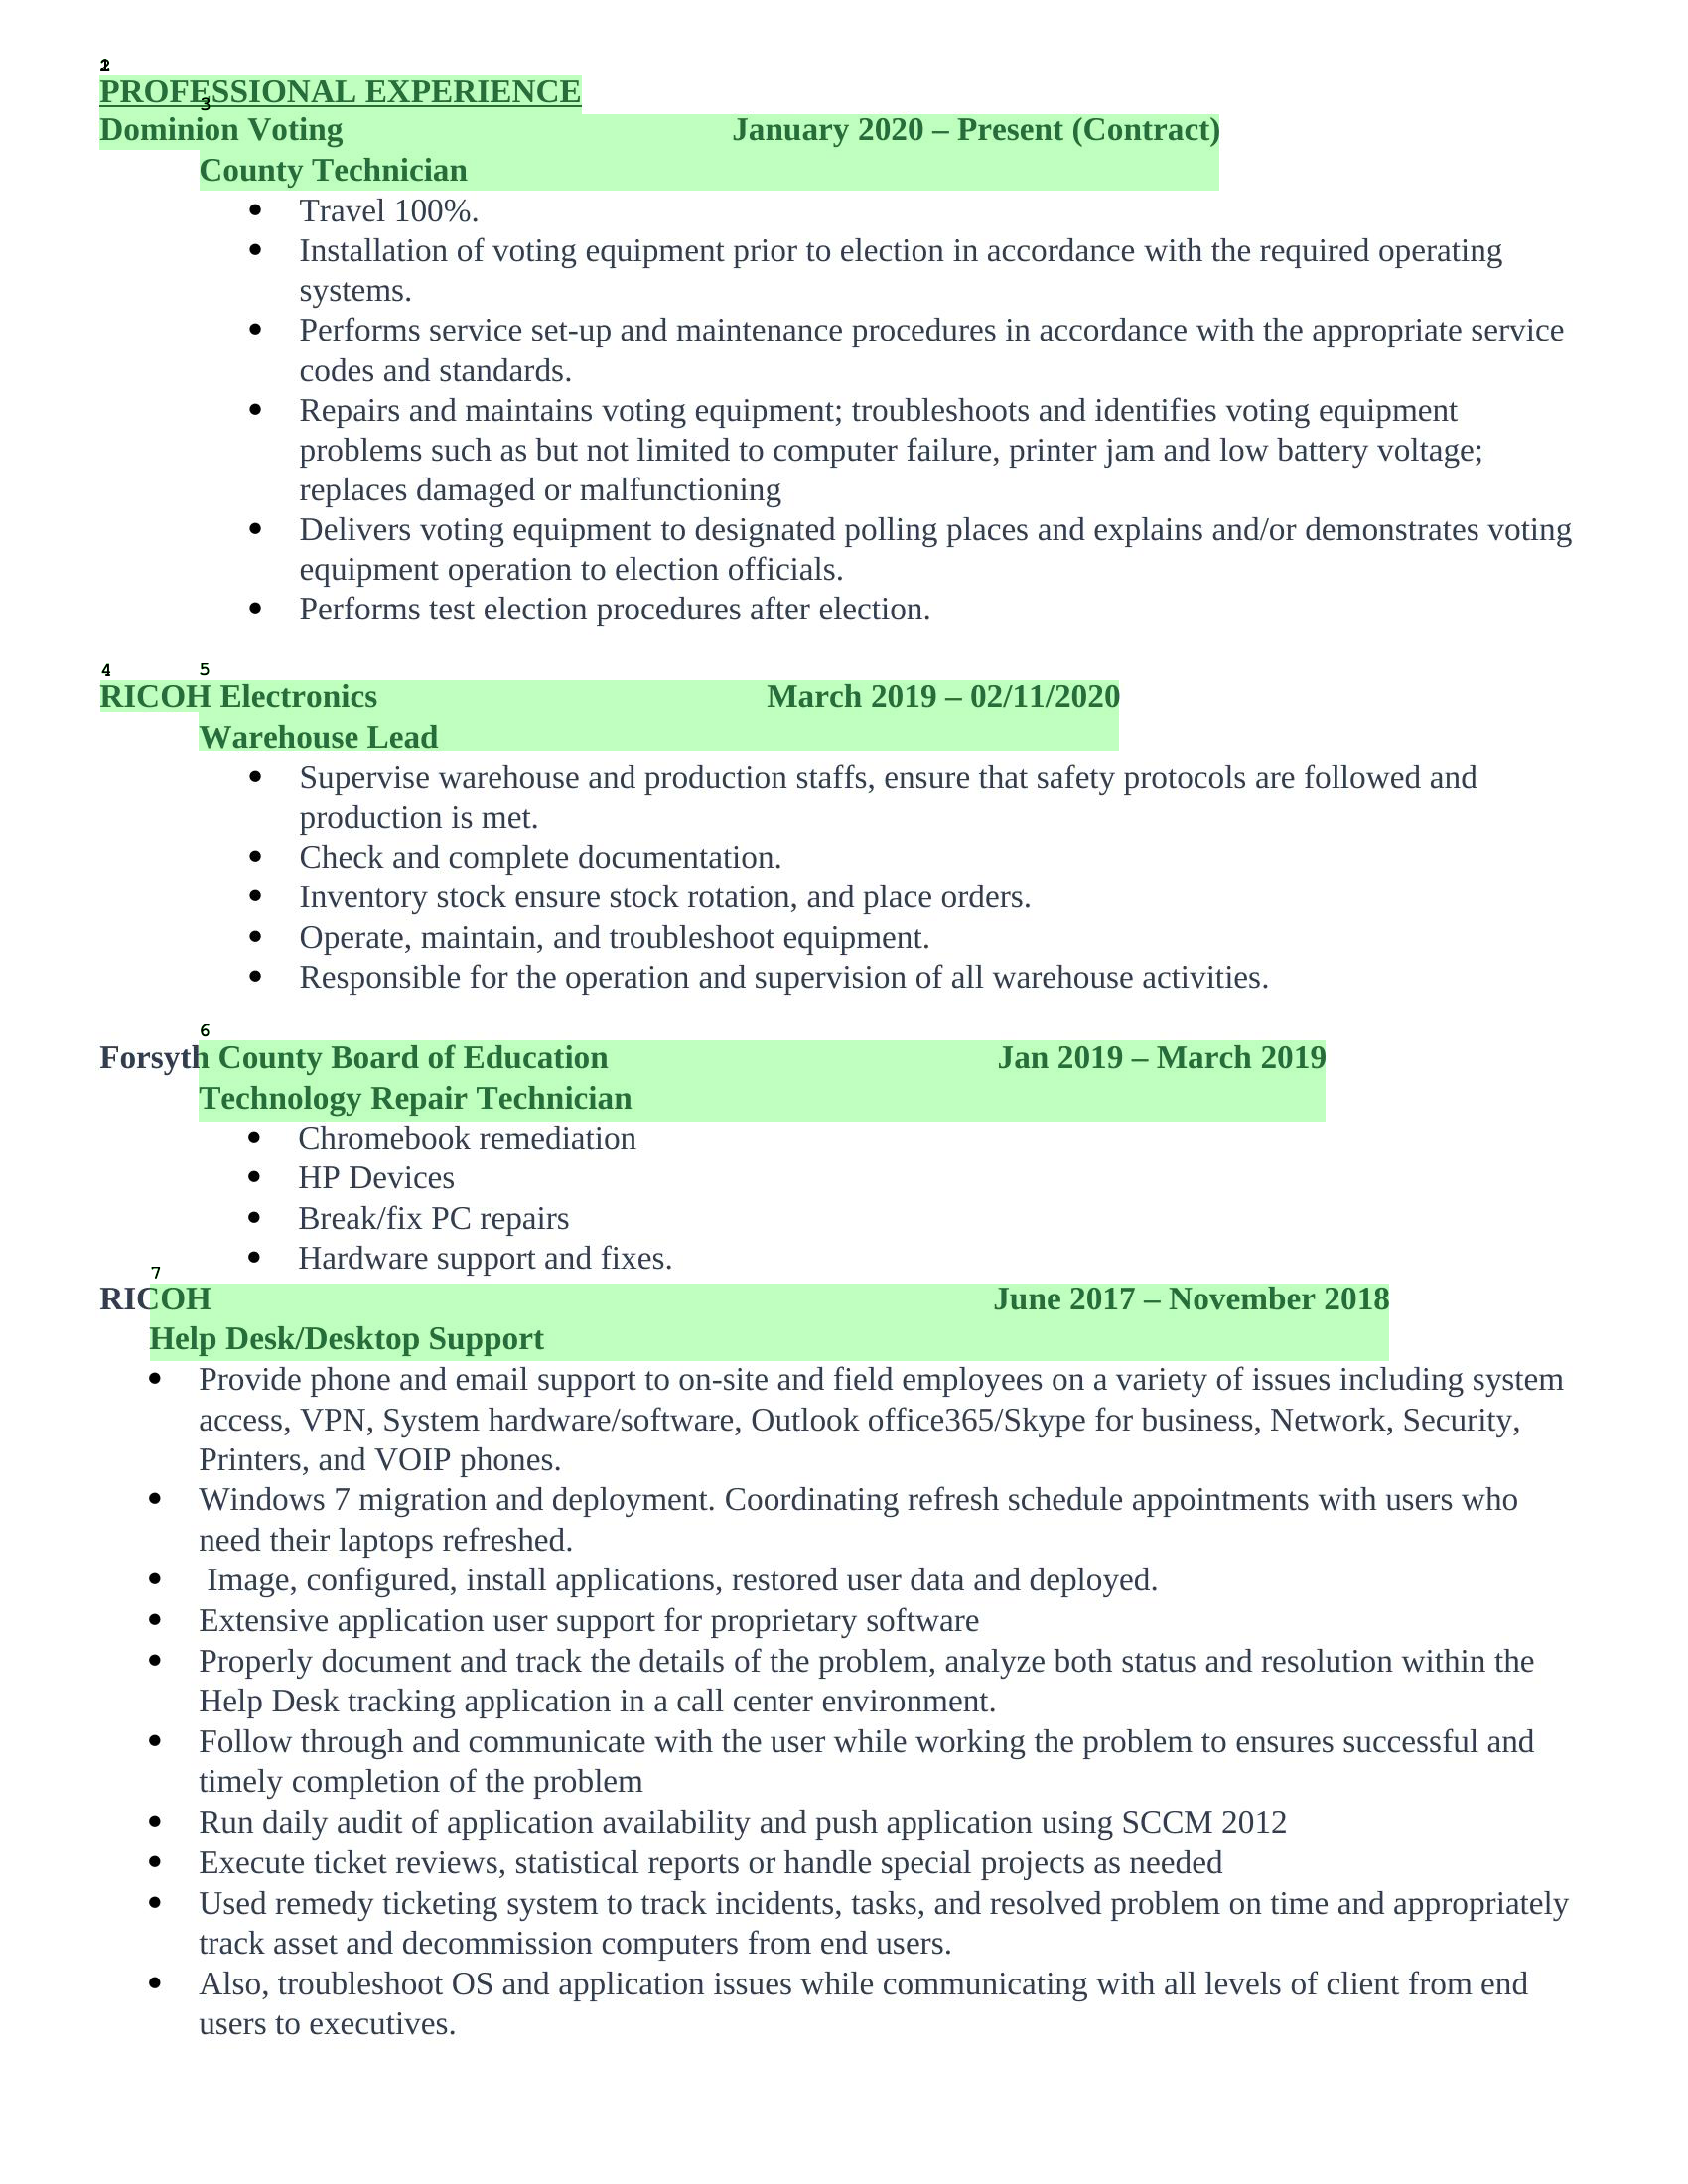

In [114]:
img = Image.alpha_composite(img, overlay)
img = img.convert("RGB") # Remove alpha for saving in jpg format.
img

In [25]:
finalGroupContains

[[[((102, 76), (353, 76), (353, 106), (102, 106)),
   76.92,
   'PROFESSIONAL',
   'Word'],
  [((370, 76), (585, 76), (585, 106), (370, 106)),
   122.2,
   'EXPERIENCE',
   'Word'],
  [((100, 76), (585, 76), (585, 150), (100, 150)),
   100.0,
   'PROFESSIONAL EXPERIENCE Dominion ',
   'Para']],
 [[((102, 76), (353, 76), (353, 106), (102, 106)),
   76.92,
   'PROFESSIONAL',
   'Word'],
  [((370, 76), (585, 76), (585, 106), (370, 106)),
   122.2,
   'EXPERIENCE',
   'Word'],
  [((100, 76), (585, 76), (585, 150), (100, 150)),
   100.0,
   'PROFESSIONAL EXPERIENCE Dominion ',
   'Para'],
  [((102, 76), (353, 76), (353, 106), (102, 106)),
   116.74,
   'PROFESSIONAL',
   'Capital'],
  [((370, 76), (585, 76), (585, 106), (370, 106)),
   100.0,
   'EXPERIENCE',
   'Capital'],
  [((102, 76), (353, 76), (353, 106), (102, 106)),
   44.79,
   'PROFESSIONAL',
   'SymbolAvg'],
  [((370, 76), (585, 76), (585, 106), (370, 106)),
   78.75,
   'EXPERIENCE',
   'SymbolAvg'],
  [((100, 76), (585, 76), (5

In [26]:
width = 1654 
height =  2339

In [27]:
tempprocesser= []
for i in finalGroupContains:
    tempprocesser.append(i[-1][0][0][0])
try:
    indentationPoint = statistics.mode(tempprocesser)
except:
    indentationPoint = statistics.median(tempprocesser)
print("Indenation from Left is " +  str(indentationPoint))

Indenation from Left is 126.0


In [28]:
tempprocesser

[100, 100, 201, 101, 200, 200, 101, 151]

In [29]:
lstofMiddleSectionTitles = []
for i in finalGroupContains:
    if abs((i[-1][0][1][0] - i[-1][0][0][0])/2 + i[-1][0][0][0] - (width/2)) < 20:
        print("Middle Point of Title: " + str((i[-1][0][1][0] - i[-1][0][0][0])/2 + i[-1][0][0][0]))

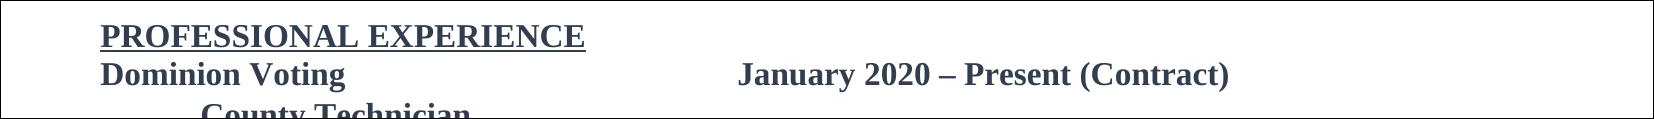

In [30]:
img = Image.open(imagePath)
img = img.convert("RGBA")
overlay = Image.new('RGBA', img.size, TINT_COLOR+(0,))
draw = ImageDraw.Draw(overlay)  # Create a context for drawing things on it.
draw.rectangle(((0,56),(width-1, 175-1)), outline = "black")
img = Image.alpha_composite(img, overlay)
img = img.convert("RGB") # Remove alpha for saving in jpg format.
im1 = img.crop((0,56,width,175))
display(im1)

[((100, 76), (585, 76), (585, 150), (100, 150)), 100.0, 'PROFESSIONAL EXPERIENCE Dominion ', 'Para']
((0, 76), (1653, 75))


SystemError: tile cannot extend outside image

<PIL.Image.Image image mode=RGB size=1654x0 at 0x24AA47B9248>

[((100, 76), (585, 76), (585, 150), (100, 150)), 35.6944, 'N/A', 'SymbolAvg']
((0, 76), (1653, 114))


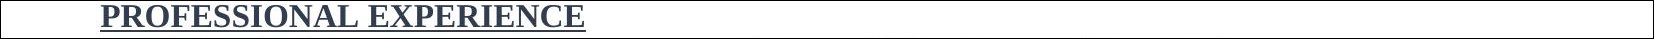

[((201, 115), (1227, 115), (1227, 191), (201, 191)), 44.444, 'Voting January 2020 - Present ( Contract ) County ', 'Para']
((0, 115), (1653, 684))


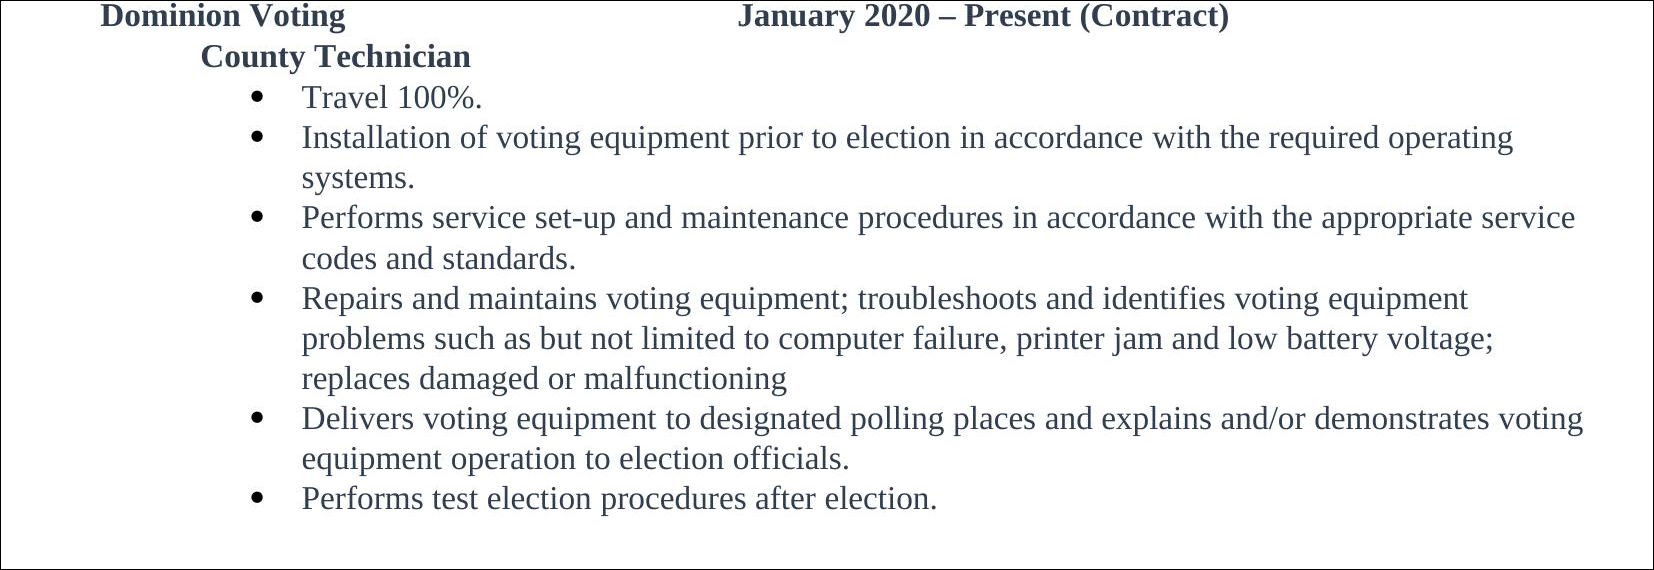

[((101, 685), (378, 685), (378, 716), (101, 716)), 10.0, 'N/A', 'SymbolAvg']
((0, 685), (1653, 684))


SystemError: tile cannot extend outside image

<PIL.Image.Image image mode=RGB size=1654x0 at 0x24AA4893E08>

[((200, 685), (1126, 685), (1126, 756), (200, 756)), 3.3333, 'N/A', 'SymbolAvg']
((0, 685), (1653, 1047))


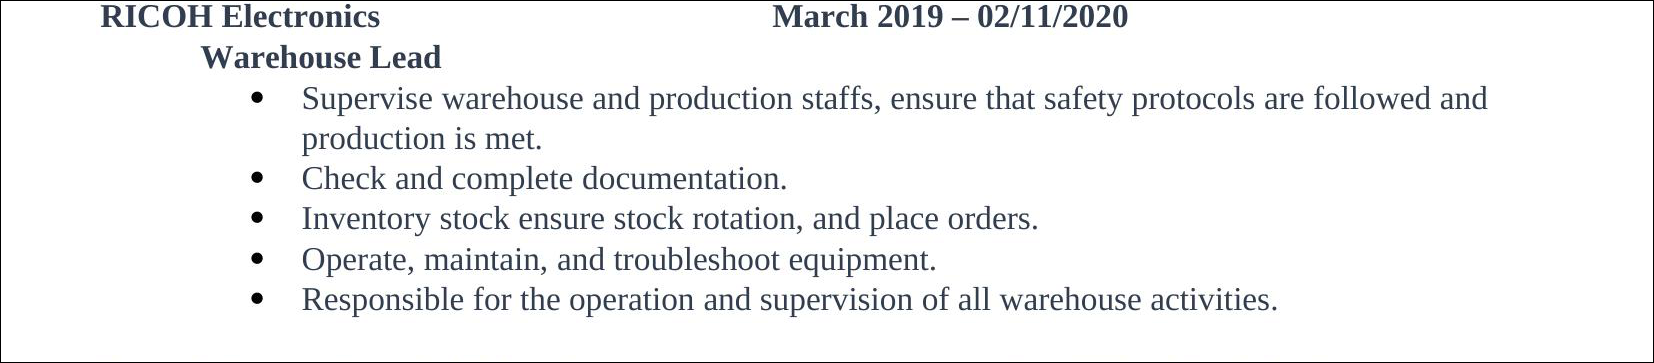

[((200, 1048), (1334, 1048), (1334, 1129), (200, 1129)), 5.2778, 'N/A', 'SymbolAvg']
((0, 1048), (1653, 1251))


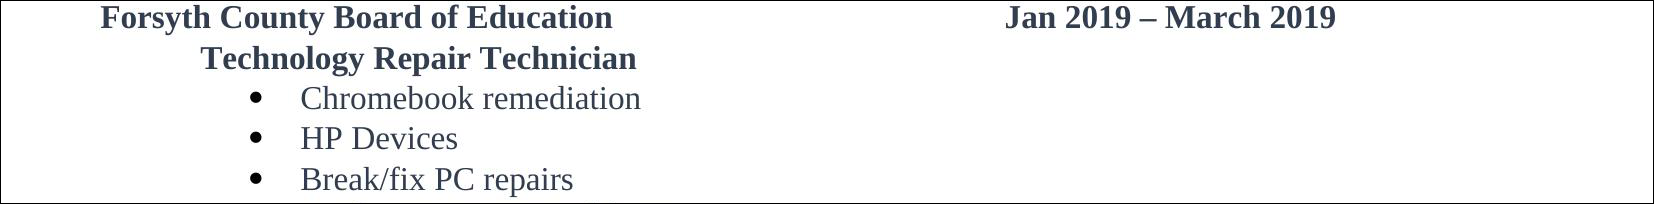

[((101, 1252), (675, 1252), (675, 1322), (101, 1322)), 6.6667, 'N/A', 'SymbolAvg']
((0, 1252), (1653, 1292))


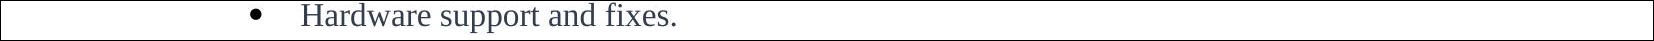

[((151, 1293), (1398, 1293), (1398, 1370), (151, 1370)), 3.8095, 'N/A', 'SymbolAvg']


IndexError: list index out of range

In [31]:
for i in range(len(finalGroupContains)):
    print(finalGroupContains[i][-1])
    img = Image.open(imagePath)
    img = img.convert("RGBA")
    overlay = Image.new('RGBA', img.size, TINT_COLOR+(0,))
    draw = ImageDraw.Draw(overlay)  # Create a context for drawing things on it.|
    draw.rectangle(((0,finalGroupContains[i][-1][0][0][1]),(width-1, finalGroupContains[i+1][-1][0][0][1]-1)), outline = "black")
    print(((0,finalGroupContains[i][-1][0][0][1]),(width-1, finalGroupContains[i+1][-1][0][0][1]-1)))
    img = Image.alpha_composite(img, overlay)
    img = img.convert("RGB") # Remove alpha for saving in jpg format.
    im1 = img.crop((0,finalGroupContains[i][-1][0][0][1],width,finalGroupContains[i+1][-1][0][0][1]))
    display(im1)

In [ ]:
((81, 1042), (461, 1044), (461, 1075), (81, 1073))
#((a,b),(c,d),(e,f),(g,h))
# *************************
#  (a,b)           (c,d)
#   ----------------
#   \              |
#   \              |
#   \              |
#   -----------------
#  (g,h)          (e,f)
((80,1800), (1650, 1800), (1650,2000), (80,2000))

In [ ]:
TRANSPARENCY = 0.25
TINT_COLOR = (0,0,0)
font = ImageFont.truetype(fontPath, size=20)
OPACITY = int(255 * TRANSPARENCY)
img = Image.open(imagePath)
img = img.convert("RGBA")
overlay = Image.new('RGBA', img.size, TINT_COLOR+(0,))
draw = ImageDraw.Draw(overlay)  # Create a context for drawing things on it.
draw.polygon(((719, 54), (958, 54), (958, 94), (719, 94)), fill=TINT_COLOR+(OPACITY,))
img = Image.alpha_composite(img, overlay)
img = img.convert("RGB") # Remove alpha for saving in jpg format.
img

In [ ]:
((81, 1042), (461, 1044), (461, 1075), (81, 1073))

In [ ]:
TRANSPARENCY = 0.25
TINT_COLOR = (0,0,0)
font = ImageFont.truetype(fontPath, size=20)
OPACITY = int(255 * TRANSPARENCY)
img = Image.open(imagePath)
img = img.convert("RGBA")
overlay = Image.new('RGBA', img.size, TINT_COLOR+(0,))
draw = ImageDraw.Draw(overlay)  # Create a context for drawing things on it.
for i in finalGroupContains:
    draw.polygon(i[-1][0], fill=TINT_COLOR+(OPACITY,))
img = Image.alpha_composite(img, overlay)
img = img.convert("RGB") # Remove alpha for saving in jpg format.
img

In [32]:
•

SyntaxError: invalid character in identifier (<ipython-input-32-7b0f76be6911>, line 1)

In [33]:
document.text

NameError: name 'document' is not defined

# Document

In [34]:
imgTxtVisionAPIPath = "/Users/kunal/Documents/VdartResumeProject/APIKEYSGOOGLE/resumeMatcher-pdf2img.json"
# ------- Checking for API -------
#Using API from Google and returns a JSON file but text is extracted from it
keyDIR = imgTxtVisionAPIPath #JSON key file to call the api
credentials = service_account.Credentials.from_service_account_file(keyDIR) #using service account to go through google
client = vision.ImageAnnotatorClient(credentials=credentials) # client api
#imagePath = "/Users/kunal/Documents/VdartResumeProject/VisionAPi/Document_402_1.jpg"
bounds = []
with io.open(imagePath, 'rb') as image_file:
    content = image_file.read()
image = types.Image(content=content)
response = client.document_text_detection(image=image)
global document
document = response.full_text_annotation

In [35]:
#((a,b),(c,d),(e,f),(g,h))
# *************************
#  (a,b)           (c,d)
#   ----------------
#   \              |
#   \              |
#   \              |
#   -----------------
#  (g,h)          (e,f)

# Y - pouints

In [36]:
test4 = 

SyntaxError: invalid syntax (<ipython-input-36-e8cfa48a019f>, line 1)

In [54]:
test4 = [[((102, 76), (353, 76), (353, 106), (102, 106)), 76.92, 'PROFESSIONAL', 'Word'], [((370, 76), (585, 76), (585, 106), (370, 106)), 122.2, 'EXPERIENCE', 'Word'], [((100, 76), (585, 76), (585, 150), (100, 150)), 100.0, 'PROFESSIONAL EXPERIENCE Dominion ', 'Para'], [((102, 76), (353, 76), (353, 106), (102, 106)), 116.74, 'PROFESSIONAL', 'Capital'], [((370, 76), (585, 76), (585, 106), (370, 106)), 100.0, 'EXPERIENCE', 'Capital'], [((102, 76), (353, 76), (353, 106), (102, 106)), 44.79, 'PROFESSIONAL', 'SymbolAvg'], [((370, 76), (585, 76), (585, 106), (370, 106)), 78.75, 'EXPERIENCE', 'SymbolAvg'], [((100, 76), (585, 76), (585, 150), (100, 150)), 35.6944, 'N/A', 'SymbolAvg'], [((101, 109), (240, 112), (239, 147), (100, 144)), 46.25, 'Dominion', 'Word'], [((101, 109), (240, 112), (239, 147), (100, 144)), 18.75, 'Dominion', 'SymbolAvg'], [((250, 113), (344, 115), (343, 150), (249, 148)), 38.33, 'Voting', 'Word'], [((250, 113), (344, 115), (343, 150), (249, 148)), 27.78, 'Voting', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 32.86, 'Present', 'Word'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 28.75, 'Contract', 'Word'], [((201, 115), (1227, 115), (1227, 191), (201, 191)), 44.444, 'Voting January 2020 - Present ( Contract ) County ', 'Para'], [((865, 115), (928, 115), (928, 150), (865, 150)), 37.5, '2020', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 16.07, 'Present', 'SymbolAvg'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 14.06, 'Contract', 'SymbolAvg'], [((201, 157), (303, 155), (303, 189), (202, 191)), 45.0, 'County', 'Word'], [((201, 157), (303, 155), (303, 189), (202, 191)), 18.75, 'County', 'SymbolAvg'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 33.33, 'jam', 'Word'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 12.5, 'jam', 'SymbolAvg'], [((420, 476), (538, 476), (538, 514), (420, 514)), 24.29, 'damaged', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.0, 'RICOH', 'Word'], [((773, 685), (867, 685), (867, 717), (773, 717)), 46.0, 'March', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.87, 'RICOH', 'Capital'], [((101, 685), (211, 685), (211, 716), (101, 716)), 35.0, 'RICOH', 'SymbolAvg'], [((101, 685), (378, 685), (378, 716), (101, 716)), 10.0, 'N/A', 'SymbolAvg'], [((773, 685), (867, 685), (867, 717), (773, 717)), 35.0, 'March', 'SymbolAvg'], [((878, 685), (942, 685), (942, 717), (878, 717)), 37.5, '2019', 'SymbolAvg'], [((978, 685), (1126, 685), (1126, 717), (978, 717)), 22.5, '02/11/2020', 'SymbolAvg'], [((200, 685), (1126, 685), (1126, 756), (200, 756)), 3.3333, 'N/A', 'SymbolAvg'], [((369, 725), (439, 725), (439, 754), (369, 754)), 47.75, 'Lead', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 25.56, 'Warehouse', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 16.67, 'Warehouse', 'SymbolAvg'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 35.56, 'Education', 'Word'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 12.5, 'Education', 'SymbolAvg'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 46.0, 'Board', 'Word'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 24.17, 'Board', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 76.67, 'Jan', 'Word'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 46.0, 'March', 'Word'], [((220, 1048), (322, 1047), (322, 1084), (220, 1085)), 12.5, 'County', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 27.78, 'Jan', 'SymbolAvg'], [((1066, 1048), (1129, 1048), (1129, 1079), (1066, 1079)), 37.5, '2019', 'SymbolAvg'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 35.0, 'March', 'SymbolAvg'], [((1271, 1048), (1334, 1048), (1334, 1079), (1271, 1079)), 37.5, '2019', 'SymbolAvg'], [((200, 1048), (1334, 1048), (1334, 1129), (200, 1129)), 5.2778, 'N/A', 'SymbolAvg'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 47.14, 'Forsyth', 'Word'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 16.07, 'Forsyth', 'SymbolAvg'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 43.0, 'Technician', 'Word'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 18.75, 'Technician', 'SymbolAvg'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 38.33, 'Repair', 'Word'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 27.78, 'Repair', 'SymbolAvg'], [((200, 1089), (362, 1087), (363, 1127), (201, 1129)), 37.0, 'Technology', 'Word'], [((301, 1170), (341, 1170), (341, 1199), (301, 1199)), 18.75, 'HP', 'SymbolAvg'], [((301, 1208), (374, 1209), (373, 1242), (300, 1241)), 26.0, 'Break', 'Word'], [((101, 1252), (675, 1252), (675, 1322), (101, 1322)), 6.6667, 'N/A', 'SymbolAvg'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 78.0, 'RICOH', 'Word'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 51.16, 'RICOH', 'Capital'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 47.5, 'RICOH', 'SymbolAvg'], [((1002, 1293), (1067, 1293), (1067, 1326), (1002, 1326)), 30.0, 'June', 'Word'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 28.75, 'November', 'Word'], [((1078, 1293), (1142, 1293), (1142, 1326), (1078, 1326)), 18.75, '2017', 'SymbolAvg'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 14.06, 'November', 'SymbolAvg'], [((1335, 1293), (1398, 1293), (1398, 1326), (1335, 1326)), 37.5, '2018', 'SymbolAvg'], [((151, 1293), (1398, 1293), (1398, 1370), (151, 1370)), 3.8095, 'N/A', 'SymbolAvg'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 57.5, 'Help', 'Word'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 32.5, 'Desk', 'Word'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 45.83, 'Help', 'SymbolAvg'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 18.75, 'Desk', 'SymbolAvg'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 32.86, 'Desktop', 'Word'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 16.07, 'Desktop', 'SymbolAvg'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 44.43, 'Support', 'Word'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 22.62, 'Support', 'SymbolAvg'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 73.67, 'VPN', 'Word'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 12.5, 'VPN', 'SymbolAvg'], [((201, 1696), (263, 1696), (263, 1734), (201, 1734)), 32.5, 'Help', 'Word'], [((274, 1696), (341, 1696), (341, 1734), (274, 1734)), 32.5, 'Desk', 'Word'], [((1091, 1737), (1200, 1737), (1200, 1775), (1091, 1775)), 24.29, 'problem', 'Word'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 43.33, 'Run', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 32.5, 'SCCM', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 50.48, 'SCCM', 'Capital'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 12.5, 'Run', 'SymbolAvg'], [((1280, 1899), (1336, 1899), (1336, 1940), (1280, 1940)), 25.0, 'time', 'Word'], [((1492, 1980), (1538, 1980), (1538, 2020), (1492, 2020)), 23.33, 'end', 'Word']]
test4 = [[((102, 76), (353, 76), (353, 106), (102, 106)), 76.92, 'PROFESSIONAL', 'Word'], [((370, 76), (585, 76), (585, 106), (370, 106)), 122.2, 'EXPERIENCE', 'Word'], [((100, 76), (585, 76), (585, 150), (100, 150)), 100.0, 'PROFESSIONAL EXPERIENCE Dominion ', 'Para'], [((102, 76), (353, 76), (353, 106), (102, 106)), 116.74, 'PROFESSIONAL', 'Capital'], [((370, 76), (585, 76), (585, 106), (370, 106)), 100.0, 'EXPERIENCE', 'Capital'], [((102, 76), (353, 76), (353, 106), (102, 106)), 44.79, 'PROFESSIONAL', 'SymbolAvg'], [((370, 76), (585, 76), (585, 106), (370, 106)), 78.75, 'EXPERIENCE', 'SymbolAvg'], [((100, 76), (585, 76), (585, 150), (100, 150)), 35.6944, 'N/A', 'SymbolAvg'], [((101, 109), (240, 112), (239, 147), (100, 144)), 46.25, 'Dominion', 'Word'], [((101, 109), (240, 112), (239, 147), (100, 144)), 18.75, 'Dominion', 'SymbolAvg'], [((250, 113), (344, 115), (343, 150), (249, 148)), 38.33, 'Voting', 'Word'], [((250, 113), (344, 115), (343, 150), (249, 148)), 27.78, 'Voting', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 32.86, 'Present', 'Word'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 28.75, 'Contract', 'Word'], [((201, 115), (1227, 115), (1227, 191), (201, 191)), 44.444, 'Voting January 2020 - Present ( Contract ) County ', 'Para'], [((865, 115), (928, 115), (928, 150), (865, 150)), 37.5, '2020', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 16.07, 'Present', 'SymbolAvg'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 14.06, 'Contract', 'SymbolAvg'], [((201, 157), (303, 155), (303, 189), (202, 191)), 45.0, 'County', 'Word'], [((201, 157), (303, 155), (303, 189), (202, 191)), 18.75, 'County', 'SymbolAvg'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 33.33, 'jam', 'Word'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 12.5, 'jam', 'SymbolAvg'], [((420, 476), (538, 476), (538, 514), (420, 514)), 24.29, 'damaged', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.0, 'RICOH', 'Word'], [((773, 685), (867, 685), (867, 717), (773, 717)), 46.0, 'March', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.87, 'RICOH', 'Capital'], [((101, 685), (211, 685), (211, 716), (101, 716)), 35.0, 'RICOH', 'SymbolAvg'], [((222, 685), (378, 685), (378, 716), (222, 716)), 10.23, 'Electronics', 'SymbolAvg'], [((101, 685), (378, 685), (378, 716), (101, 716)), 10.0, 'N/A', 'SymbolAvg'], [((773, 685), (867, 685), (867, 717), (773, 717)), 35.0, 'March', 'SymbolAvg'], [((878, 685), (942, 685), (942, 717), (878, 717)), 37.5, '2019', 'SymbolAvg'], [((978, 685), (1126, 685), (1126, 717), (978, 717)), 22.5, '02/11/2020', 'SymbolAvg'], [((200, 685), (1126, 685), (1126, 756), (200, 756)), 3.3333, 'N/A', 'SymbolAvg'], [((369, 725), (439, 725), (439, 754), (369, 754)), 47.75, 'Lead', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 25.56, 'Warehouse', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 16.67, 'Warehouse', 'SymbolAvg'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 35.56, 'Education', 'Word'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 12.5, 'Education', 'SymbolAvg'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 46.0, 'Board', 'Word'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 24.17, 'Board', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 76.67, 'Jan', 'Word'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 46.0, 'March', 'Word'], [((220, 1048), (322, 1047), (322, 1084), (220, 1085)), 12.5, 'County', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 27.78, 'Jan', 'SymbolAvg'], [((1066, 1048), (1129, 1048), (1129, 1079), (1066, 1079)), 37.5, '2019', 'SymbolAvg'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 35.0, 'March', 'SymbolAvg'], [((1271, 1048), (1334, 1048), (1334, 1079), (1271, 1079)), 37.5, '2019', 'SymbolAvg'], [((200, 1048), (1334, 1048), (1334, 1129), (200, 1129)), 5.2778, 'N/A', 'SymbolAvg'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 47.14, 'Forsyth', 'Word'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 16.07, 'Forsyth', 'SymbolAvg'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 43.0, 'Technician', 'Word'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 18.75, 'Technician', 'SymbolAvg'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 38.33, 'Repair', 'Word'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 27.78, 'Repair', 'SymbolAvg'], [((200, 1089), (362, 1087), (363, 1127), (201, 1129)), 37.0, 'Technology', 'Word'], [((301, 1170), (341, 1170), (341, 1199), (301, 1199)), 18.75, 'HP', 'SymbolAvg'], [((301, 1208), (374, 1209), (373, 1242), (300, 1241)), 26.0, 'Break', 'Word'], [((101, 1252), (675, 1252), (675, 1322), (101, 1322)), 6.6667, 'N/A', 'SymbolAvg'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 78.0, 'RICOH', 'Word'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 51.16, 'RICOH', 'Capital'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 47.5, 'RICOH', 'SymbolAvg'], [((1002, 1293), (1067, 1293), (1067, 1326), (1002, 1326)), 30.0, 'June', 'Word'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 28.75, 'November', 'Word'], [((1078, 1293), (1142, 1293), (1142, 1326), (1078, 1326)), 18.75, '2017', 'SymbolAvg'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 14.06, 'November', 'SymbolAvg'], [((1335, 1293), (1398, 1293), (1398, 1326), (1335, 1326)), 37.5, '2018', 'SymbolAvg'], [((151, 1293), (1398, 1293), (1398, 1370), (151, 1370)), 3.8095, 'N/A', 'SymbolAvg'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 57.5, 'Help', 'Word'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 32.5, 'Desk', 'Word'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 45.83, 'Help', 'SymbolAvg'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 18.75, 'Desk', 'SymbolAvg'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 32.86, 'Desktop', 'Word'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 16.07, 'Desktop', 'SymbolAvg'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 44.43, 'Support', 'Word'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 22.62, 'Support', 'SymbolAvg'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 73.67, 'VPN', 'Word'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 12.5, 'VPN', 'SymbolAvg'], [((201, 1696), (263, 1696), (263, 1734), (201, 1734)), 32.5, 'Help', 'Word'], [((274, 1696), (341, 1696), (341, 1734), (274, 1734)), 32.5, 'Desk', 'Word'], [((1091, 1737), (1200, 1737), (1200, 1775), (1091, 1775)), 24.29, 'problem', 'Word'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 43.33, 'Run', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 32.5, 'SCCM', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 50.48, 'SCCM', 'Capital'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 12.5, 'Run', 'SymbolAvg'], [((1280, 1899), (1336, 1899), (1336, 1940), (1280, 1940)), 25.0, 'time', 'Word'], [((1492, 1980), (1538, 1980), (1538, 2020), (1492, 2020)), 23.33, 'end', 'Word']]
test4 = [[((102, 76), (353, 76), (353, 106), (102, 106)), 76.92, 'PROFESSIONAL', 'Word'], [((370, 76), (585, 76), (585, 106), (370, 106)), 122.2, 'EXPERIENCE', 'Word'], [((100, 76), (585, 76), (585, 150), (100, 150)), 100.0, 'PROFESSIONAL EXPERIENCE Dominion ', 'Para'], [((102, 76), (353, 76), (353, 106), (102, 106)), 116.74, 'PROFESSIONAL', 'Capital'], [((370, 76), (585, 76), (585, 106), (370, 106)), 100.0, 'EXPERIENCE', 'Capital'], [((102, 76), (353, 76), (353, 106), (102, 106)), 44.79, 'PROFESSIONAL', 'SymbolAvg'], [((370, 76), (585, 76), (585, 106), (370, 106)), 78.75, 'EXPERIENCE', 'SymbolAvg'], [((100, 76), (585, 76), (585, 150), (100, 150)), 35.6944, 'N/A', 'SymbolAvg'], [((101, 109), (240, 112), (239, 147), (100, 144)), 46.25, 'Dominion', 'Word'], [((101, 109), (240, 112), (239, 147), (100, 144)), 18.75, 'Dominion', 'SymbolAvg'], [((250, 113), (344, 115), (343, 150), (249, 148)), 38.33, 'Voting', 'Word'], [((250, 113), (344, 115), (343, 150), (249, 148)), 27.78, 'Voting', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 32.86, 'Present', 'Word'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 28.75, 'Contract', 'Word'], [((201, 115), (1227, 115), (1227, 191), (201, 191)), 44.444, 'Voting January 2020 - Present ( Contract ) County ', 'Para'], [((865, 115), (928, 115), (928, 150), (865, 150)), 37.5, '2020', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 16.07, 'Present', 'SymbolAvg'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 14.06, 'Contract', 'SymbolAvg'], [((201, 157), (303, 155), (303, 189), (202, 191)), 45.0, 'County', 'Word'], [((201, 157), (303, 155), (303, 189), (202, 191)), 18.75, 'County', 'SymbolAvg'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 33.33, 'jam', 'Word'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 12.5, 'jam', 'SymbolAvg'], [((420, 476), (538, 476), (538, 514), (420, 514)), 24.29, 'damaged', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.0, 'RICOH', 'Word'], [((773, 685), (867, 685), (867, 717), (773, 717)), 46.0, 'March', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.87, 'RICOH', 'Capital'], [((101, 685), (211, 685), (211, 716), (101, 716)), 35.0, 'RICOH', 'SymbolAvg'], [((101, 685), (378, 685), (378, 716), (101, 716)), 10.0, 'N/A', 'SymbolAvg'], [((773, 685), (867, 685), (867, 717), (773, 717)), 35.0, 'March', 'SymbolAvg'], [((878, 685), (942, 685), (942, 717), (878, 717)), 37.5, '2019', 'SymbolAvg'], [((978, 685), (1126, 685), (1126, 717), (978, 717)), 22.5, '02/11/2020', 'SymbolAvg'], [((369, 725), (439, 725), (439, 754), (369, 754)), 47.75, 'Lead', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 25.56, 'Warehouse', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 16.67, 'Warehouse', 'SymbolAvg'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 35.56, 'Education', 'Word'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 12.5, 'Education', 'SymbolAvg'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 46.0, 'Board', 'Word'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 24.17, 'Board', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 76.67, 'Jan', 'Word'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 46.0, 'March', 'Word'], [((220, 1048), (322, 1047), (322, 1084), (220, 1085)), 12.5, 'County', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 27.78, 'Jan', 'SymbolAvg'], [((1066, 1048), (1129, 1048), (1129, 1079), (1066, 1079)), 37.5, '2019', 'SymbolAvg'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 35.0, 'March', 'SymbolAvg'], [((1271, 1048), (1334, 1048), (1334, 1079), (1271, 1079)), 37.5, '2019', 'SymbolAvg'], [((200, 1048), (1334, 1048), (1334, 1129), (200, 1129)), 5.2778, 'N/A', 'SymbolAvg'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 47.14, 'Forsyth', 'Word'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 16.07, 'Forsyth', 'SymbolAvg'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 43.0, 'Technician', 'Word'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 18.75, 'Technician', 'SymbolAvg'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 38.33, 'Repair', 'Word'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 27.78, 'Repair', 'SymbolAvg'], [((200, 1089), (362, 1087), (363, 1127), (201, 1129)), 37.0, 'Technology', 'Word'], [((301, 1170), (341, 1170), (341, 1199), (301, 1199)), 18.75, 'HP', 'SymbolAvg'], [((301, 1208), (374, 1209), (373, 1242), (300, 1241)), 26.0, 'Break', 'Word'], [((101, 1252), (675, 1252), (675, 1322), (101, 1322)), 6.6667, 'N/A', 'SymbolAvg'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 78.0, 'RICOH', 'Word'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 51.16, 'RICOH', 'Capital'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 47.5, 'RICOH', 'SymbolAvg'], [((1002, 1293), (1067, 1293), (1067, 1326), (1002, 1326)), 30.0, 'June', 'Word'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 28.75, 'November', 'Word'], [((1078, 1293), (1142, 1293), (1142, 1326), (1078, 1326)), 18.75, '2017', 'SymbolAvg'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 14.06, 'November', 'SymbolAvg'], [((1335, 1293), (1398, 1293), (1398, 1326), (1335, 1326)), 37.5, '2018', 'SymbolAvg'], [((151, 1293), (1398, 1293), (1398, 1370), (151, 1370)), 3.8095, 'N/A', 'SymbolAvg'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 57.5, 'Help', 'Word'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 32.5, 'Desk', 'Word'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 45.83, 'Help', 'SymbolAvg'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 18.75, 'Desk', 'SymbolAvg'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 32.86, 'Desktop', 'Word'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 16.07, 'Desktop', 'SymbolAvg'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 44.43, 'Support', 'Word'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 22.62, 'Support', 'SymbolAvg'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 73.67, 'VPN', 'Word'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 12.5, 'VPN', 'SymbolAvg'], [((201, 1696), (263, 1696), (263, 1734), (201, 1734)), 32.5, 'Help', 'Word'], [((274, 1696), (341, 1696), (341, 1734), (274, 1734)), 32.5, 'Desk', 'Word'], [((1091, 1737), (1200, 1737), (1200, 1775), (1091, 1775)), 24.29, 'problem', 'Word'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 43.33, 'Run', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 32.5, 'SCCM', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 50.48, 'SCCM', 'Capital'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 12.5, 'Run', 'SymbolAvg'], [((1280, 1899), (1336, 1899), (1336, 1940), (1280, 1940)), 25.0, 'time', 'Word']]
test4 = [[((102, 76), (353, 76), (353, 106), (102, 106)), 76.92, 'PROFESSIONAL', 'Word'], [((370, 76), (585, 76), (585, 106), (370, 106)), 122.2, 'EXPERIENCE', 'Word'], [((100, 76), (585, 76), (585, 150), (100, 150)), 100.0, 'PROFESSIONAL EXPERIENCE Dominion ', 'Para'], [((102, 76), (353, 76), (353, 106), (102, 106)), 116.74, 'PROFESSIONAL', 'Capital'], [((370, 76), (585, 76), (585, 106), (370, 106)), 100.0, 'EXPERIENCE', 'Capital'], [((102, 76), (353, 76), (353, 106), (102, 106)), 44.79, 'PROFESSIONAL', 'SymbolAvg'], [((370, 76), (585, 76), (585, 106), (370, 106)), 78.75, 'EXPERIENCE', 'SymbolAvg'], [((100, 76), (585, 76), (585, 150), (100, 150)), 35.6944, 'N/A', 'SymbolAvg'], [((101, 109), (240, 112), (239, 147), (100, 144)), 46.25, 'Dominion', 'Word'], [((101, 109), (240, 112), (239, 147), (100, 144)), 18.75, 'Dominion', 'SymbolAvg'], [((250, 113), (344, 115), (343, 150), (249, 148)), 38.33, 'Voting', 'Word'], [((250, 113), (344, 115), (343, 150), (249, 148)), 27.78, 'Voting', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 32.86, 'Present', 'Word'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 28.75, 'Contract', 'Word'], [((201, 115), (1227, 115), (1227, 191), (201, 191)), 44.444, 'Voting January 2020 - Present ( Contract ) County ', 'Para'], [((865, 115), (928, 115), (928, 150), (865, 150)), 37.5, '2020', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 16.07, 'Present', 'SymbolAvg'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 14.06, 'Contract', 'SymbolAvg'], [((201, 157), (303, 155), (303, 189), (202, 191)), 45.0, 'County', 'Word'], [((201, 157), (303, 155), (303, 189), (202, 191)), 18.75, 'County', 'SymbolAvg'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 33.33, 'jam', 'Word'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 12.5, 'jam', 'SymbolAvg'], [((420, 476), (538, 476), (538, 514), (420, 514)), 24.29, 'damaged', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.0, 'RICOH', 'Word'], [((773, 685), (867, 685), (867, 717), (773, 717)), 46.0, 'March', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.87, 'RICOH', 'Capital'], [((101, 685), (211, 685), (211, 716), (101, 716)), 35.0, 'RICOH', 'SymbolAvg'], [((101, 685), (378, 685), (378, 716), (101, 716)), 10.0, 'N/A', 'SymbolAvg'], [((773, 685), (867, 685), (867, 717), (773, 717)), 35.0, 'March', 'SymbolAvg'], [((878, 685), (942, 685), (942, 717), (878, 717)), 37.5, '2019', 'SymbolAvg'], [((978, 685), (1126, 685), (1126, 717), (978, 717)), 22.5, '02/11/2020', 'SymbolAvg'], [((200, 685), (1126, 685), (1126, 756), (200, 756)), 3.3333, 'N/A', 'SymbolAvg'], [((369, 725), (439, 725), (439, 754), (369, 754)), 47.75, 'Lead', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 25.56, 'Warehouse', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 16.67, 'Warehouse', 'SymbolAvg'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 35.56, 'Education', 'Word'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 12.5, 'Education', 'SymbolAvg'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 46.0, 'Board', 'Word'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 24.17, 'Board', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 76.67, 'Jan', 'Word'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 46.0, 'March', 'Word'], [((220, 1048), (322, 1047), (322, 1084), (220, 1085)), 12.5, 'County', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 27.78, 'Jan', 'SymbolAvg'], [((1066, 1048), (1129, 1048), (1129, 1079), (1066, 1079)), 37.5, '2019', 'SymbolAvg'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 35.0, 'March', 'SymbolAvg'], [((1271, 1048), (1334, 1048), (1334, 1079), (1271, 1079)), 37.5, '2019', 'SymbolAvg'], [((200, 1048), (1334, 1048), (1334, 1129), (200, 1129)), 5.2778, 'N/A', 'SymbolAvg'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 47.14, 'Forsyth', 'Word'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 16.07, 'Forsyth', 'SymbolAvg'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 43.0, 'Technician', 'Word'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 18.75, 'Technician', 'SymbolAvg'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 38.33, 'Repair', 'Word'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 27.78, 'Repair', 'SymbolAvg'], [((200, 1089), (362, 1087), (363, 1127), (201, 1129)), 37.0, 'Technology', 'Word'], [((301, 1170), (341, 1170), (341, 1199), (301, 1199)), 18.75, 'HP', 'SymbolAvg'], [((301, 1208), (374, 1209), (373, 1242), (300, 1241)), 26.0, 'Break', 'Word'], [((101, 1252), (675, 1252), (675, 1322), (101, 1322)), 6.6667, 'N/A', 'SymbolAvg'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 78.0, 'RICOH', 'Word'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 51.16, 'RICOH', 'Capital'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 47.5, 'RICOH', 'SymbolAvg'], [((1002, 1293), (1067, 1293), (1067, 1326), (1002, 1326)), 30.0, 'June', 'Word'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 28.75, 'November', 'Word'], [((1078, 1293), (1142, 1293), (1142, 1326), (1078, 1326)), 18.75, '2017', 'SymbolAvg'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 14.06, 'November', 'SymbolAvg'], [((1335, 1293), (1398, 1293), (1398, 1326), (1335, 1326)), 37.5, '2018', 'SymbolAvg'], [((151, 1293), (1398, 1293), (1398, 1370), (151, 1370)), 3.8095, 'N/A', 'SymbolAvg'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 57.5, 'Help', 'Word'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 32.5, 'Desk', 'Word'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 45.83, 'Help', 'SymbolAvg'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 18.75, 'Desk', 'SymbolAvg'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 32.86, 'Desktop', 'Word'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 16.07, 'Desktop', 'SymbolAvg'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 44.43, 'Support', 'Word'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 22.62, 'Support', 'SymbolAvg'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 73.67, 'VPN', 'Word'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 12.5, 'VPN', 'SymbolAvg'], [((201, 1696), (263, 1696), (263, 1734), (201, 1734)), 32.5, 'Help', 'Word'], [((274, 1696), (341, 1696), (341, 1734), (274, 1734)), 32.5, 'Desk', 'Word'], [((1091, 1737), (1200, 1737), (1200, 1775), (1091, 1775)), 24.29, 'problem', 'Word'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 43.33, 'Run', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 32.5, 'SCCM', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 50.48, 'SCCM', 'Capital'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 12.5, 'Run', 'SymbolAvg'], [((1280, 1899), (1336, 1899), (1336, 1940), (1280, 1940)), 25.0, 'time', 'Word'], [((1492, 1980), (1538, 1980), (1538, 2020), (1492, 2020)), 23.33, 'end', 'Word']]
test4 = [[((102, 76), (353, 76), (353, 106), (102, 106)), 76.92, 'PROFESSIONAL', 'Word'], [((370, 76), (585, 76), (585, 106), (370, 106)), 122.2, 'EXPERIENCE', 'Word'], [((100, 76), (585, 76), (585, 150), (100, 150)), 100.0, 'PROFESSIONAL EXPERIENCE Dominion ', 'Para'], [((102, 76), (353, 76), (353, 106), (102, 106)), 116.74, 'PROFESSIONAL', 'Capital'], [((370, 76), (585, 76), (585, 106), (370, 106)), 100.0, 'EXPERIENCE', 'Capital'], [((102, 76), (353, 76), (353, 106), (102, 106)), 44.79, 'PROFESSIONAL', 'SymbolAvg'], [((370, 76), (585, 76), (585, 106), (370, 106)), 78.75, 'EXPERIENCE', 'SymbolAvg'], [((100, 76), (585, 76), (585, 150), (100, 150)), 35.6944, 'N/A', 'SymbolAvg'], [((101, 109), (240, 112), (239, 147), (100, 144)), 46.25, 'Dominion', 'Word'], [((101, 109), (240, 112), (239, 147), (100, 144)), 18.75, 'Dominion', 'SymbolAvg'], [((250, 113), (344, 115), (343, 150), (249, 148)), 38.33, 'Voting', 'Word'], [((250, 113), (344, 115), (343, 150), (249, 148)), 27.78, 'Voting', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 32.86, 'Present', 'Word'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 28.75, 'Contract', 'Word'], [((201, 115), (1227, 115), (1227, 191), (201, 191)), 44.444, 'Voting January 2020 - Present ( Contract ) County ', 'Para'], [((865, 115), (928, 115), (928, 150), (865, 150)), 37.5, '2020', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 16.07, 'Present', 'SymbolAvg'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 14.06, 'Contract', 'SymbolAvg'], [((201, 157), (303, 155), (303, 189), (202, 191)), 45.0, 'County', 'Word'], [((201, 157), (303, 155), (303, 189), (202, 191)), 18.75, 'County', 'SymbolAvg'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 33.33, 'jam', 'Word'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 12.5, 'jam', 'SymbolAvg'], [((420, 476), (538, 476), (538, 514), (420, 514)), 24.29, 'damaged', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.0, 'RICOH', 'Word'], [((773, 685), (867, 685), (867, 717), (773, 717)), 46.0, 'March', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.87, 'RICOH', 'Capital'], [((101, 685), (211, 685), (211, 716), (101, 716)), 35.0, 'RICOH', 'SymbolAvg'], [((101, 685), (378, 685), (378, 716), (101, 716)), 10.0, 'N/A', 'SymbolAvg'], [((773, 685), (867, 685), (867, 717), (773, 717)), 35.0, 'March', 'SymbolAvg'], [((878, 685), (942, 685), (942, 717), (878, 717)), 37.5, '2019', 'SymbolAvg'], [((978, 685), (1126, 685), (1126, 717), (978, 717)), 22.5, '02/11/2020', 'SymbolAvg'], [((200, 685), (1126, 685), (1126, 756), (200, 756)), 3.3333, 'N/A', 'SymbolAvg'], [((369, 725), (439, 725), (439, 754), (369, 754)), 47.75, 'Lead', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 25.56, 'Warehouse', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 16.67, 'Warehouse', 'SymbolAvg'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 35.56, 'Education', 'Word'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 12.5, 'Education', 'SymbolAvg'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 46.0, 'Board', 'Word'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 24.17, 'Board', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 76.67, 'Jan', 'Word'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 46.0, 'March', 'Word'], [((220, 1048), (322, 1047), (322, 1084), (220, 1085)), 12.5, 'County', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 27.78, 'Jan', 'SymbolAvg'], [((1066, 1048), (1129, 1048), (1129, 1079), (1066, 1079)), 37.5, '2019', 'SymbolAvg'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 35.0, 'March', 'SymbolAvg'], [((1271, 1048), (1334, 1048), (1334, 1079), (1271, 1079)), 37.5, '2019', 'SymbolAvg'], [((200, 1048), (1334, 1048), (1334, 1129), (200, 1129)), 5.2778, 'N/A', 'SymbolAvg'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 47.14, 'Forsyth', 'Word'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 16.07, 'Forsyth', 'SymbolAvg'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 43.0, 'Technician', 'Word'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 18.75, 'Technician', 'SymbolAvg'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 38.33, 'Repair', 'Word'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 27.78, 'Repair', 'SymbolAvg'], [((200, 1089), (362, 1087), (363, 1127), (201, 1129)), 37.0, 'Technology', 'Word'], [((301, 1170), (341, 1170), (341, 1199), (301, 1199)), 18.75, 'HP', 'SymbolAvg'], [((301, 1208), (374, 1209), (373, 1242), (300, 1241)), 26.0, 'Break', 'Word'], [((101, 1252), (675, 1252), (675, 1322), (101, 1322)), 6.6667, 'N/A', 'SymbolAvg'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 78.0, 'RICOH', 'Word'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 51.16, 'RICOH', 'Capital'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 47.5, 'RICOH', 'SymbolAvg'], [((1002, 1293), (1067, 1293), (1067, 1326), (1002, 1326)), 30.0, 'June', 'Word'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 28.75, 'November', 'Word'], [((1078, 1293), (1142, 1293), (1142, 1326), (1078, 1326)), 18.75, '2017', 'SymbolAvg'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 14.06, 'November', 'SymbolAvg'], [((1335, 1293), (1398, 1293), (1398, 1326), (1335, 1326)), 37.5, '2018', 'SymbolAvg'], [((151, 1293), (1398, 1293), (1398, 1370), (151, 1370)), 3.8095, 'N/A', 'SymbolAvg'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 57.5, 'Help', 'Word'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 32.5, 'Desk', 'Word'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 45.83, 'Help', 'SymbolAvg'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 18.75, 'Desk', 'SymbolAvg'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 32.86, 'Desktop', 'Word'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 16.07, 'Desktop', 'SymbolAvg'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 44.43, 'Support', 'Word'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 22.62, 'Support', 'SymbolAvg'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 73.67, 'VPN', 'Word'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 12.5, 'VPN', 'SymbolAvg'], [((201, 1696), (263, 1696), (263, 1734), (201, 1734)), 32.5, 'Help', 'Word'], [((274, 1696), (341, 1696), (341, 1734), (274, 1734)), 32.5, 'Desk', 'Word'], [((1091, 1737), (1200, 1737), (1200, 1775), (1091, 1775)), 24.29, 'problem', 'Word'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 43.33, 'Run', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 32.5, 'SCCM', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 50.48, 'SCCM', 'Capital'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 12.5, 'Run', 'SymbolAvg'], [((1280, 1899), (1336, 1899), (1336, 1940), (1280, 1940)), 25.0, 'time', 'Word']]
#test4 = [[((102, 76), (353, 76), (353, 106), (102, 106)), 76.92, 'PROFESSIONAL', 'Word'], [((370, 76), (585, 76), (585, 106), (370, 106)), 122.2, 'EXPERIENCE', 'Word'], [((100, 76), (585, 76), (585, 150), (100, 150)), 100.0, 'PROFESSIONAL EXPERIENCE Dominion ', 'Para'], [((102, 76), (353, 76), (353, 106), (102, 106)), 116.74, 'PROFESSIONAL', 'Capital'], [((370, 76), (585, 76), (585, 106), (370, 106)), 100.0, 'EXPERIENCE', 'Capital'], [((102, 76), (353, 76), (353, 106), (102, 106)), 44.79, 'PROFESSIONAL', 'SymbolAvg'], [((370, 76), (585, 76), (585, 106), (370, 106)), 78.75, 'EXPERIENCE', 'SymbolAvg'], [((100, 76), (585, 76), (585, 150), (100, 150)), 35.6944, 'N/A', 'SymbolAvg'], [((101, 109), (240, 112), (239, 147), (100, 144)), 46.25, 'Dominion', 'Word'], [((101, 109), (240, 112), (239, 147), (100, 144)), 18.75, 'Dominion', 'SymbolAvg'], [((250, 113), (344, 115), (343, 150), (249, 148)), 38.33, 'Voting', 'Word'], [((250, 113), (344, 115), (343, 150), (249, 148)), 27.78, 'Voting', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 32.86, 'Present', 'Word'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 28.75, 'Contract', 'Word'], [((201, 115), (1227, 115), (1227, 191), (201, 191)), 44.444, 'Voting January 2020 - Present ( Contract ) County ', 'Para'], [((865, 115), (928, 115), (928, 150), (865, 150)), 37.5, '2020', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 16.07, 'Present', 'SymbolAvg'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 14.06, 'Contract', 'SymbolAvg'], [((313, 155), (468, 153), (468, 187), (314, 189)), 23.0, 'Technician', 'Word'], [((201, 157), (303, 155), (303, 189), (202, 191)), 45.0, 'County', 'Word'], [((201, 157), (303, 155), (303, 189), (202, 191)), 18.75, 'County', 'SymbolAvg'], [((302, 437), (423, 437), (423, 477), (302, 477)), 21.25, 'problems', 'Word'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 33.33, 'jam', 'Word'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 12.5, 'jam', 'SymbolAvg'], [((420, 476), (538, 476), (538, 514), (420, 514)), 24.29, 'damaged', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.0, 'RICOH', 'Word'], [((773, 685), (867, 685), (867, 717), (773, 717)), 46.0, 'March', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.87, 'RICOH', 'Capital'], [((101, 685), (211, 685), (211, 716), (101, 716)), 35.0, 'RICOH', 'SymbolAvg'], [((222, 685), (378, 685), (378, 716), (222, 716)), 10.23, 'Electronics', 'SymbolAvg'], [((101, 685), (378, 685), (378, 716), (101, 716)), 10.0, 'N/A', 'SymbolAvg'], [((773, 685), (867, 685), (867, 717), (773, 717)), 35.0, 'March', 'SymbolAvg'], [((878, 685), (942, 685), (942, 717), (878, 717)), 37.5, '2019', 'SymbolAvg'], [((978, 685), (1126, 685), (1126, 717), (978, 717)), 22.5, '02/11/2020', 'SymbolAvg'], [((200, 685), (1126, 685), (1126, 756), (200, 756)), 3.3333, 'N/A', 'SymbolAvg'], [((369, 725), (439, 725), (439, 754), (369, 754)), 47.75, 'Lead', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 25.56, 'Warehouse', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 16.67, 'Warehouse', 'SymbolAvg'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 35.56, 'Education', 'Word'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 12.5, 'Education', 'SymbolAvg'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 46.0, 'Board', 'Word'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 24.17, 'Board', 'SymbolAvg'], [((220, 1048), (322, 1047), (322, 1084), (220, 1085)), 21.67, 'County', 'Word'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 76.67, 'Jan', 'Word'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 46.0, 'March', 'Word'], [((220, 1048), (322, 1047), (322, 1084), (220, 1085)), 12.5, 'County', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 27.78, 'Jan', 'SymbolAvg'], [((1066, 1048), (1129, 1048), (1129, 1079), (1066, 1079)), 37.5, '2019', 'SymbolAvg'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 35.0, 'March', 'SymbolAvg'], [((1271, 1048), (1334, 1048), (1334, 1079), (1271, 1079)), 37.5, '2019', 'SymbolAvg'], [((200, 1048), (1334, 1048), (1334, 1129), (200, 1129)), 5.2778, 'N/A', 'SymbolAvg'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 47.14, 'Forsyth', 'Word'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 16.07, 'Forsyth', 'SymbolAvg'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 43.0, 'Technician', 'Word'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 18.75, 'Technician', 'SymbolAvg'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 38.33, 'Repair', 'Word'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 27.78, 'Repair', 'SymbolAvg'], [((200, 1089), (362, 1087), (363, 1127), (201, 1129)), 37.0, 'Technology', 'Word'], [((301, 1170), (341, 1170), (341, 1199), (301, 1199)), 18.75, 'HP', 'SymbolAvg'], [((301, 1208), (374, 1209), (373, 1242), (300, 1241)), 26.0, 'Break', 'Word'], [((101, 1252), (675, 1252), (675, 1322), (101, 1322)), 6.6667, 'N/A', 'SymbolAvg'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 78.0, 'RICOH', 'Word'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 51.16, 'RICOH', 'Capital'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 47.5, 'RICOH', 'SymbolAvg'], [((1002, 1293), (1067, 1293), (1067, 1326), (1002, 1326)), 30.0, 'June', 'Word'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 28.75, 'November', 'Word'], [((1078, 1293), (1142, 1293), (1142, 1326), (1078, 1326)), 18.75, '2017', 'SymbolAvg'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 14.06, 'November', 'SymbolAvg'], [((1335, 1293), (1398, 1293), (1398, 1326), (1335, 1326)), 37.5, '2018', 'SymbolAvg'], [((151, 1293), (1398, 1293), (1398, 1370), (151, 1370)), 3.8095, 'N/A', 'SymbolAvg'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 57.5, 'Help', 'Word'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 32.5, 'Desk', 'Word'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 45.83, 'Help', 'SymbolAvg'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 18.75, 'Desk', 'SymbolAvg'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 32.86, 'Desktop', 'Word'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 16.07, 'Desktop', 'SymbolAvg'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 44.43, 'Support', 'Word'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 22.62, 'Support', 'SymbolAvg'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 73.67, 'VPN', 'Word'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 12.5, 'VPN', 'SymbolAvg'], [((201, 1696), (263, 1696), (263, 1734), (201, 1734)), 32.5, 'Help', 'Word'], [((274, 1696), (341, 1696), (341, 1734), (274, 1734)), 32.5, 'Desk', 'Word'], [((1091, 1737), (1200, 1737), (1200, 1775), (1091, 1775)), 24.29, 'problem', 'Word'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 43.33, 'Run', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 32.5, 'SCCM', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 50.48, 'SCCM', 'Capital'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 12.5, 'Run', 'SymbolAvg'], [((1280, 1899), (1336, 1899), (1336, 1940), (1280, 1940)), 25.0, 'time', 'Word'], [((1492, 1980), (1538, 1980), (1538, 2020), (1492, 2020)), 23.33, 'end', 'Word']]
#test4 = [[((102, 76), (353, 76), (353, 106), (102, 106)), 76.92, 'PROFESSIONAL', 'Word'], [((370, 76), (585, 76), (585, 106), (370, 106)), 122.2, 'EXPERIENCE', 'Word'], [((100, 76), (585, 76), (585, 150), (100, 150)), 100.0, 'PROFESSIONAL EXPERIENCE Dominion ', 'Para'], [((102, 76), (353, 76), (353, 106), (102, 106)), 116.74, 'PROFESSIONAL', 'Capital'], [((370, 76), (585, 76), (585, 106), (370, 106)), 100.0, 'EXPERIENCE', 'Capital'], [((102, 76), (353, 76), (353, 106), (102, 106)), 44.79, 'PROFESSIONAL', 'SymbolAvg'], [((370, 76), (585, 76), (585, 106), (370, 106)), 78.75, 'EXPERIENCE', 'SymbolAvg'], [((100, 76), (585, 76), (585, 150), (100, 150)), 35.6944, 'N/A', 'SymbolAvg'], [((101, 109), (240, 112), (239, 147), (100, 144)), 46.25, 'Dominion', 'Word'], [((101, 109), (240, 112), (239, 147), (100, 144)), 18.75, 'Dominion', 'SymbolAvg'], [((250, 113), (344, 115), (343, 150), (249, 148)), 38.33, 'Voting', 'Word'], [((250, 113), (344, 115), (343, 150), (249, 148)), 27.78, 'Voting', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 32.86, 'Present', 'Word'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 28.75, 'Contract', 'Word'], [((201, 115), (1227, 115), (1227, 191), (201, 191)), 44.444, 'Voting January 2020 - Present ( Contract ) County ', 'Para'], [((865, 115), (928, 115), (928, 150), (865, 150)), 37.5, '2020', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 16.07, 'Present', 'SymbolAvg'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 14.06, 'Contract', 'SymbolAvg'], [((313, 155), (468, 153), (468, 187), (314, 189)), 23.0, 'Technician', 'Word'], [((201, 157), (303, 155), (303, 189), (202, 191)), 45.0, 'County', 'Word'], [((201, 157), (303, 155), (303, 189), (202, 191)), 18.75, 'County', 'SymbolAvg'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 33.33, 'jam', 'Word'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 12.5, 'jam', 'SymbolAvg'], [((420, 476), (538, 476), (538, 514), (420, 514)), 24.29, 'damaged', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.0, 'RICOH', 'Word'], [((773, 685), (867, 685), (867, 717), (773, 717)), 46.0, 'March', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.87, 'RICOH', 'Capital'], [((101, 685), (211, 685), (211, 716), (101, 716)), 35.0, 'RICOH', 'SymbolAvg'], [((101, 685), (378, 685), (378, 716), (101, 716)), 10.0, 'N/A', 'SymbolAvg'], [((773, 685), (867, 685), (867, 717), (773, 717)), 35.0, 'March', 'SymbolAvg'], [((878, 685), (942, 685), (942, 717), (878, 717)), 37.5, '2019', 'SymbolAvg'], [((978, 685), (1126, 685), (1126, 717), (978, 717)), 22.5, '02/11/2020', 'SymbolAvg'], [((200, 685), (1126, 685), (1126, 756), (200, 756)), 3.3333, 'N/A', 'SymbolAvg'], [((369, 725), (439, 725), (439, 754), (369, 754)), 47.75, 'Lead', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 25.56, 'Warehouse', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 16.67, 'Warehouse', 'SymbolAvg'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 35.56, 'Education', 'Word'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 12.5, 'Education', 'SymbolAvg'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 46.0, 'Board', 'Word'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 24.17, 'Board', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 76.67, 'Jan', 'Word'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 46.0, 'March', 'Word'], [((220, 1048), (322, 1047), (322, 1084), (220, 1085)), 12.5, 'County', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 27.78, 'Jan', 'SymbolAvg'], [((1066, 1048), (1129, 1048), (1129, 1079), (1066, 1079)), 37.5, '2019', 'SymbolAvg'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 35.0, 'March', 'SymbolAvg'], [((1271, 1048), (1334, 1048), (1334, 1079), (1271, 1079)), 37.5, '2019', 'SymbolAvg'], [((200, 1048), (1334, 1048), (1334, 1129), (200, 1129)), 5.2778, 'N/A', 'SymbolAvg'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 47.14, 'Forsyth', 'Word'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 16.07, 'Forsyth', 'SymbolAvg'], [((100, 1049), (610, 1044), (610, 1081), (100, 1086)), 1.3333, 'N/A', 'SymbolAvg'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 43.0, 'Technician', 'Word'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 18.75, 'Technician', 'SymbolAvg'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 38.33, 'Repair', 'Word'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 27.78, 'Repair', 'SymbolAvg'], [((200, 1089), (362, 1087), (363, 1127), (201, 1129)), 37.0, 'Technology', 'Word'], [((301, 1170), (341, 1170), (341, 1199), (301, 1199)), 18.75, 'HP', 'SymbolAvg'], [((301, 1208), (374, 1209), (373, 1242), (300, 1241)), 26.0, 'Break', 'Word'], [((101, 1252), (675, 1252), (675, 1322), (101, 1322)), 6.6667, 'N/A', 'SymbolAvg'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 78.0, 'RICOH', 'Word'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 51.16, 'RICOH', 'Capital'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 47.5, 'RICOH', 'SymbolAvg'], [((1002, 1293), (1067, 1293), (1067, 1326), (1002, 1326)), 30.0, 'June', 'Word'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 28.75, 'November', 'Word'], [((1078, 1293), (1142, 1293), (1142, 1326), (1078, 1326)), 18.75, '2017', 'SymbolAvg'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 14.06, 'November', 'SymbolAvg'], [((1335, 1293), (1398, 1293), (1398, 1326), (1335, 1326)), 37.5, '2018', 'SymbolAvg'], [((151, 1293), (1398, 1293), (1398, 1370), (151, 1370)), 3.8095, 'N/A', 'SymbolAvg'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 57.5, 'Help', 'Word'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 32.5, 'Desk', 'Word'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 45.83, 'Help', 'SymbolAvg'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 18.75, 'Desk', 'SymbolAvg'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 32.86, 'Desktop', 'Word'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 16.07, 'Desktop', 'SymbolAvg'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 44.43, 'Support', 'Word'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 22.62, 'Support', 'SymbolAvg'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 73.67, 'VPN', 'Word'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 12.5, 'VPN', 'SymbolAvg'], [((201, 1696), (263, 1696), (263, 1734), (201, 1734)), 32.5, 'Help', 'Word'], [((274, 1696), (341, 1696), (341, 1734), (274, 1734)), 32.5, 'Desk', 'Word'], [((1091, 1737), (1200, 1737), (1200, 1775), (1091, 1775)), 24.29, 'problem', 'Word'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 43.33, 'Run', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 32.5, 'SCCM', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 50.48, 'SCCM', 'Capital'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 12.5, 'Run', 'SymbolAvg'], [((1280, 1899), (1336, 1899), (1336, 1940), (1280, 1940)), 25.0, 'time', 'Word'], [((1492, 1980), (1538, 1980), (1538, 2020), (1492, 2020)), 23.33, 'end', 'Word']]
#test4 = [[((102, 76), (353, 76), (353, 106), (102, 106)), 76.92, 'PROFESSIONAL', 'Word'], [((370, 76), (585, 76), (585, 106), (370, 106)), 122.2, 'EXPERIENCE', 'Word'], [((100, 76), (585, 76), (585, 150), (100, 150)), 100.0, 'PROFESSIONAL EXPERIENCE Dominion ', 'Para'], [((102, 76), (353, 76), (353, 106), (102, 106)), 116.74, 'PROFESSIONAL', 'Capital'], [((370, 76), (585, 76), (585, 106), (370, 106)), 100.0, 'EXPERIENCE', 'Capital'], [((102, 76), (353, 76), (353, 106), (102, 106)), 44.79, 'PROFESSIONAL', 'SymbolAvg'], [((370, 76), (585, 76), (585, 106), (370, 106)), 78.75, 'EXPERIENCE', 'SymbolAvg'], [((100, 76), (585, 76), (585, 150), (100, 150)), 35.6944, 'N/A', 'SymbolAvg'], [((101, 109), (240, 112), (239, 147), (100, 144)), 46.25, 'Dominion', 'Word'], [((101, 109), (240, 112), (239, 147), (100, 144)), 18.75, 'Dominion', 'SymbolAvg'], [((250, 113), (344, 115), (343, 150), (249, 148)), 38.33, 'Voting', 'Word'], [((250, 113), (344, 115), (343, 150), (249, 148)), 27.78, 'Voting', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 32.86, 'Present', 'Word'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 28.75, 'Contract', 'Word'], [((201, 115), (1227, 115), (1227, 191), (201, 191)), 44.444, 'Voting January 2020 - Present ( Contract ) County ', 'Para'], [((865, 115), (928, 115), (928, 150), (865, 150)), 37.5, '2020', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 16.07, 'Present', 'SymbolAvg'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 14.06, 'Contract', 'SymbolAvg'], [((313, 155), (468, 153), (468, 187), (314, 189)), 23.0, 'Technician', 'Word'], [((201, 157), (303, 155), (303, 189), (202, 191)), 45.0, 'County', 'Word'], [((201, 157), (303, 155), (303, 189), (202, 191)), 18.75, 'County', 'SymbolAvg'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 33.33, 'jam', 'Word'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 12.5, 'jam', 'SymbolAvg'], [((420, 476), (538, 476), (538, 514), (420, 514)), 24.29, 'damaged', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.0, 'RICOH', 'Word'], [((773, 685), (867, 685), (867, 717), (773, 717)), 46.0, 'March', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.87, 'RICOH', 'Capital'], [((101, 685), (211, 685), (211, 716), (101, 716)), 35.0, 'RICOH', 'SymbolAvg'], [((101, 685), (378, 685), (378, 716), (101, 716)), 10.0, 'N/A', 'SymbolAvg'], [((773, 685), (867, 685), (867, 717), (773, 717)), 35.0, 'March', 'SymbolAvg'], [((878, 685), (942, 685), (942, 717), (878, 717)), 37.5, '2019', 'SymbolAvg'], [((978, 685), (1126, 685), (1126, 717), (978, 717)), 22.5, '02/11/2020', 'SymbolAvg'], [((369, 725), (439, 725), (439, 754), (369, 754)), 47.75, 'Lead', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 25.56, 'Warehouse', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 16.67, 'Warehouse', 'SymbolAvg'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 35.56, 'Education', 'Word'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 12.5, 'Education', 'SymbolAvg'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 46.0, 'Board', 'Word'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 24.17, 'Board', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 76.67, 'Jan', 'Word'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 46.0, 'March', 'Word'], [((220, 1048), (322, 1047), (322, 1084), (220, 1085)), 12.5, 'County', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 27.78, 'Jan', 'SymbolAvg'], [((1066, 1048), (1129, 1048), (1129, 1079), (1066, 1079)), 37.5, '2019', 'SymbolAvg'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 35.0, 'March', 'SymbolAvg'], [((1271, 1048), (1334, 1048), (1334, 1079), (1271, 1079)), 37.5, '2019', 'SymbolAvg'], [((200, 1048), (1334, 1048), (1334, 1129), (200, 1129)), 5.2778, 'N/A', 'SymbolAvg'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 47.14, 'Forsyth', 'Word'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 16.07, 'Forsyth', 'SymbolAvg'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 43.0, 'Technician', 'Word'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 18.75, 'Technician', 'SymbolAvg'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 38.33, 'Repair', 'Word'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 27.78, 'Repair', 'SymbolAvg'], [((200, 1089), (362, 1087), (363, 1127), (201, 1129)), 37.0, 'Technology', 'Word'], [((301, 1170), (341, 1170), (341, 1199), (301, 1199)), 18.75, 'HP', 'SymbolAvg'], [((301, 1208), (374, 1209), (373, 1242), (300, 1241)), 26.0, 'Break', 'Word'], [((101, 1252), (675, 1252), (675, 1322), (101, 1322)), 6.6667, 'N/A', 'SymbolAvg'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 78.0, 'RICOH', 'Word'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 51.16, 'RICOH', 'Capital'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 47.5, 'RICOH', 'SymbolAvg'], [((1002, 1293), (1067, 1293), (1067, 1326), (1002, 1326)), 30.0, 'June', 'Word'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 28.75, 'November', 'Word'], [((1078, 1293), (1142, 1293), (1142, 1326), (1078, 1326)), 18.75, '2017', 'SymbolAvg'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 14.06, 'November', 'SymbolAvg'], [((1335, 1293), (1398, 1293), (1398, 1326), (1335, 1326)), 37.5, '2018', 'SymbolAvg'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 57.5, 'Help', 'Word'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 32.5, 'Desk', 'Word'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 45.83, 'Help', 'SymbolAvg'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 18.75, 'Desk', 'SymbolAvg'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 32.86, 'Desktop', 'Word'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 16.07, 'Desktop', 'SymbolAvg'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 44.43, 'Support', 'Word'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 22.62, 'Support', 'SymbolAvg'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 73.67, 'VPN', 'Word'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 12.5, 'VPN', 'SymbolAvg'], [((201, 1696), (263, 1696), (263, 1734), (201, 1734)), 32.5, 'Help', 'Word'], [((274, 1696), (341, 1696), (341, 1734), (274, 1734)), 32.5, 'Desk', 'Word'], [((1091, 1737), (1200, 1737), (1200, 1775), (1091, 1775)), 24.29, 'problem', 'Word'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 43.33, 'Run', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 32.5, 'SCCM', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 50.48, 'SCCM', 'Capital'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 12.5, 'Run', 'SymbolAvg'], [((1280, 1899), (1336, 1899), (1336, 1940), (1280, 1940)), 25.0, 'time', 'Word'], [((1492, 1980), (1538, 1980), (1538, 2020), (1492, 2020)), 23.33, 'end', 'Word']]
#test4 = [[((102, 76), (353, 76), (353, 106), (102, 106)), 76.92, 'PROFESSIONAL', 'Word'], [((370, 76), (585, 76), (585, 106), (370, 106)), 122.2, 'EXPERIENCE', 'Word'], [((100, 76), (585, 76), (585, 150), (100, 150)), 100.0, 'PROFESSIONAL EXPERIENCE Dominion ', 'Para'], [((102, 76), (353, 76), (353, 106), (102, 106)), 116.74, 'PROFESSIONAL', 'Capital'], [((370, 76), (585, 76), (585, 106), (370, 106)), 100.0, 'EXPERIENCE', 'Capital'], [((102, 76), (353, 76), (353, 106), (102, 106)), 44.79, 'PROFESSIONAL', 'SymbolAvg'], [((370, 76), (585, 76), (585, 106), (370, 106)), 78.75, 'EXPERIENCE', 'SymbolAvg'], [((100, 76), (585, 76), (585, 150), (100, 150)), 35.6944, 'N/A', 'SymbolAvg'], [((101, 109), (240, 112), (239, 147), (100, 144)), 46.25, 'Dominion', 'Word'], [((101, 109), (240, 112), (239, 147), (100, 144)), 18.75, 'Dominion', 'SymbolAvg'], [((250, 113), (344, 115), (343, 150), (249, 148)), 38.33, 'Voting', 'Word'], [((250, 113), (344, 115), (343, 150), (249, 148)), 27.78, 'Voting', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 32.86, 'Present', 'Word'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 28.75, 'Contract', 'Word'], [((201, 115), (1227, 115), (1227, 191), (201, 191)), 44.444, 'Voting January 2020 - Present ( Contract ) County ', 'Para'], [((865, 115), (928, 115), (928, 150), (865, 150)), 37.5, '2020', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 16.07, 'Present', 'SymbolAvg'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 14.06, 'Contract', 'SymbolAvg'], [((201, 157), (303, 155), (303, 189), (202, 191)), 45.0, 'County', 'Word'], [((201, 157), (303, 155), (303, 189), (202, 191)), 18.75, 'County', 'SymbolAvg'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 33.33, 'jam', 'Word'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 12.5, 'jam', 'SymbolAvg'], [((420, 476), (538, 476), (538, 514), (420, 514)), 24.29, 'damaged', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.0, 'RICOH', 'Word'], [((773, 685), (867, 685), (867, 717), (773, 717)), 46.0, 'March', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.87, 'RICOH', 'Capital'], [((101, 685), (211, 685), (211, 716), (101, 716)), 35.0, 'RICOH', 'SymbolAvg'], [((101, 685), (378, 685), (378, 716), (101, 716)), 10.0, 'N/A', 'SymbolAvg'], [((773, 685), (867, 685), (867, 717), (773, 717)), 35.0, 'March', 'SymbolAvg'], [((878, 685), (942, 685), (942, 717), (878, 717)), 37.5, '2019', 'SymbolAvg'], [((978, 685), (1126, 685), (1126, 717), (978, 717)), 22.5, '02/11/2020', 'SymbolAvg'], [((200, 685), (1126, 685), (1126, 756), (200, 756)), 3.3333, 'N/A', 'SymbolAvg'], [((369, 725), (439, 725), (439, 754), (369, 754)), 47.75, 'Lead', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 25.56, 'Warehouse', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 16.67, 'Warehouse', 'SymbolAvg'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 35.56, 'Education', 'Word'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 12.5, 'Education', 'SymbolAvg'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 46.0, 'Board', 'Word'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 24.17, 'Board', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 76.67, 'Jan', 'Word'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 46.0, 'March', 'Word'], [((220, 1048), (322, 1047), (322, 1084), (220, 1085)), 12.5, 'County', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 27.78, 'Jan', 'SymbolAvg'], [((1066, 1048), (1129, 1048), (1129, 1079), (1066, 1079)), 37.5, '2019', 'SymbolAvg'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 35.0, 'March', 'SymbolAvg'], [((1271, 1048), (1334, 1048), (1334, 1079), (1271, 1079)), 37.5, '2019', 'SymbolAvg'], [((200, 1048), (1334, 1048), (1334, 1129), (200, 1129)), 5.2778, 'N/A', 'SymbolAvg'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 47.14, 'Forsyth', 'Word'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 16.07, 'Forsyth', 'SymbolAvg'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 43.0, 'Technician', 'Word'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 18.75, 'Technician', 'SymbolAvg'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 38.33, 'Repair', 'Word'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 27.78, 'Repair', 'SymbolAvg'], [((200, 1089), (362, 1087), (363, 1127), (201, 1129)), 37.0, 'Technology', 'Word'], [((301, 1170), (341, 1170), (341, 1199), (301, 1199)), 18.75, 'HP', 'SymbolAvg'], [((301, 1208), (374, 1209), (373, 1242), (300, 1241)), 26.0, 'Break', 'Word'], [((101, 1252), (675, 1252), (675, 1322), (101, 1322)), 6.6667, 'N/A', 'SymbolAvg'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 78.0, 'RICOH', 'Word'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 51.16, 'RICOH', 'Capital'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 47.5, 'RICOH', 'SymbolAvg'], [((1002, 1293), (1067, 1293), (1067, 1326), (1002, 1326)), 30.0, 'June', 'Word'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 28.75, 'November', 'Word'], [((1078, 1293), (1142, 1293), (1142, 1326), (1078, 1326)), 18.75, '2017', 'SymbolAvg'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 14.06, 'November', 'SymbolAvg'], [((1335, 1293), (1398, 1293), (1398, 1326), (1335, 1326)), 37.5, '2018', 'SymbolAvg'], [((151, 1293), (1398, 1293), (1398, 1370), (151, 1370)), 3.8095, 'N/A', 'SymbolAvg'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 57.5, 'Help', 'Word'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 32.5, 'Desk', 'Word'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 45.83, 'Help', 'SymbolAvg'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 18.75, 'Desk', 'SymbolAvg'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 32.86, 'Desktop', 'Word'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 16.07, 'Desktop', 'SymbolAvg'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 44.43, 'Support', 'Word'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 22.62, 'Support', 'SymbolAvg'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 73.67, 'VPN', 'Word'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 12.5, 'VPN', 'SymbolAvg'], [((201, 1696), (263, 1696), (263, 1734), (201, 1734)), 32.5, 'Help', 'Word'], [((274, 1696), (341, 1696), (341, 1734), (274, 1734)), 32.5, 'Desk', 'Word'], [((1091, 1737), (1200, 1737), (1200, 1775), (1091, 1775)), 24.29, 'problem', 'Word'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 43.33, 'Run', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 32.5, 'SCCM', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 50.48, 'SCCM', 'Capital'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 12.5, 'Run', 'SymbolAvg'], [((1280, 1899), (1336, 1899), (1336, 1940), (1280, 1940)), 25.0, 'time', 'Word'], [((1492, 1980), (1538, 1980), (1538, 2020), (1492, 2020)), 23.33, 'end', 'Word']]
#test4 = [[((102, 76), (353, 76), (353, 106), (102, 106)), 76.92, 'PROFESSIONAL', 'Word'], [((370, 76), (585, 76), (585, 106), (370, 106)), 122.2, 'EXPERIENCE', 'Word'], [((100, 76), (585, 76), (585, 150), (100, 150)), 100.0, 'PROFESSIONAL EXPERIENCE Dominion ', 'Para'], [((102, 76), (353, 76), (353, 106), (102, 106)), 116.74, 'PROFESSIONAL', 'Capital'], [((370, 76), (585, 76), (585, 106), (370, 106)), 100.0, 'EXPERIENCE', 'Capital'], [((102, 76), (353, 76), (353, 106), (102, 106)), 44.79, 'PROFESSIONAL', 'SymbolAvg'], [((370, 76), (585, 76), (585, 106), (370, 106)), 78.75, 'EXPERIENCE', 'SymbolAvg'], [((100, 76), (585, 76), (585, 150), (100, 150)), 35.6944, 'N/A', 'SymbolAvg'], [((101, 109), (240, 112), (239, 147), (100, 144)), 46.25, 'Dominion', 'Word'], [((101, 109), (240, 112), (239, 147), (100, 144)), 18.75, 'Dominion', 'SymbolAvg'], [((250, 113), (344, 115), (343, 150), (249, 148)), 38.33, 'Voting', 'Word'], [((250, 113), (344, 115), (343, 150), (249, 148)), 27.78, 'Voting', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 32.86, 'Present', 'Word'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 28.75, 'Contract', 'Word'], [((201, 115), (1227, 115), (1227, 191), (201, 191)), 44.444, 'Voting January 2020 - Present ( Contract ) County ', 'Para'], [((865, 115), (928, 115), (928, 150), (865, 150)), 37.5, '2020', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 16.07, 'Present', 'SymbolAvg'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 14.06, 'Contract', 'SymbolAvg'], [((313, 155), (468, 153), (468, 187), (314, 189)), 23.0, 'Technician', 'Word'], [((201, 157), (303, 155), (303, 189), (202, 191)), 45.0, 'County', 'Word'], [((201, 157), (303, 155), (303, 189), (202, 191)), 18.75, 'County', 'SymbolAvg'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 33.33, 'jam', 'Word'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 12.5, 'jam', 'SymbolAvg'], [((420, 476), (538, 476), (538, 514), (420, 514)), 24.29, 'damaged', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.0, 'RICOH', 'Word'], [((773, 685), (867, 685), (867, 717), (773, 717)), 46.0, 'March', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.87, 'RICOH', 'Capital'], [((101, 685), (211, 685), (211, 716), (101, 716)), 35.0, 'RICOH', 'SymbolAvg'], [((101, 685), (378, 685), (378, 716), (101, 716)), 10.0, 'N/A', 'SymbolAvg'], [((773, 685), (867, 685), (867, 717), (773, 717)), 35.0, 'March', 'SymbolAvg'], [((878, 685), (942, 685), (942, 717), (878, 717)), 37.5, '2019', 'SymbolAvg'], [((978, 685), (1126, 685), (1126, 717), (978, 717)), 22.5, '02/11/2020', 'SymbolAvg'], [((200, 685), (1126, 685), (1126, 756), (200, 756)), 3.3333, 'N/A', 'SymbolAvg'], [((369, 725), (439, 725), (439, 754), (369, 754)), 47.75, 'Lead', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 25.56, 'Warehouse', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 16.67, 'Warehouse', 'SymbolAvg'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 35.56, 'Education', 'Word'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 12.5, 'Education', 'SymbolAvg'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 46.0, 'Board', 'Word'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 24.17, 'Board', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 76.67, 'Jan', 'Word'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 46.0, 'March', 'Word'], [((220, 1048), (322, 1047), (322, 1084), (220, 1085)), 12.5, 'County', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 27.78, 'Jan', 'SymbolAvg'], [((1066, 1048), (1129, 1048), (1129, 1079), (1066, 1079)), 37.5, '2019', 'SymbolAvg'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 35.0, 'March', 'SymbolAvg'], [((1271, 1048), (1334, 1048), (1334, 1079), (1271, 1079)), 37.5, '2019', 'SymbolAvg'], [((200, 1048), (1334, 1048), (1334, 1129), (200, 1129)), 5.2778, 'N/A', 'SymbolAvg'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 47.14, 'Forsyth', 'Word'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 16.07, 'Forsyth', 'SymbolAvg'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 43.0, 'Technician', 'Word'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 18.75, 'Technician', 'SymbolAvg'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 38.33, 'Repair', 'Word'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 27.78, 'Repair', 'SymbolAvg'], [((200, 1089), (362, 1087), (363, 1127), (201, 1129)), 37.0, 'Technology', 'Word'], [((301, 1170), (341, 1170), (341, 1199), (301, 1199)), 18.75, 'HP', 'SymbolAvg'], [((301, 1208), (374, 1209), (373, 1242), (300, 1241)), 26.0, 'Break', 'Word'], [((101, 1252), (675, 1252), (675, 1322), (101, 1322)), 6.6667, 'N/A', 'SymbolAvg'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 78.0, 'RICOH', 'Word'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 51.16, 'RICOH', 'Capital'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 47.5, 'RICOH', 'SymbolAvg'], [((1002, 1293), (1067, 1293), (1067, 1326), (1002, 1326)), 30.0, 'June', 'Word'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 28.75, 'November', 'Word'], [((1078, 1293), (1142, 1293), (1142, 1326), (1078, 1326)), 18.75, '2017', 'SymbolAvg'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 14.06, 'November', 'SymbolAvg'], [((1335, 1293), (1398, 1293), (1398, 1326), (1335, 1326)), 37.5, '2018', 'SymbolAvg'], [((151, 1293), (1398, 1293), (1398, 1370), (151, 1370)), 3.8095, 'N/A', 'SymbolAvg'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 57.5, 'Help', 'Word'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 32.5, 'Desk', 'Word'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 45.83, 'Help', 'SymbolAvg'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 18.75, 'Desk', 'SymbolAvg'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 32.86, 'Desktop', 'Word'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 16.07, 'Desktop', 'SymbolAvg'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 44.43, 'Support', 'Word'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 22.62, 'Support', 'SymbolAvg'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 73.67, 'VPN', 'Word'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 12.5, 'VPN', 'SymbolAvg'], [((201, 1696), (263, 1696), (263, 1734), (201, 1734)), 32.5, 'Help', 'Word'], [((274, 1696), (341, 1696), (341, 1734), (274, 1734)), 32.5, 'Desk', 'Word'], [((1091, 1737), (1200, 1737), (1200, 1775), (1091, 1775)), 24.29, 'problem', 'Word'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 43.33, 'Run', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 32.5, 'SCCM', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 50.48, 'SCCM', 'Capital'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 12.5, 'Run', 'SymbolAvg'], [((1280, 1899), (1336, 1899), (1336, 1940), (1280, 1940)), 25.0, 'time', 'Word'], [((1492, 1980), (1538, 1980), (1538, 2020), (1492, 2020)), 23.33, 'end', 'Word']]
#test4 = [[((102, 76), (353, 76), (353, 106), (102, 106)), 76.92, 'PROFESSIONAL', 'Word'], [((370, 76), (585, 76), (585, 106), (370, 106)), 122.2, 'EXPERIENCE', 'Word'], [((100, 76), (585, 76), (585, 150), (100, 150)), 100.0, 'PROFESSIONAL EXPERIENCE Dominion ', 'Para'], [((102, 76), (353, 76), (353, 106), (102, 106)), 116.74, 'PROFESSIONAL', 'Capital'], [((370, 76), (585, 76), (585, 106), (370, 106)), 100.0, 'EXPERIENCE', 'Capital'], [((102, 76), (353, 76), (353, 106), (102, 106)), 44.79, 'PROFESSIONAL', 'SymbolAvg'], [((370, 76), (585, 76), (585, 106), (370, 106)), 78.75, 'EXPERIENCE', 'SymbolAvg'], [((100, 76), (585, 76), (585, 150), (100, 150)), 35.6944, 'N/A', 'SymbolAvg'], [((101, 109), (240, 112), (239, 147), (100, 144)), 46.25, 'Dominion', 'Word'], [((101, 109), (240, 112), (239, 147), (100, 144)), 18.75, 'Dominion', 'SymbolAvg'], [((250, 113), (344, 115), (343, 150), (249, 148)), 38.33, 'Voting', 'Word'], [((250, 113), (344, 115), (343, 150), (249, 148)), 27.78, 'Voting', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 32.86, 'Present', 'Word'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 28.75, 'Contract', 'Word'], [((201, 115), (1227, 115), (1227, 191), (201, 191)), 44.444, 'Voting January 2020 - Present ( Contract ) County ', 'Para'], [((865, 115), (928, 115), (928, 150), (865, 150)), 37.5, '2020', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 16.07, 'Present', 'SymbolAvg'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 14.06, 'Contract', 'SymbolAvg'], [((201, 157), (303, 155), (303, 189), (202, 191)), 45.0, 'County', 'Word'], [((201, 157), (303, 155), (303, 189), (202, 191)), 18.75, 'County', 'SymbolAvg'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 33.33, 'jam', 'Word'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 12.5, 'jam', 'SymbolAvg'], [((420, 476), (538, 476), (538, 514), (420, 514)), 24.29, 'damaged', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.0, 'RICOH', 'Word'], [((773, 685), (867, 685), (867, 717), (773, 717)), 46.0, 'March', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.87, 'RICOH', 'Capital'], [((101, 685), (211, 685), (211, 716), (101, 716)), 35.0, 'RICOH', 'SymbolAvg'], [((101, 685), (378, 685), (378, 716), (101, 716)), 10.0, 'N/A', 'SymbolAvg'], [((773, 685), (867, 685), (867, 717), (773, 717)), 35.0, 'March', 'SymbolAvg'], [((878, 685), (942, 685), (942, 717), (878, 717)), 37.5, '2019', 'SymbolAvg'], [((978, 685), (1126, 685), (1126, 717), (978, 717)), 22.5, '02/11/2020', 'SymbolAvg'], [((200, 685), (1126, 685), (1126, 756), (200, 756)), 3.3333, 'N/A', 'SymbolAvg'], [((369, 725), (439, 725), (439, 754), (369, 754)), 47.75, 'Lead', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 25.56, 'Warehouse', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 16.67, 'Warehouse', 'SymbolAvg'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 35.56, 'Education', 'Word'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 12.5, 'Education', 'SymbolAvg'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 46.0, 'Board', 'Word'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 24.17, 'Board', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 76.67, 'Jan', 'Word'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 46.0, 'March', 'Word'], [((220, 1048), (322, 1047), (322, 1084), (220, 1085)), 12.5, 'County', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 27.78, 'Jan', 'SymbolAvg'], [((1066, 1048), (1129, 1048), (1129, 1079), (1066, 1079)), 37.5, '2019', 'SymbolAvg'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 35.0, 'March', 'SymbolAvg'], [((1271, 1048), (1334, 1048), (1334, 1079), (1271, 1079)), 37.5, '2019', 'SymbolAvg'], [((200, 1048), (1334, 1048), (1334, 1129), (200, 1129)), 5.2778, 'N/A', 'SymbolAvg'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 47.14, 'Forsyth', 'Word'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 16.07, 'Forsyth', 'SymbolAvg'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 43.0, 'Technician', 'Word'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 18.75, 'Technician', 'SymbolAvg'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 38.33, 'Repair', 'Word'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 27.78, 'Repair', 'SymbolAvg'], [((200, 1089), (362, 1087), (363, 1127), (201, 1129)), 37.0, 'Technology', 'Word'], [((301, 1170), (341, 1170), (341, 1199), (301, 1199)), 18.75, 'HP', 'SymbolAvg'], [((301, 1208), (374, 1209), (373, 1242), (300, 1241)), 26.0, 'Break', 'Word'], [((101, 1252), (675, 1252), (675, 1322), (101, 1322)), 6.6667, 'N/A', 'SymbolAvg'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 78.0, 'RICOH', 'Word'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 51.16, 'RICOH', 'Capital'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 47.5, 'RICOH', 'SymbolAvg'], [((1002, 1293), (1067, 1293), (1067, 1326), (1002, 1326)), 30.0, 'June', 'Word'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 28.75, 'November', 'Word'], [((1078, 1293), (1142, 1293), (1142, 1326), (1078, 1326)), 18.75, '2017', 'SymbolAvg'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 14.06, 'November', 'SymbolAvg'], [((1335, 1293), (1398, 1293), (1398, 1326), (1335, 1326)), 37.5, '2018', 'SymbolAvg'], [((151, 1293), (1398, 1293), (1398, 1370), (151, 1370)), 3.8095, 'N/A', 'SymbolAvg'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 57.5, 'Help', 'Word'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 32.5, 'Desk', 'Word'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 45.83, 'Help', 'SymbolAvg'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 18.75, 'Desk', 'SymbolAvg'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 32.86, 'Desktop', 'Word'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 16.07, 'Desktop', 'SymbolAvg'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 44.43, 'Support', 'Word'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 22.62, 'Support', 'SymbolAvg'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 73.67, 'VPN', 'Word'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 12.5, 'VPN', 'SymbolAvg'], [((201, 1696), (263, 1696), (263, 1734), (201, 1734)), 32.5, 'Help', 'Word'], [((274, 1696), (341, 1696), (341, 1734), (274, 1734)), 32.5, 'Desk', 'Word'], [((1091, 1737), (1200, 1737), (1200, 1775), (1091, 1775)), 24.29, 'problem', 'Word'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 43.33, 'Run', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 32.5, 'SCCM', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 50.48, 'SCCM', 'Capital'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 12.5, 'Run', 'SymbolAvg'], [((1280, 1899), (1336, 1899), (1336, 1940), (1280, 1940)), 25.0, 'time', 'Word'], [((1492, 1980), (1538, 1980), (1538, 2020), (1492, 2020)), 23.33, 'end', 'Word']]
#test4 = [[((102, 76), (353, 76), (353, 106), (102, 106)), 76.92, 'PROFESSIONAL', 'Word'], [((370, 76), (585, 76), (585, 106), (370, 106)), 122.2, 'EXPERIENCE', 'Word'], [((100, 76), (585, 76), (585, 150), (100, 150)), 100.0, 'PROFESSIONAL EXPERIENCE Dominion ', 'Para'], [((102, 76), (353, 76), (353, 106), (102, 106)), 116.74, 'PROFESSIONAL', 'Capital'], [((370, 76), (585, 76), (585, 106), (370, 106)), 100.0, 'EXPERIENCE', 'Capital'], [((102, 76), (353, 76), (353, 106), (102, 106)), 44.79, 'PROFESSIONAL', 'SymbolAvg'], [((370, 76), (585, 76), (585, 106), (370, 106)), 78.75, 'EXPERIENCE', 'SymbolAvg'], [((100, 76), (585, 76), (585, 150), (100, 150)), 35.6944, 'N/A', 'SymbolAvg'], [((101, 109), (240, 112), (239, 147), (100, 144)), 46.25, 'Dominion', 'Word'], [((101, 109), (240, 112), (239, 147), (100, 144)), 18.75, 'Dominion', 'SymbolAvg'], [((250, 113), (344, 115), (343, 150), (249, 148)), 38.33, 'Voting', 'Word'], [((250, 113), (344, 115), (343, 150), (249, 148)), 27.78, 'Voting', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 32.86, 'Present', 'Word'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 28.75, 'Contract', 'Word'], [((201, 115), (1227, 115), (1227, 191), (201, 191)), 44.444, 'Voting January 2020 - Present ( Contract ) County ', 'Para'], [((865, 115), (928, 115), (928, 150), (865, 150)), 37.5, '2020', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 16.07, 'Present', 'SymbolAvg'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 14.06, 'Contract', 'SymbolAvg'], [((201, 157), (303, 155), (303, 189), (202, 191)), 45.0, 'County', 'Word'], [((201, 157), (303, 155), (303, 189), (202, 191)), 18.75, 'County', 'SymbolAvg'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 33.33, 'jam', 'Word'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 12.5, 'jam', 'SymbolAvg'], [((420, 476), (538, 476), (538, 514), (420, 514)), 24.29, 'damaged', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.0, 'RICOH', 'Word'], [((773, 685), (867, 685), (867, 717), (773, 717)), 46.0, 'March', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.87, 'RICOH', 'Capital'], [((101, 685), (211, 685), (211, 716), (101, 716)), 35.0, 'RICOH', 'SymbolAvg'], [((101, 685), (378, 685), (378, 716), (101, 716)), 10.0, 'N/A', 'SymbolAvg'], [((773, 685), (867, 685), (867, 717), (773, 717)), 35.0, 'March', 'SymbolAvg'], [((878, 685), (942, 685), (942, 717), (878, 717)), 37.5, '2019', 'SymbolAvg'], [((978, 685), (1126, 685), (1126, 717), (978, 717)), 22.5, '02/11/2020', 'SymbolAvg'], [((200, 685), (1126, 685), (1126, 756), (200, 756)), 3.3333, 'N/A', 'SymbolAvg'], [((369, 725), (439, 725), (439, 754), (369, 754)), 47.75, 'Lead', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 25.56, 'Warehouse', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 16.67, 'Warehouse', 'SymbolAvg'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 35.56, 'Education', 'Word'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 12.5, 'Education', 'SymbolAvg'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 46.0, 'Board', 'Word'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 24.17, 'Board', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 76.67, 'Jan', 'Word'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 46.0, 'March', 'Word'], [((220, 1048), (322, 1047), (322, 1084), (220, 1085)), 12.5, 'County', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 27.78, 'Jan', 'SymbolAvg'], [((1066, 1048), (1129, 1048), (1129, 1079), (1066, 1079)), 37.5, '2019', 'SymbolAvg'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 35.0, 'March', 'SymbolAvg'], [((1271, 1048), (1334, 1048), (1334, 1079), (1271, 1079)), 37.5, '2019', 'SymbolAvg'], [((200, 1048), (1334, 1048), (1334, 1129), (200, 1129)), 5.2778, 'N/A', 'SymbolAvg'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 47.14, 'Forsyth', 'Word'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 16.07, 'Forsyth', 'SymbolAvg'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 43.0, 'Technician', 'Word'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 18.75, 'Technician', 'SymbolAvg'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 38.33, 'Repair', 'Word'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 27.78, 'Repair', 'SymbolAvg'], [((200, 1089), (362, 1087), (363, 1127), (201, 1129)), 37.0, 'Technology', 'Word'], [((301, 1170), (341, 1170), (341, 1199), (301, 1199)), 18.75, 'HP', 'SymbolAvg'], [((301, 1208), (374, 1209), (373, 1242), (300, 1241)), 26.0, 'Break', 'Word'], [((101, 1252), (675, 1252), (675, 1322), (101, 1322)), 6.6667, 'N/A', 'SymbolAvg'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 78.0, 'RICOH', 'Word'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 51.16, 'RICOH', 'Capital'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 47.5, 'RICOH', 'SymbolAvg'], [((1002, 1293), (1067, 1293), (1067, 1326), (1002, 1326)), 30.0, 'June', 'Word'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 28.75, 'November', 'Word'], [((1078, 1293), (1142, 1293), (1142, 1326), (1078, 1326)), 18.75, '2017', 'SymbolAvg'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 14.06, 'November', 'SymbolAvg'], [((1335, 1293), (1398, 1293), (1398, 1326), (1335, 1326)), 37.5, '2018', 'SymbolAvg'], [((151, 1293), (1398, 1293), (1398, 1370), (151, 1370)), 3.8095, 'N/A', 'SymbolAvg'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 57.5, 'Help', 'Word'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 32.5, 'Desk', 'Word'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 45.83, 'Help', 'SymbolAvg'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 18.75, 'Desk', 'SymbolAvg'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 32.86, 'Desktop', 'Word'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 16.07, 'Desktop', 'SymbolAvg'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 44.43, 'Support', 'Word'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 22.62, 'Support', 'SymbolAvg'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 73.67, 'VPN', 'Word'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 12.5, 'VPN', 'SymbolAvg'], [((201, 1696), (263, 1696), (263, 1734), (201, 1734)), 32.5, 'Help', 'Word'], [((274, 1696), (341, 1696), (341, 1734), (274, 1734)), 32.5, 'Desk', 'Word'], [((1091, 1737), (1200, 1737), (1200, 1775), (1091, 1775)), 24.29, 'problem', 'Word'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 43.33, 'Run', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 32.5, 'SCCM', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 50.48, 'SCCM', 'Capital'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 12.5, 'Run', 'SymbolAvg'], [((1280, 1899), (1336, 1899), (1336, 1940), (1280, 1940)), 25.0, 'time', 'Word']]
#test4 = [[((102, 76), (353, 76), (353, 106), (102, 106)), 76.92, 'PROFESSIONAL', 'Word'], [((370, 76), (585, 76), (585, 106), (370, 106)), 122.2, 'EXPERIENCE', 'Word'], [((100, 76), (585, 76), (585, 150), (100, 150)), 100.0, 'PROFESSIONAL EXPERIENCE Dominion ', 'Para'], [((102, 76), (353, 76), (353, 106), (102, 106)), 116.74, 'PROFESSIONAL', 'Capital'], [((370, 76), (585, 76), (585, 106), (370, 106)), 100.0, 'EXPERIENCE', 'Capital'], [((102, 76), (353, 76), (353, 106), (102, 106)), 44.79, 'PROFESSIONAL', 'SymbolAvg'], [((370, 76), (585, 76), (585, 106), (370, 106)), 78.75, 'EXPERIENCE', 'SymbolAvg'], [((100, 76), (585, 76), (585, 150), (100, 150)), 35.6944, 'N/A', 'SymbolAvg'], [((101, 109), (240, 112), (239, 147), (100, 144)), 46.25, 'Dominion', 'Word'], [((101, 109), (240, 112), (239, 147), (100, 144)), 18.75, 'Dominion', 'SymbolAvg'], [((250, 113), (344, 115), (343, 150), (249, 148)), 38.33, 'Voting', 'Word'], [((250, 113), (344, 115), (343, 150), (249, 148)), 27.78, 'Voting', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 32.86, 'Present', 'Word'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 28.75, 'Contract', 'Word'], [((201, 115), (1227, 115), (1227, 191), (201, 191)), 44.444, 'Voting January 2020 - Present ( Contract ) County ', 'Para'], [((865, 115), (928, 115), (928, 150), (865, 150)), 37.5, '2020', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 16.07, 'Present', 'SymbolAvg'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 14.06, 'Contract', 'SymbolAvg'], [((313, 155), (468, 153), (468, 187), (314, 189)), 23.0, 'Technician', 'Word'], [((201, 157), (303, 155), (303, 189), (202, 191)), 45.0, 'County', 'Word'], [((201, 157), (303, 155), (303, 189), (202, 191)), 18.75, 'County', 'SymbolAvg'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 33.33, 'jam', 'Word'], [((420, 476), (538, 476), (538, 514), (420, 514)), 24.29, 'damaged', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.0, 'RICOH', 'Word'], [((773, 685), (867, 685), (867, 717), (773, 717)), 46.0, 'March', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.87, 'RICOH', 'Capital'], [((101, 685), (211, 685), (211, 716), (101, 716)), 35.0, 'RICOH', 'SymbolAvg'], [((101, 685), (378, 685), (378, 716), (101, 716)), 10.0, 'N/A', 'SymbolAvg'], [((773, 685), (867, 685), (867, 717), (773, 717)), 35.0, 'March', 'SymbolAvg'], [((878, 685), (942, 685), (942, 717), (878, 717)), 37.5, '2019', 'SymbolAvg'], [((978, 685), (1126, 685), (1126, 717), (978, 717)), 22.5, '02/11/2020', 'SymbolAvg'], [((200, 685), (1126, 685), (1126, 756), (200, 756)), 3.3333, 'N/A', 'SymbolAvg'], [((369, 725), (439, 725), (439, 754), (369, 754)), 47.75, 'Lead', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 25.56, 'Warehouse', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 16.67, 'Warehouse', 'SymbolAvg'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 35.56, 'Education', 'Word'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 46.0, 'Board', 'Word'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 24.17, 'Board', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 76.67, 'Jan', 'Word'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 46.0, 'March', 'Word'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 27.78, 'Jan', 'SymbolAvg'], [((1066, 1048), (1129, 1048), (1129, 1079), (1066, 1079)), 37.5, '2019', 'SymbolAvg'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 35.0, 'March', 'SymbolAvg'], [((1271, 1048), (1334, 1048), (1334, 1079), (1271, 1079)), 37.5, '2019', 'SymbolAvg'], [((200, 1048), (1334, 1048), (1334, 1129), (200, 1129)), 5.2778, 'N/A', 'SymbolAvg'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 47.14, 'Forsyth', 'Word'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 16.07, 'Forsyth', 'SymbolAvg'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 43.0, 'Technician', 'Word'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 18.75, 'Technician', 'SymbolAvg'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 38.33, 'Repair', 'Word'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 27.78, 'Repair', 'SymbolAvg'], [((200, 1089), (362, 1087), (363, 1127), (201, 1129)), 37.0, 'Technology', 'Word'], [((301, 1170), (341, 1170), (341, 1199), (301, 1199)), 18.75, 'HP', 'SymbolAvg'], [((301, 1208), (374, 1209), (373, 1242), (300, 1241)), 26.0, 'Break', 'Word'], [((101, 1252), (675, 1252), (675, 1322), (101, 1322)), 6.6667, 'N/A', 'SymbolAvg'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 78.0, 'RICOH', 'Word'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 51.16, 'RICOH', 'Capital'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 47.5, 'RICOH', 'SymbolAvg'], [((1002, 1293), (1067, 1293), (1067, 1326), (1002, 1326)), 30.0, 'June', 'Word'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 28.75, 'November', 'Word'], [((1078, 1293), (1142, 1293), (1142, 1326), (1078, 1326)), 18.75, '2017', 'SymbolAvg'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 14.06, 'November', 'SymbolAvg'], [((1335, 1293), (1398, 1293), (1398, 1326), (1335, 1326)), 37.5, '2018', 'SymbolAvg'], [((151, 1293), (1398, 1293), (1398, 1370), (151, 1370)), 3.8095, 'N/A', 'SymbolAvg'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 57.5, 'Help', 'Word'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 32.5, 'Desk', 'Word'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 45.83, 'Help', 'SymbolAvg'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 18.75, 'Desk', 'SymbolAvg'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 32.86, 'Desktop', 'Word'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 16.07, 'Desktop', 'SymbolAvg'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 44.43, 'Support', 'Word'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 22.62, 'Support', 'SymbolAvg'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 73.67, 'VPN', 'Word'], [((201, 1696), (263, 1696), (263, 1734), (201, 1734)), 32.5, 'Help', 'Word'], [((274, 1696), (341, 1696), (341, 1734), (274, 1734)), 32.5, 'Desk', 'Word'], [((1091, 1737), (1200, 1737), (1200, 1775), (1091, 1775)), 24.29, 'problem', 'Word'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 43.33, 'Run', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 32.5, 'SCCM', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 50.48, 'SCCM', 'Capital'], [((1280, 1899), (1336, 1899), (1336, 1940), (1280, 1940)), 25.0, 'time', 'Word'], [((1492, 1980), (1538, 1980), (1538, 2020), (1492, 2020)), 23.33, 'end', 'Word']]
#test4 = [[((102, 76), (353, 76), (353, 106), (102, 106)), 76.92, 'PROFESSIONAL', 'Word'], [((370, 76), (585, 76), (585, 106), (370, 106)), 122.2, 'EXPERIENCE', 'Word'], [((100, 76), (585, 76), (585, 150), (100, 150)), 100.0, 'PROFESSIONAL EXPERIENCE Dominion ', 'Para'], [((102, 76), (353, 76), (353, 106), (102, 106)), 116.74, 'PROFESSIONAL', 'Capital'], [((370, 76), (585, 76), (585, 106), (370, 106)), 100.0, 'EXPERIENCE', 'Capital'], [((102, 76), (353, 76), (353, 106), (102, 106)), 44.79, 'PROFESSIONAL', 'SymbolAvg'], [((370, 76), (585, 76), (585, 106), (370, 106)), 78.75, 'EXPERIENCE', 'SymbolAvg'], [((100, 76), (585, 76), (585, 150), (100, 150)), 35.6944, 'N/A', 'SymbolAvg'], [((101, 109), (240, 112), (239, 147), (100, 144)), 46.25, 'Dominion', 'Word'], [((101, 109), (240, 112), (239, 147), (100, 144)), 18.75, 'Dominion', 'SymbolAvg'], [((250, 113), (344, 115), (343, 150), (249, 148)), 38.33, 'Voting', 'Word'], [((250, 113), (344, 115), (343, 150), (249, 148)), 27.78, 'Voting', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 32.86, 'Present', 'Word'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 28.75, 'Contract', 'Word'], [((201, 115), (1227, 115), (1227, 191), (201, 191)), 44.444, 'Voting January 2020 - Present ( Contract ) County ', 'Para'], [((865, 115), (928, 115), (928, 150), (865, 150)), 37.5, '2020', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 16.07, 'Present', 'SymbolAvg'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 14.06, 'Contract', 'SymbolAvg'], [((313, 155), (468, 153), (468, 187), (314, 189)), 23.0, 'Technician', 'Word'], [((201, 157), (303, 155), (303, 189), (202, 191)), 45.0, 'County', 'Word'], [((201, 157), (303, 155), (303, 189), (202, 191)), 18.75, 'County', 'SymbolAvg'], [((302, 437), (423, 437), (423, 477), (302, 477)), 21.25, 'problems', 'Word'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 33.33, 'jam', 'Word'], [((420, 476), (538, 476), (538, 514), (420, 514)), 24.29, 'damaged', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.0, 'RICOH', 'Word'], [((773, 685), (867, 685), (867, 717), (773, 717)), 46.0, 'March', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.87, 'RICOH', 'Capital'], [((101, 685), (211, 685), (211, 716), (101, 716)), 35.0, 'RICOH', 'SymbolAvg'], [((101, 685), (378, 685), (378, 716), (101, 716)), 10.0, 'N/A', 'SymbolAvg'], [((773, 685), (867, 685), (867, 717), (773, 717)), 35.0, 'March', 'SymbolAvg'], [((878, 685), (942, 685), (942, 717), (878, 717)), 37.5, '2019', 'SymbolAvg'], [((978, 685), (1126, 685), (1126, 717), (978, 717)), 22.5, '02/11/2020', 'SymbolAvg'], [((369, 725), (439, 725), (439, 754), (369, 754)), 47.75, 'Lead', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 25.56, 'Warehouse', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 16.67, 'Warehouse', 'SymbolAvg'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 35.56, 'Education', 'Word'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 46.0, 'Board', 'Word'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 24.17, 'Board', 'SymbolAvg'], [((220, 1048), (322, 1047), (322, 1084), (220, 1085)), 21.67, 'County', 'Word'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 76.67, 'Jan', 'Word'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 46.0, 'March', 'Word'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 27.78, 'Jan', 'SymbolAvg'], [((1066, 1048), (1129, 1048), (1129, 1079), (1066, 1079)), 37.5, '2019', 'SymbolAvg'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 35.0, 'March', 'SymbolAvg'], [((1271, 1048), (1334, 1048), (1334, 1079), (1271, 1079)), 37.5, '2019', 'SymbolAvg'], [((200, 1048), (1334, 1048), (1334, 1129), (200, 1129)), 5.2778, 'N/A', 'SymbolAvg'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 47.14, 'Forsyth', 'Word'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 16.07, 'Forsyth', 'SymbolAvg'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 43.0, 'Technician', 'Word'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 18.75, 'Technician', 'SymbolAvg'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 38.33, 'Repair', 'Word'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 27.78, 'Repair', 'SymbolAvg'], [((200, 1089), (362, 1087), (363, 1127), (201, 1129)), 37.0, 'Technology', 'Word'], [((301, 1170), (341, 1170), (341, 1199), (301, 1199)), 18.75, 'HP', 'SymbolAvg'], [((301, 1208), (374, 1209), (373, 1242), (300, 1241)), 26.0, 'Break', 'Word'], [((101, 1252), (675, 1252), (675, 1322), (101, 1322)), 6.6667, 'N/A', 'SymbolAvg'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 78.0, 'RICOH', 'Word'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 51.16, 'RICOH', 'Capital'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 47.5, 'RICOH', 'SymbolAvg'], [((1002, 1293), (1067, 1293), (1067, 1326), (1002, 1326)), 30.0, 'June', 'Word'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 28.75, 'November', 'Word'], [((1078, 1293), (1142, 1293), (1142, 1326), (1078, 1326)), 18.75, '2017', 'SymbolAvg'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 14.06, 'November', 'SymbolAvg'], [((1335, 1293), (1398, 1293), (1398, 1326), (1335, 1326)), 37.5, '2018', 'SymbolAvg'], [((151, 1293), (1398, 1293), (1398, 1370), (151, 1370)), 3.8095, 'N/A', 'SymbolAvg'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 57.5, 'Help', 'Word'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 32.5, 'Desk', 'Word'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 45.83, 'Help', 'SymbolAvg'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 18.75, 'Desk', 'SymbolAvg'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 32.86, 'Desktop', 'Word'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 16.07, 'Desktop', 'SymbolAvg'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 44.43, 'Support', 'Word'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 22.62, 'Support', 'SymbolAvg'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 73.67, 'VPN', 'Word'], [((201, 1696), (263, 1696), (263, 1734), (201, 1734)), 32.5, 'Help', 'Word'], [((274, 1696), (341, 1696), (341, 1734), (274, 1734)), 32.5, 'Desk', 'Word'], [((1091, 1737), (1200, 1737), (1200, 1775), (1091, 1775)), 24.29, 'problem', 'Word'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 43.33, 'Run', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 32.5, 'SCCM', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 50.48, 'SCCM', 'Capital'], [((1280, 1899), (1336, 1899), (1336, 1940), (1280, 1940)), 25.0, 'time', 'Word'], [((1492, 1980), (1538, 1980), (1538, 2020), (1492, 2020)), 23.33, 'end', 'Word']]
#test4 = [[((102, 76), (353, 76), (353, 106), (102, 106)), 76.92, 'PROFESSIONAL', 'Word'], [((370, 76), (585, 76), (585, 106), (370, 106)), 122.2, 'EXPERIENCE', 'Word'], [((100, 76), (585, 76), (585, 150), (100, 150)), 100.0, 'PROFESSIONAL EXPERIENCE Dominion ', 'Para'], [((102, 76), (353, 76), (353, 106), (102, 106)), 116.74, 'PROFESSIONAL', 'Capital'], [((370, 76), (585, 76), (585, 106), (370, 106)), 100.0, 'EXPERIENCE', 'Capital'], [((102, 76), (353, 76), (353, 106), (102, 106)), 44.79, 'PROFESSIONAL', 'SymbolAvg'], [((370, 76), (585, 76), (585, 106), (370, 106)), 78.75, 'EXPERIENCE', 'SymbolAvg'], [((100, 76), (585, 76), (585, 150), (100, 150)), 35.6944, 'N/A', 'SymbolAvg'], [((101, 109), (240, 112), (239, 147), (100, 144)), 46.25, 'Dominion', 'Word'], [((101, 109), (240, 112), (239, 147), (100, 144)), 18.75, 'Dominion', 'SymbolAvg'], [((250, 113), (344, 115), (343, 150), (249, 148)), 38.33, 'Voting', 'Word'], [((250, 113), (344, 115), (343, 150), (249, 148)), 27.78, 'Voting', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 32.86, 'Present', 'Word'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 28.75, 'Contract', 'Word'], [((201, 115), (1227, 115), (1227, 191), (201, 191)), 44.444, 'Voting January 2020 - Present ( Contract ) County ', 'Para'], [((865, 115), (928, 115), (928, 150), (865, 150)), 37.5, '2020', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 16.07, 'Present', 'SymbolAvg'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 14.06, 'Contract', 'SymbolAvg'], [((313, 155), (468, 153), (468, 187), (314, 189)), 23.0, 'Technician', 'Word'], [((201, 157), (303, 155), (303, 189), (202, 191)), 45.0, 'County', 'Word'], [((201, 157), (303, 155), (303, 189), (202, 191)), 18.75, 'County', 'SymbolAvg'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 33.33, 'jam', 'Word'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 12.5, 'jam', 'SymbolAvg'], [((420, 476), (538, 476), (538, 514), (420, 514)), 24.29, 'damaged', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.0, 'RICOH', 'Word'], [((773, 685), (867, 685), (867, 717), (773, 717)), 46.0, 'March', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.87, 'RICOH', 'Capital'], [((101, 685), (211, 685), (211, 716), (101, 716)), 35.0, 'RICOH', 'SymbolAvg'], [((222, 685), (378, 685), (378, 716), (222, 716)), 10.23, 'Electronics', 'SymbolAvg'], [((101, 685), (378, 685), (378, 716), (101, 716)), 10.0, 'N/A', 'SymbolAvg'], [((773, 685), (867, 685), (867, 717), (773, 717)), 35.0, 'March', 'SymbolAvg'], [((878, 685), (942, 685), (942, 717), (878, 717)), 37.5, '2019', 'SymbolAvg'], [((978, 685), (1126, 685), (1126, 717), (978, 717)), 22.5, '02/11/2020', 'SymbolAvg'], [((369, 725), (439, 725), (439, 754), (369, 754)), 47.75, 'Lead', 'Word'], [((369, 725), (439, 725), (439, 754), (369, 754)), 9.38, 'Lead', 'SymbolAvg'], [((200, 726), (358, 725), (358, 755), (200, 756)), 25.56, 'Warehouse', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 16.67, 'Warehouse', 'SymbolAvg'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 35.56, 'Education', 'Word'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 12.5, 'Education', 'SymbolAvg'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 46.0, 'Board', 'Word'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 24.17, 'Board', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 76.67, 'Jan', 'Word'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 46.0, 'March', 'Word'], [((220, 1048), (322, 1047), (322, 1084), (220, 1085)), 12.5, 'County', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 27.78, 'Jan', 'SymbolAvg'], [((1066, 1048), (1129, 1048), (1129, 1079), (1066, 1079)), 37.5, '2019', 'SymbolAvg'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 35.0, 'March', 'SymbolAvg'], [((1271, 1048), (1334, 1048), (1334, 1079), (1271, 1079)), 37.5, '2019', 'SymbolAvg'], [((200, 1048), (1334, 1048), (1334, 1129), (200, 1129)), 5.2778, 'N/A', 'SymbolAvg'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 47.14, 'Forsyth', 'Word'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 16.07, 'Forsyth', 'SymbolAvg'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 43.0, 'Technician', 'Word'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 18.75, 'Technician', 'SymbolAvg'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 38.33, 'Repair', 'Word'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 27.78, 'Repair', 'SymbolAvg'], [((200, 1089), (362, 1087), (363, 1127), (201, 1129)), 37.0, 'Technology', 'Word'], [((301, 1170), (341, 1170), (341, 1199), (301, 1199)), 18.75, 'HP', 'SymbolAvg'], [((301, 1208), (374, 1209), (373, 1242), (300, 1241)), 26.0, 'Break', 'Word'], [((101, 1252), (675, 1252), (675, 1322), (101, 1322)), 6.6667, 'N/A', 'SymbolAvg'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 78.0, 'RICOH', 'Word'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 51.16, 'RICOH', 'Capital'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 47.5, 'RICOH', 'SymbolAvg'], [((1002, 1293), (1067, 1293), (1067, 1326), (1002, 1326)), 30.0, 'June', 'Word'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 28.75, 'November', 'Word'], [((1002, 1293), (1067, 1293), (1067, 1326), (1002, 1326)), 9.38, 'June', 'SymbolAvg'], [((1078, 1293), (1142, 1293), (1142, 1326), (1078, 1326)), 18.75, '2017', 'SymbolAvg'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 14.06, 'November', 'SymbolAvg'], [((1335, 1293), (1398, 1293), (1398, 1326), (1335, 1326)), 37.5, '2018', 'SymbolAvg'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 57.5, 'Help', 'Word'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 32.5, 'Desk', 'Word'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 45.83, 'Help', 'SymbolAvg'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 18.75, 'Desk', 'SymbolAvg'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 32.86, 'Desktop', 'Word'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 16.07, 'Desktop', 'SymbolAvg'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 44.43, 'Support', 'Word'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 22.62, 'Support', 'SymbolAvg'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 73.67, 'VPN', 'Word'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 12.5, 'VPN', 'SymbolAvg'], [((201, 1696), (263, 1696), (263, 1734), (201, 1734)), 32.5, 'Help', 'Word'], [((274, 1696), (341, 1696), (341, 1734), (274, 1734)), 32.5, 'Desk', 'Word'], [((201, 1696), (263, 1696), (263, 1734), (201, 1734)), 9.38, 'Help', 'SymbolAvg'], [((274, 1696), (341, 1696), (341, 1734), (274, 1734)), 9.38, 'Desk', 'SymbolAvg'], [((1091, 1737), (1200, 1737), (1200, 1775), (1091, 1775)), 24.29, 'problem', 'Word'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 43.33, 'Run', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 32.5, 'SCCM', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 50.48, 'SCCM', 'Capital'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 12.5, 'Run', 'SymbolAvg'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 9.38, 'SCCM', 'SymbolAvg'], [((1280, 1899), (1336, 1899), (1336, 1940), (1280, 1940)), 25.0, 'time', 'Word'], [((1280, 1899), (1336, 1899), (1336, 1940), (1280, 1940)), 9.38, 'time', 'SymbolAvg'], [((754, 1941), (816, 1941), (816, 1976), (754, 1976)), 9.38, 'from', 'SymbolAvg'], [((1492, 1980), (1538, 1980), (1538, 2020), (1492, 2020)), 23.33, 'end', 'Word']]
#test4 = [[((102, 76), (353, 76), (353, 106), (102, 106)), 76.92, 'PROFESSIONAL', 'Word'], [((370, 76), (585, 76), (585, 106), (370, 106)), 122.2, 'EXPERIENCE', 'Word'], [((100, 76), (585, 76), (585, 150), (100, 150)), 100.0, 'PROFESSIONAL EXPERIENCE Dominion ', 'Para'], [((102, 76), (353, 76), (353, 106), (102, 106)), 116.74, 'PROFESSIONAL', 'Capital'], [((370, 76), (585, 76), (585, 106), (370, 106)), 100.0, 'EXPERIENCE', 'Capital'], [((102, 76), (353, 76), (353, 106), (102, 106)), 44.79, 'PROFESSIONAL', 'SymbolAvg'], [((370, 76), (585, 76), (585, 106), (370, 106)), 78.75, 'EXPERIENCE', 'SymbolAvg'], [((100, 76), (585, 76), (585, 150), (100, 150)), 35.6944, 'N/A', 'SymbolAvg'], [((101, 109), (240, 112), (239, 147), (100, 144)), 46.25, 'Dominion', 'Word'], [((101, 109), (240, 112), (239, 147), (100, 144)), 18.75, 'Dominion', 'SymbolAvg'], [((250, 113), (344, 115), (343, 150), (249, 148)), 38.33, 'Voting', 'Word'], [((250, 113), (344, 115), (343, 150), (249, 148)), 27.78, 'Voting', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 32.86, 'Present', 'Word'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 28.75, 'Contract', 'Word'], [((201, 115), (1227, 115), (1227, 191), (201, 191)), 44.444, 'Voting January 2020 - Present ( Contract ) County ', 'Para'], [((865, 115), (928, 115), (928, 150), (865, 150)), 37.5, '2020', 'SymbolAvg'], [((965, 115), (1070, 115), (1070, 150), (965, 150)), 16.07, 'Present', 'SymbolAvg'], [((1092, 115), (1217, 115), (1217, 150), (1092, 150)), 14.06, 'Contract', 'SymbolAvg'], [((313, 155), (468, 153), (468, 187), (314, 189)), 23.0, 'Technician', 'Word'], [((201, 157), (303, 155), (303, 189), (202, 191)), 45.0, 'County', 'Word'], [((201, 157), (303, 155), (303, 189), (202, 191)), 18.75, 'County', 'SymbolAvg'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 33.33, 'jam', 'Word'], [((1112, 437), (1162, 437), (1162, 477), (1112, 477)), 12.5, 'jam', 'SymbolAvg'], [((420, 476), (538, 476), (538, 514), (420, 514)), 24.29, 'damaged', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.0, 'RICOH', 'Word'], [((773, 685), (867, 685), (867, 717), (773, 717)), 46.0, 'March', 'Word'], [((101, 685), (211, 685), (211, 716), (101, 716)), 52.87, 'RICOH', 'Capital'], [((101, 685), (211, 685), (211, 716), (101, 716)), 35.0, 'RICOH', 'SymbolAvg'], [((222, 685), (378, 685), (378, 716), (222, 716)), 10.23, 'Electronics', 'SymbolAvg'], [((101, 685), (378, 685), (378, 716), (101, 716)), 10.0, 'N/A', 'SymbolAvg'], [((773, 685), (867, 685), (867, 717), (773, 717)), 35.0, 'March', 'SymbolAvg'], [((878, 685), (942, 685), (942, 717), (878, 717)), 37.5, '2019', 'SymbolAvg'], [((978, 685), (1126, 685), (1126, 717), (978, 717)), 22.5, '02/11/2020', 'SymbolAvg'], [((369, 725), (439, 725), (439, 754), (369, 754)), 47.75, 'Lead', 'Word'], [((369, 725), (439, 725), (439, 754), (369, 754)), 9.38, 'Lead', 'SymbolAvg'], [((200, 726), (358, 725), (358, 755), (200, 756)), 25.56, 'Warehouse', 'Word'], [((200, 726), (358, 725), (358, 755), (200, 756)), 16.67, 'Warehouse', 'SymbolAvg'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 35.56, 'Education', 'Word'], [((466, 1046), (610, 1045), (610, 1082), (466, 1083)), 12.5, 'Education', 'SymbolAvg'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 46.0, 'Board', 'Word'], [((333, 1047), (419, 1046), (419, 1083), (333, 1084)), 24.17, 'Board', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 76.67, 'Jan', 'Word'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 46.0, 'March', 'Word'], [((220, 1048), (322, 1047), (322, 1084), (220, 1085)), 12.5, 'County', 'SymbolAvg'], [((1006, 1048), (1055, 1048), (1055, 1079), (1006, 1079)), 27.78, 'Jan', 'SymbolAvg'], [((1066, 1048), (1129, 1048), (1129, 1079), (1066, 1079)), 37.5, '2019', 'SymbolAvg'], [((1165, 1048), (1259, 1048), (1259, 1079), (1165, 1079)), 35.0, 'March', 'SymbolAvg'], [((1271, 1048), (1334, 1048), (1334, 1079), (1271, 1079)), 37.5, '2019', 'SymbolAvg'], [((200, 1048), (1334, 1048), (1334, 1129), (200, 1129)), 5.2778, 'N/A', 'SymbolAvg'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 47.14, 'Forsyth', 'Word'], [((100, 1049), (208, 1048), (208, 1085), (100, 1086)), 16.07, 'Forsyth', 'SymbolAvg'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 43.0, 'Technician', 'Word'], [((479, 1085), (634, 1083), (635, 1123), (480, 1125)), 18.75, 'Technician', 'SymbolAvg'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 38.33, 'Repair', 'Word'], [((373, 1087), (468, 1086), (468, 1125), (374, 1126)), 27.78, 'Repair', 'SymbolAvg'], [((200, 1089), (362, 1087), (363, 1127), (201, 1129)), 37.0, 'Technology', 'Word'], [((301, 1170), (341, 1170), (341, 1199), (301, 1199)), 18.75, 'HP', 'SymbolAvg'], [((301, 1208), (374, 1209), (373, 1242), (300, 1241)), 26.0, 'Break', 'Word'], [((101, 1252), (675, 1252), (675, 1322), (101, 1322)), 6.6667, 'N/A', 'SymbolAvg'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 78.0, 'RICOH', 'Word'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 51.16, 'RICOH', 'Capital'], [((101, 1292), (211, 1292), (211, 1322), (101, 1322)), 47.5, 'RICOH', 'SymbolAvg'], [((1002, 1293), (1067, 1293), (1067, 1326), (1002, 1326)), 30.0, 'June', 'Word'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 28.75, 'November', 'Word'], [((1002, 1293), (1067, 1293), (1067, 1326), (1002, 1326)), 9.38, 'June', 'SymbolAvg'], [((1078, 1293), (1142, 1293), (1142, 1326), (1078, 1326)), 18.75, '2017', 'SymbolAvg'], [((1178, 1293), (1323, 1293), (1323, 1326), (1178, 1326)), 14.06, 'November', 'SymbolAvg'], [((1335, 1293), (1398, 1293), (1398, 1326), (1335, 1326)), 37.5, '2018', 'SymbolAvg'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 57.5, 'Help', 'Word'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 32.5, 'Desk', 'Word'], [((151, 1331), (216, 1332), (216, 1367), (151, 1366)), 45.83, 'Help', 'SymbolAvg'], [((228, 1331), (292, 1332), (292, 1368), (228, 1367)), 18.75, 'Desk', 'SymbolAvg'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 32.86, 'Desktop', 'Word'], [((306, 1332), (421, 1333), (421, 1368), (306, 1367)), 16.07, 'Desktop', 'SymbolAvg'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 44.43, 'Support', 'Word'], [((433, 1333), (547, 1334), (547, 1370), (433, 1369)), 22.62, 'Support', 'SymbolAvg'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 73.67, 'VPN', 'Word'], [((302, 1413), (367, 1413), (367, 1450), (302, 1450)), 12.5, 'VPN', 'SymbolAvg'], [((201, 1696), (263, 1696), (263, 1734), (201, 1734)), 32.5, 'Help', 'Word'], [((274, 1696), (341, 1696), (341, 1734), (274, 1734)), 32.5, 'Desk', 'Word'], [((201, 1696), (263, 1696), (263, 1734), (201, 1734)), 9.38, 'Help', 'SymbolAvg'], [((274, 1696), (341, 1696), (341, 1734), (274, 1734)), 9.38, 'Desk', 'SymbolAvg'], [((1091, 1737), (1200, 1737), (1200, 1775), (1091, 1775)), 24.29, 'problem', 'Word'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 43.33, 'Run', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 32.5, 'SCCM', 'Word'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 50.48, 'SCCM', 'Capital'], [((201, 1819), (254, 1819), (254, 1856), (201, 1856)), 12.5, 'Run', 'SymbolAvg'], [((1132, 1819), (1220, 1819), (1220, 1856), (1132, 1856)), 9.38, 'SCCM', 'SymbolAvg'], [((1280, 1899), (1336, 1899), (1336, 1940), (1280, 1940)), 25.0, 'time', 'Word'], [((1280, 1899), (1336, 1899), (1336, 1940), (1280, 1940)), 9.38, 'time', 'SymbolAvg'], [((754, 1941), (816, 1941), (816, 1976), (754, 1976)), 9.38, 'from', 'SymbolAvg'], [((1492, 1980), (1538, 1980), (1538, 2020), (1492, 2020)), 23.33, 'end', 'Word']]

In [55]:
yp = []
for i in test4:
    yp.append(i[0][0][1])

In [67]:
ypBottom = []
for i in test4:
    ypBottom.append(i[0][2][1])

In [56]:
def countofEach2Lst(lst):
    counterDict = Counter(lst)
    dictList = []
    for key, value in counterDict.items():
        temp = [key,value]
        dictList.append(temp)
    return dictList

In [57]:
ctofYs = countofEach2Lst(yp)
finalYpoints = []
for i in ctofYs:
    if i[1] >= 5: finalYpoints.append(i) 

In [68]:
ctofYsBottom = countofEach2Lst(ypBottom)
finalYpointsBottom = []
for i in ctofYsBottom:
    if i[1] >= 5: finalYpointsBottom.append(i) 

In [69]:
TRANSPARENCY = 0.25
TINT_COLOR = (0,0,0)
font = ImageFont.truetype(fontPath, size=20)
OPACITY = int(255 * TRANSPARENCY)
img = Image.open(imagePath)
img = img.convert("RGBA")
overlay = Image.new('RGBA', img.size, TINT_COLOR+(0,))
draw = ImageDraw.Draw(overlay)  # Create a context for drawing things on it.
x, y= img.size

for yPos,txt in finalYpoints:
    shape = [(0, yPos-5), (x, yPos-5)]
    draw.line(shape, fill ="black", width = 1)
for yPos,txt in finalYpoints:
    color = 'rgb(0, 0, 0)'
    draw.text((0, yPos-5), str(txt), fill=color, font=font)
img = Image.alpha_composite(img, overlay)
img = img.convert("RGB") # Remove alpha for saving in jpg format.

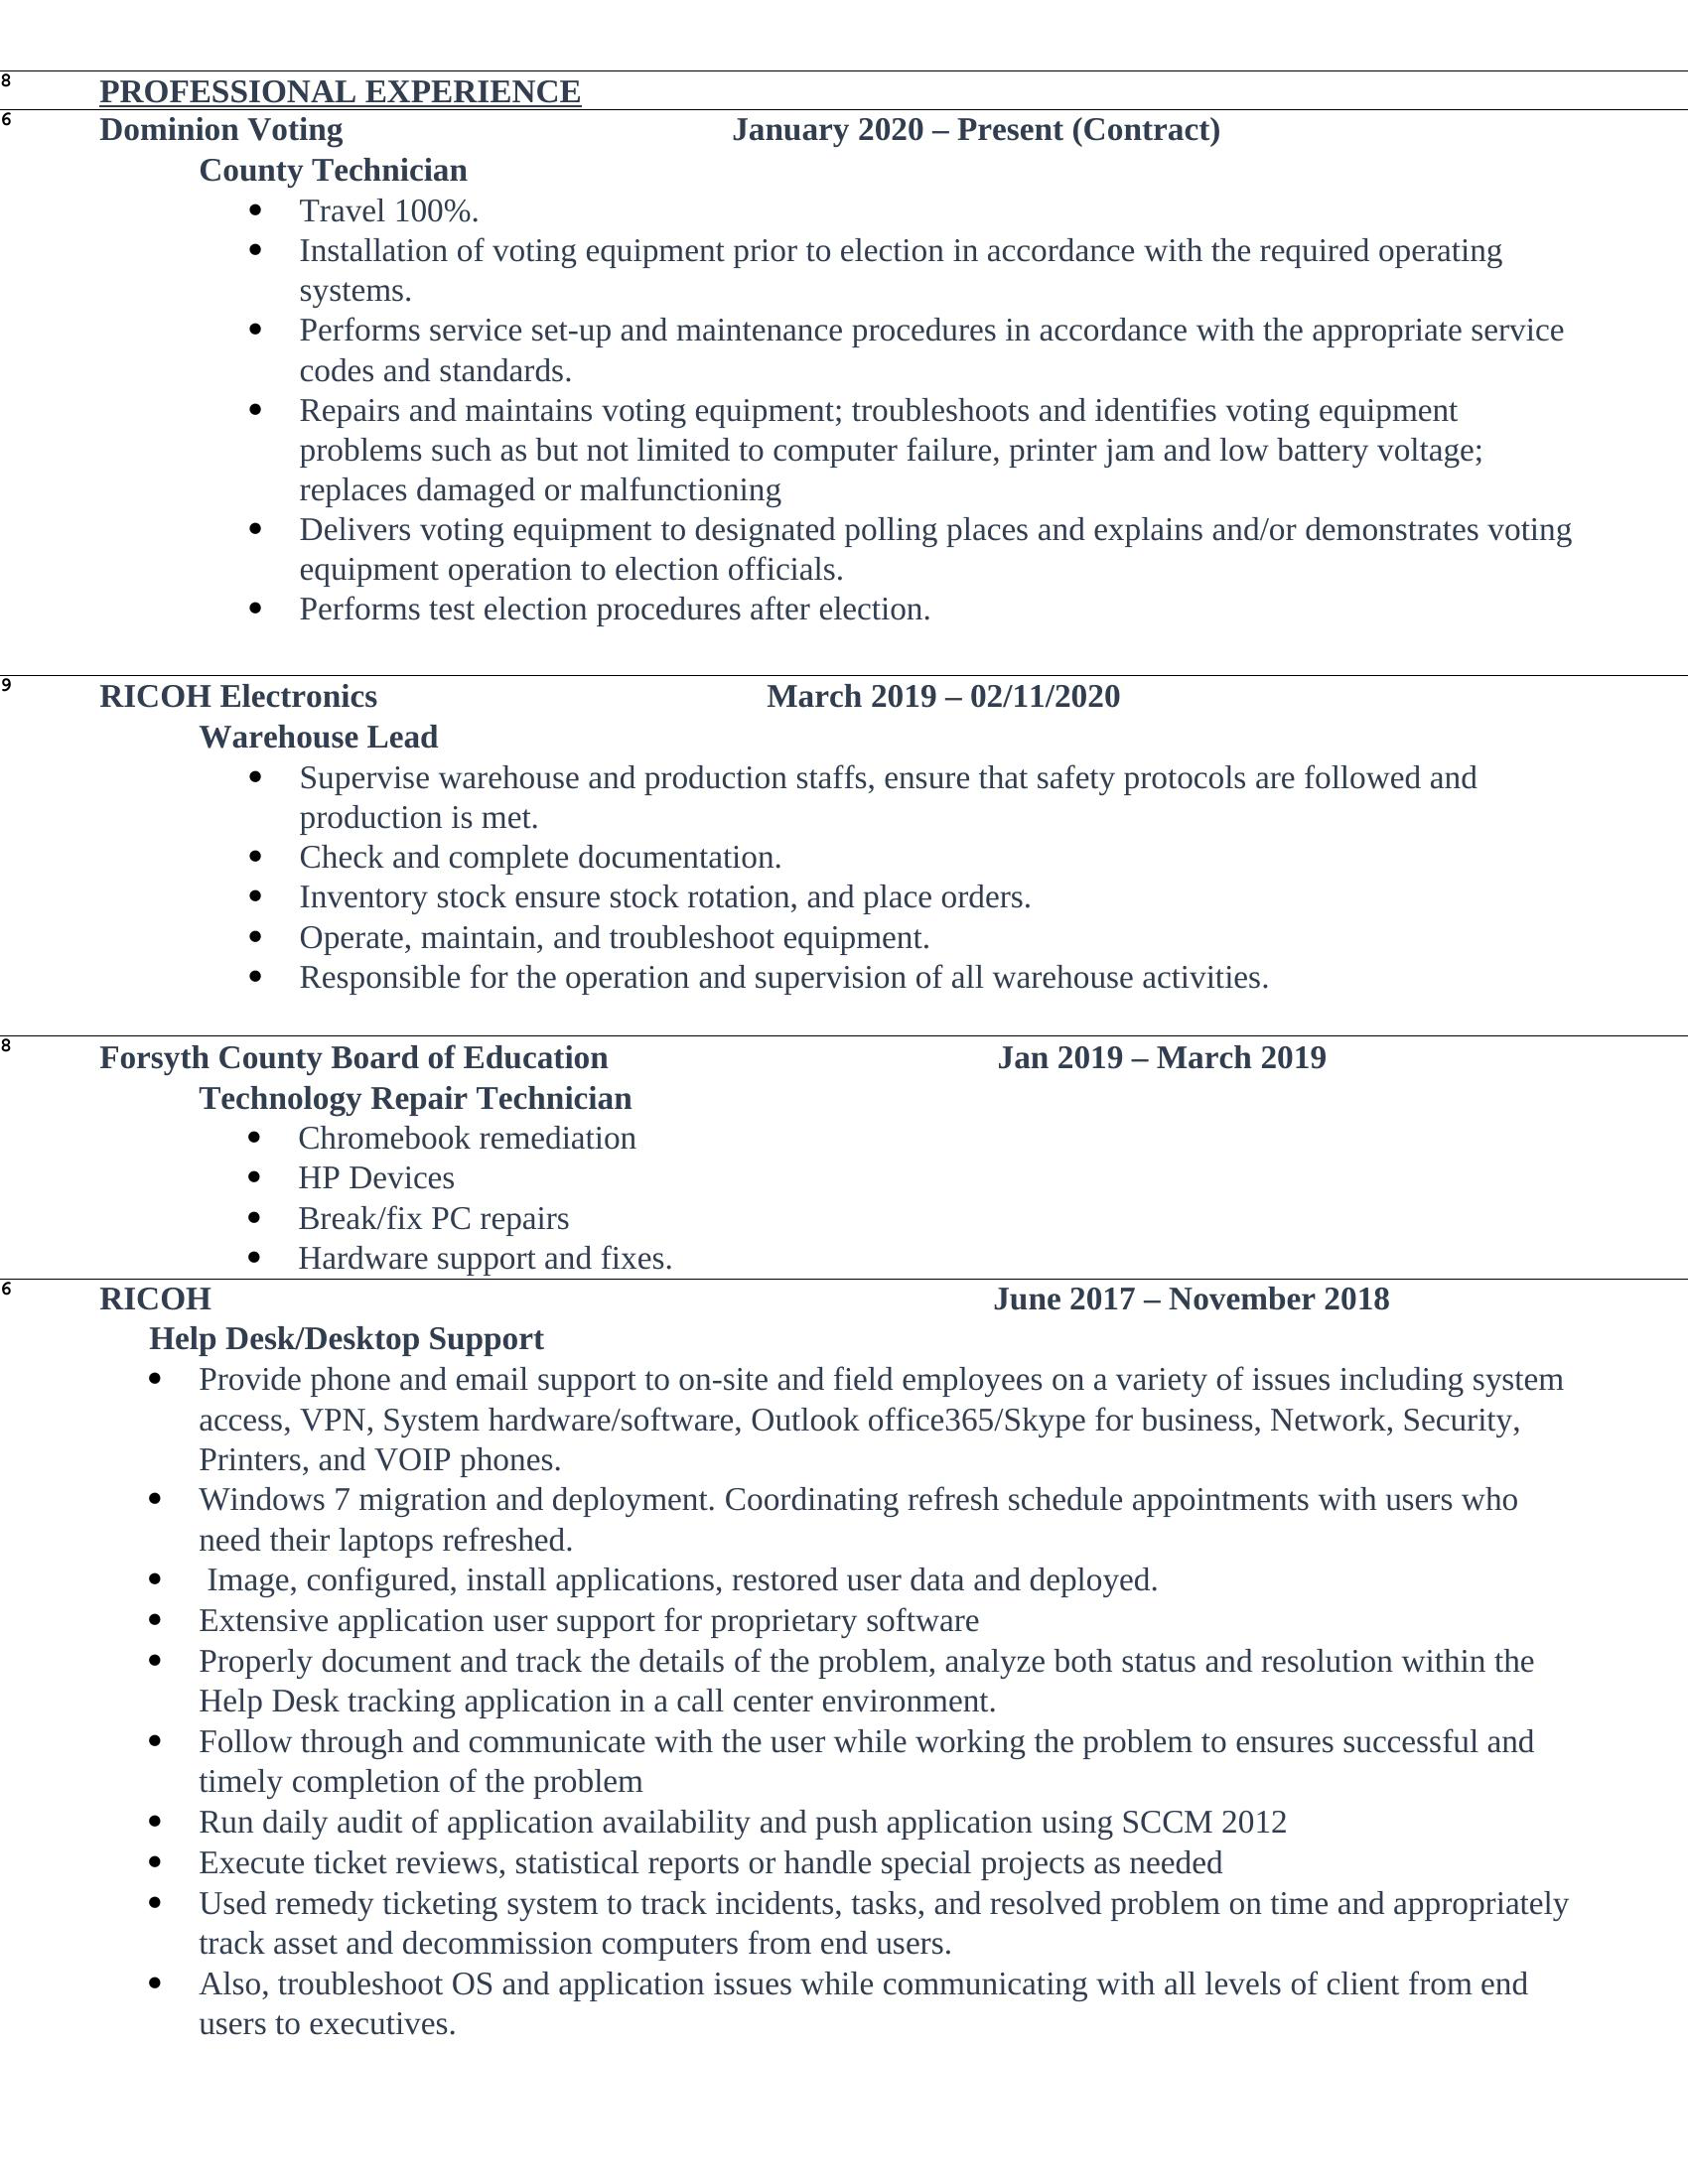

In [70]:
img

In [60]:
finalYpoints

[[76, 8], [115, 6], [685, 9], [1048, 8], [1293, 6]]

In [72]:
finalYpointsBottom

[[106, 6], [150, 9], [1079, 6], [1326, 5]]

In [61]:
width, height = img.size 

In [73]:
for num in range(0, len(finalYpoints)-1):
    imgt = img.crop((0, finalYpoints[num][0], width, finalYpoints[num+1][0]))
    #display(imgt)
    print("-------------------------")

-------------------------
-------------------------
-------------------------
-------------------------


In [64]:
horizontalLines = [[106, 1214, 1700, 486], [107, 1214, 1700, 486]]
#YPos - Starting - Ending - Distance

In [82]:
for i in horizontalLines:
    for j in test4:
        if j[0][2][1] == i[0]:
            print(j)

[((102, 76), (353, 76), (353, 106), (102, 106)), 76.92, 'PROFESSIONAL', 'Word']
[((370, 76), (585, 76), (585, 106), (370, 106)), 122.2, 'EXPERIENCE', 'Word']
[((102, 76), (353, 76), (353, 106), (102, 106)), 116.74, 'PROFESSIONAL', 'Capital']
[((370, 76), (585, 76), (585, 106), (370, 106)), 100.0, 'EXPERIENCE', 'Capital']
[((102, 76), (353, 76), (353, 106), (102, 106)), 44.79, 'PROFESSIONAL', 'SymbolAvg']
[((370, 76), (585, 76), (585, 106), (370, 106)), 78.75, 'EXPERIENCE', 'SymbolAvg']


In [78]:
ypBottom

1940